# New tasks:
- make a function that read a fasta file from disk and yields (header, seq) pairs +
- ex from:
>AB003409.1/96-167
GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUC comment
CCAGUGGGUCCA
>AB009835.1/1-71
CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUU
CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUU
CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUU
CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUU
- yield:
(AB003409.1/96-167, GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUCCCAGUGGGUCCA)
(AB009835.1/1-71,CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUUCAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUUCAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUUCAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUU)

- make a function that receives in input the list of sequences, and yields structure graphs +
- make a function that receives a iterator over graphs and i,j and plots only graphs from num i to num j


1. test if space or tab
2. test if command (after a space or any latter exept 'aucg' or 'rnytkmswbdhvgu')
3. test if new line without header then concatenate
4. test if new line with header then new graph

In [8]:
%matplotlib inline
import os, sys
import subprocess as sp
import networkx as nx
import re
from eden.util import display

class FastaToGraph(object):
    def __init__(self):
        pass
    
    def SequeceWrapper(self, path):
        #path = "/home/alsheikm/Work/EDeN_examples/fastaFiles/"
        seq = self._readFastaFile(path)
        seqs = self._removeCommands(seq)
        print ("path", path)
        return seqs
    
# read a fasta file separate the head and the sequence
#    def _readFastaFile(self, file_name):
    def _readFastaFile(self, path):
#        print 'fastafile'
#        path = "/home/alsheikm/Work/EDeN_examples/fastaFiles/"
        head_start = '>'
        head = []
        seq = []

        for file in os.listdir(path):
#            print ("file:", file)
            fi = open(os.path.join( path, file),'r')

            #seperate the head and the sequence
            for line in fi:
                lines = list(line)
                if lines[0] == head_start:
                    line = line.strip().split('\n')
                    head.append(line)
                    #print ('head', head)
                if lines[0] != head_start:

                    line = line.strip().split('\n')
                    seq.append(line)
                    #join the list of seq in one list with delimiter '\n'
                    #print ("seq", seq)
        return seq
    
    #read a line ignore string after the whitspace, tab and not (a,c,g,u)
    def _removeCommands(self, seq):
        #s = 'acugg eu ac af \t r \n ne'
        #print s
        new_seq = []
        not_added = []
        print ("input seq1:", seq)
        seq = str(seq)
        print ("string seq2:", seq)
        for letter in seq:
            print ("letter:", letter)
            print ("seq_remove:",seq)
            print '#######'
            if letter == "A" or letter == "C" or letter == "G" or letter == "U":
        #    if letter == {'a','c','g','u'}:
                print ('letter:', letter)
                letters = list(letter)
                new_seq = new_seq + letters
                    #new_s = new_s + letter
                print ('new_seq:', new_seq)
                print '******'
            else:
                if letter == " " or letter != "A" or letter != "C" or letter != "G" or letter != "U":
                    letters = list(letter)
                    not_added = not_added + letters
                    print ('not_added:', not_added)
                    print '-----'
            
            print ("seq_remove:",seq)        
            print ('final not_added:', not_added)
            print ('final new_seq:', new_seq)
            seq = new_seq
            print ('returned seq=', seq)
        return seq

#generate the graph for each read sequence
    def _makeFastaGraph(self, seq):
        G = nx.Graph()
        for j,sequence in enumerate(seq):
    #        print ('j', j)
            print ("sequence", sequence)
            sequences = list(sequence)
            for i,letter in enumerate(sequences):
                G.add_node(i, label = sequences[i])
                if i > 0:
                    G.add_edge(i-1, i, label = 'x')
            return G

# Experiment

In [9]:
#Read fasta files and separate sequences from the head of the sequence
fgraph = FastaToGraph()
path = "/home/alsheikm/Work/EDeN_examples/fasta/"
seqs = fgraph.SequeceWrapper(path)

('input seq1:', [['GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUC comments'], ['CCAGUGGGUCCA'], ['CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUUAGCACUU a c g u'], ['ACUUCUAAUGA comments bla bla'], ['GCGCCCGUAGCUCAAUUGGAUAGAGCGUUUGACUACGGAUCAAAAGGUUAGGGGUUCGAC acgu'], ['UCCUCUCGGGCGCG']])
('string seq2:', "[['GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUC comments'], ['CCAGUGGGUCCA'], ['CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUUAGCACUU a c g u'], ['ACUUCUAAUGA comments bla bla'], ['GCGCCCGUAGCUCAAUUGGAUAGAGCGUUUGACUACGGAUCAAAAGGUUAGGGGUUCGAC acgu'], ['UCCUCUCGGGCGCG']]")
('letter:', '[')
('seq_remove:', "[['GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUC comments'], ['CCAGUGGGUCCA'], ['CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUUAGCACUU a c g u'], ['ACUUCUAAUGA comments bla bla'], ['GCGCCCGUAGCUCAAUUGGAUAGAGCGUUUGACUACGGAUCAAAAGGUUAGGGGUUCGAC acgu'], ['UCCUCUCGGGCGCG']]")
#######
('not_added:', ['['])
-----
('seq_remove

('sequence', 'G')


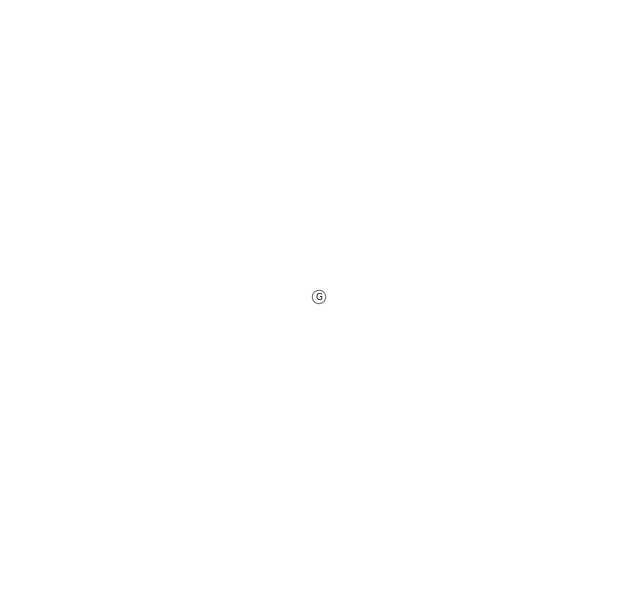

('sequence', 'G')


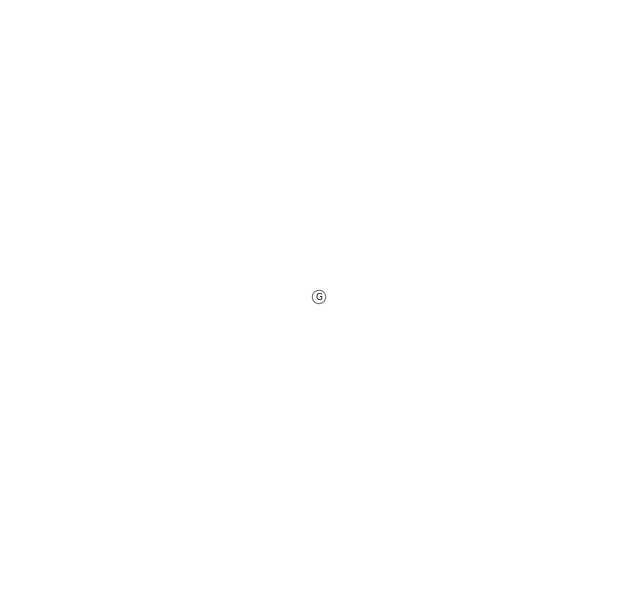

('sequence', 'G')


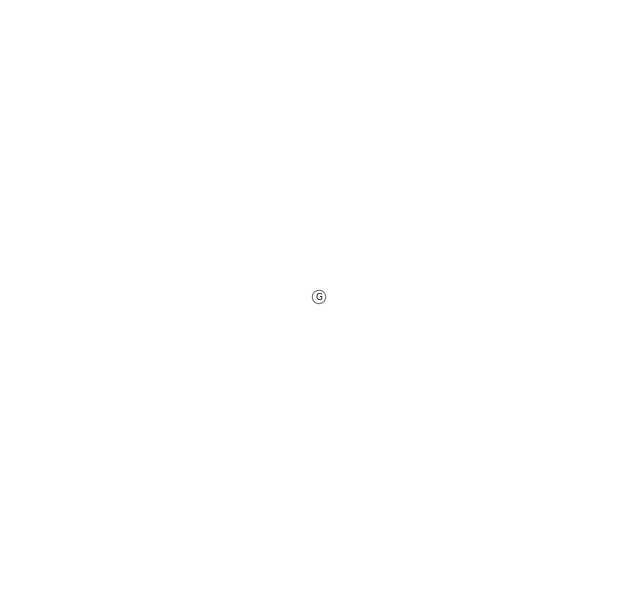

('sequence', 'C')


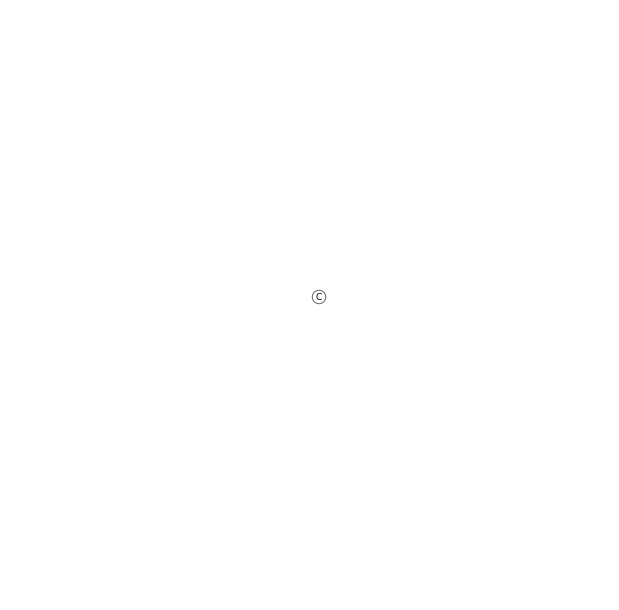

('sequence', 'C')


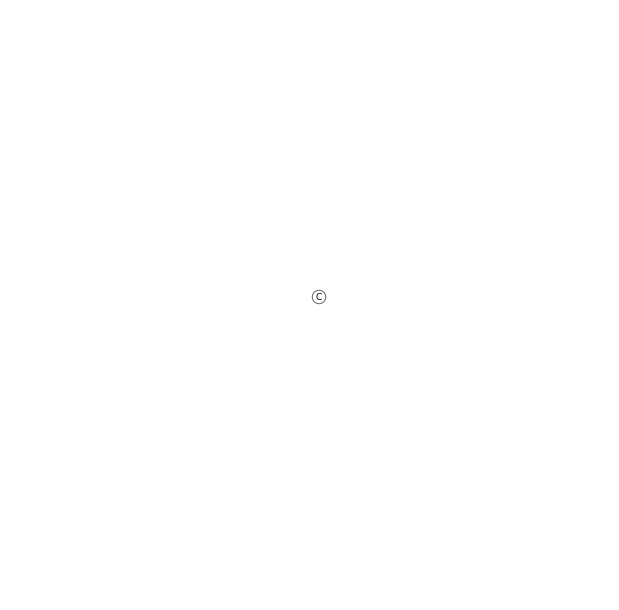

('sequence', 'C')


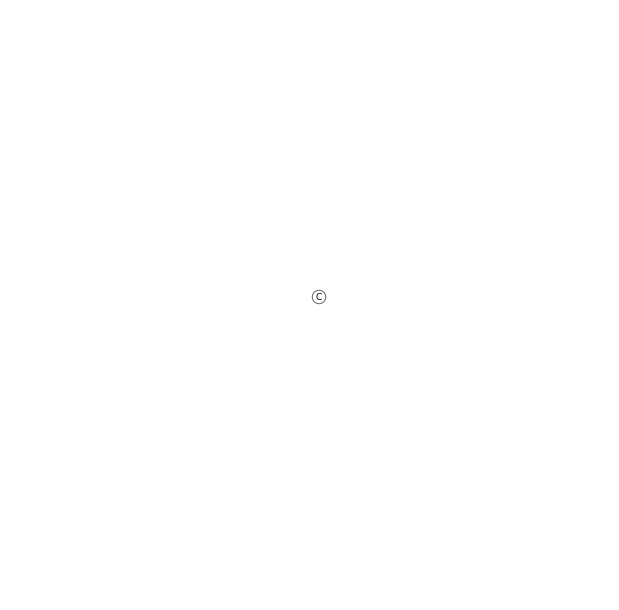

('sequence', 'A')


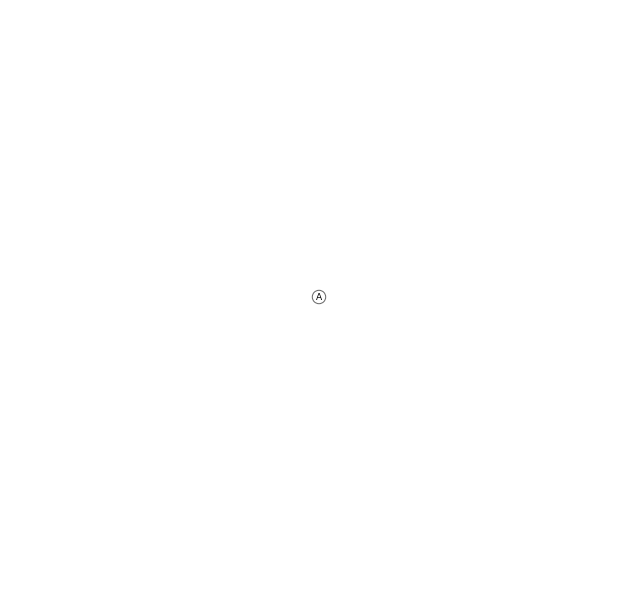

('sequence', 'U')


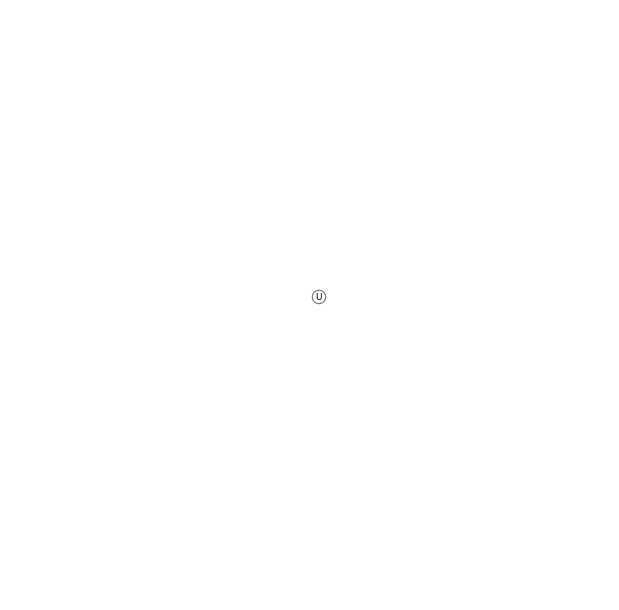

('sequence', 'A')


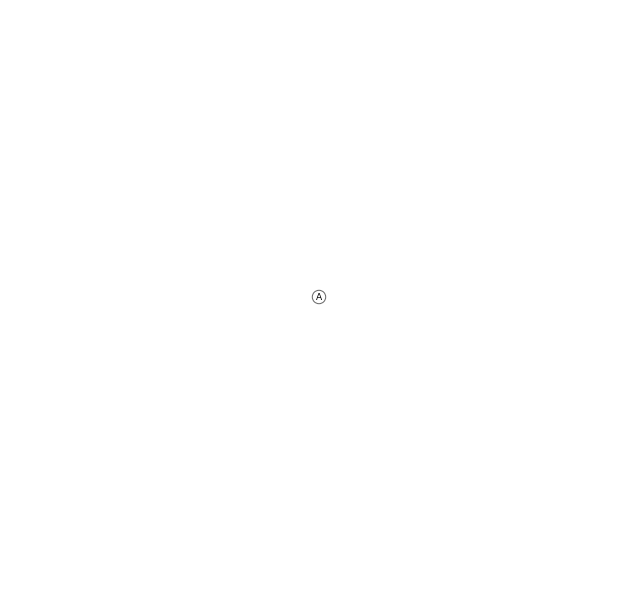

('sequence', 'G')


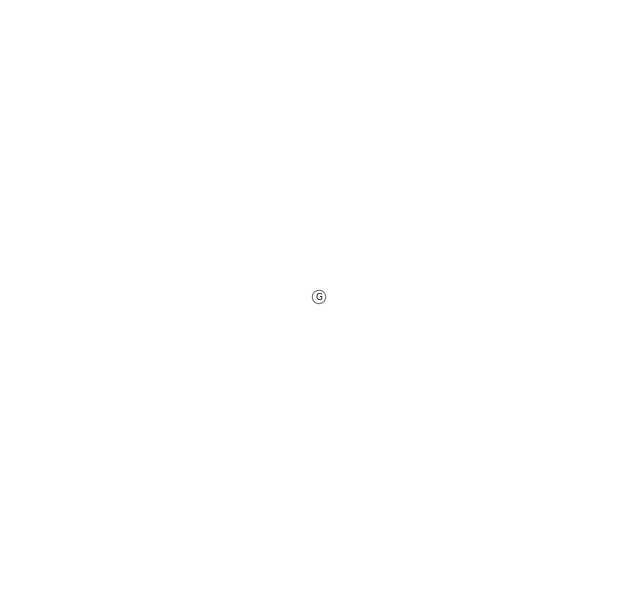

('sequence', 'C')


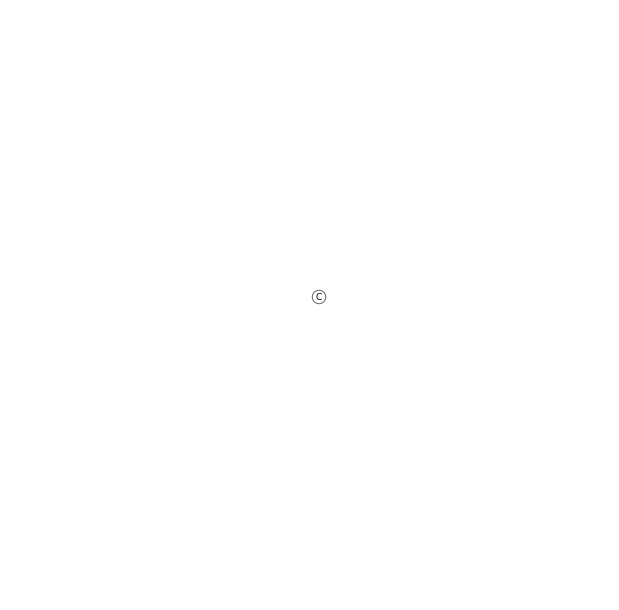

('sequence', 'U')


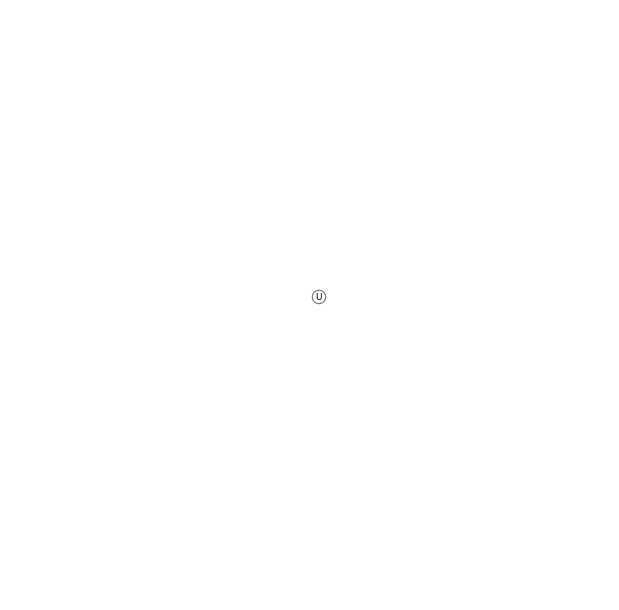

('sequence', 'C')


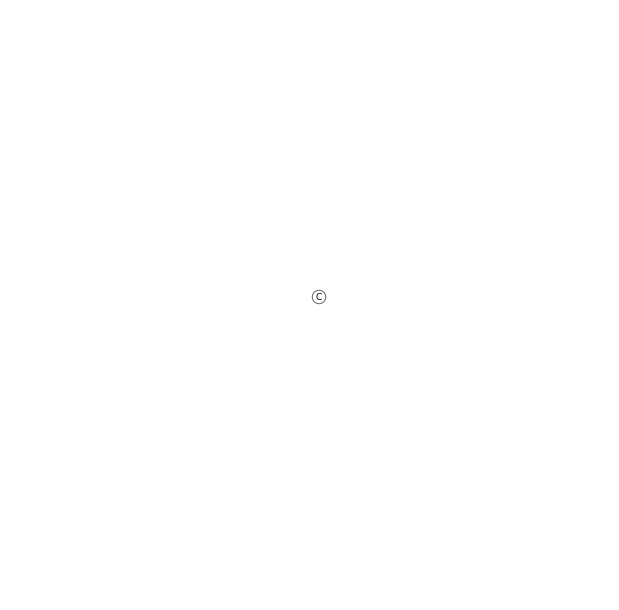

('sequence', 'A')


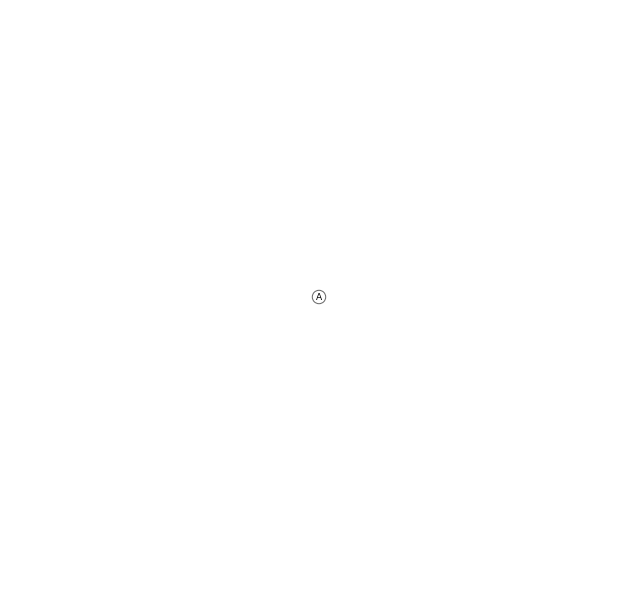

('sequence', 'G')


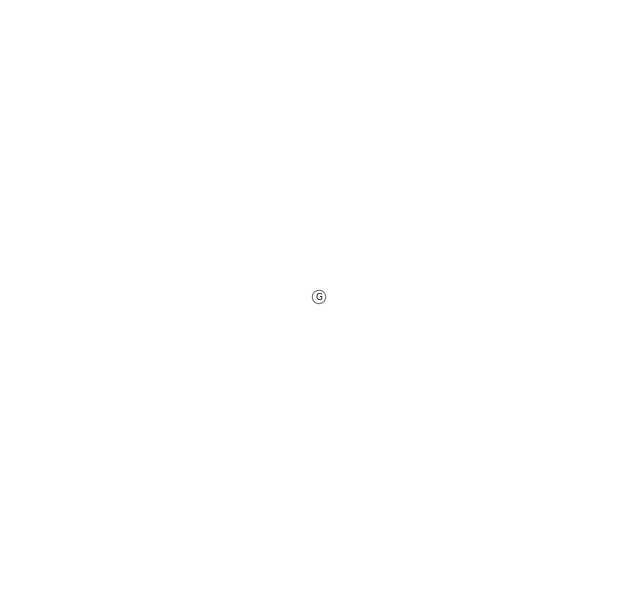

('sequence', 'U')


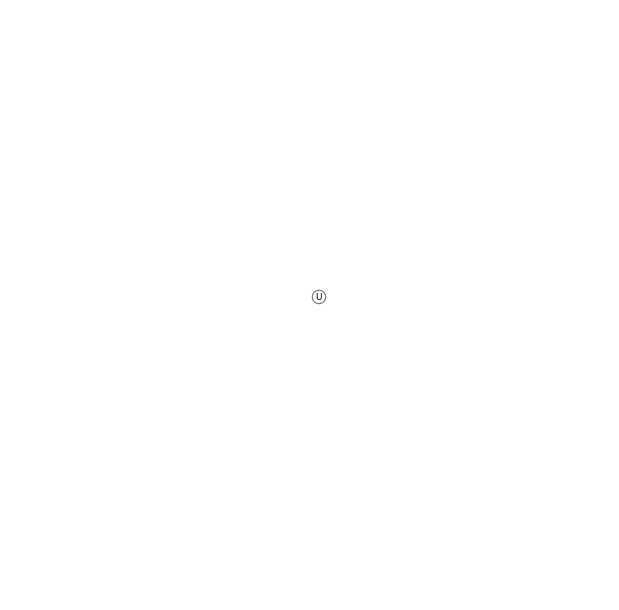

('sequence', 'G')


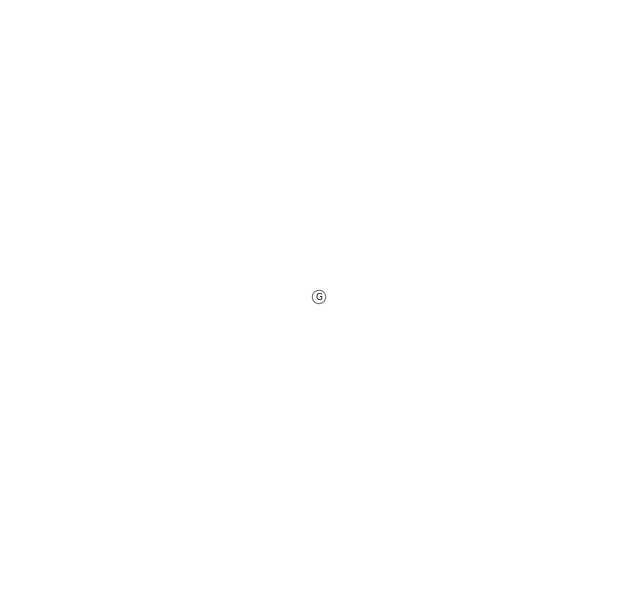

('sequence', 'G')


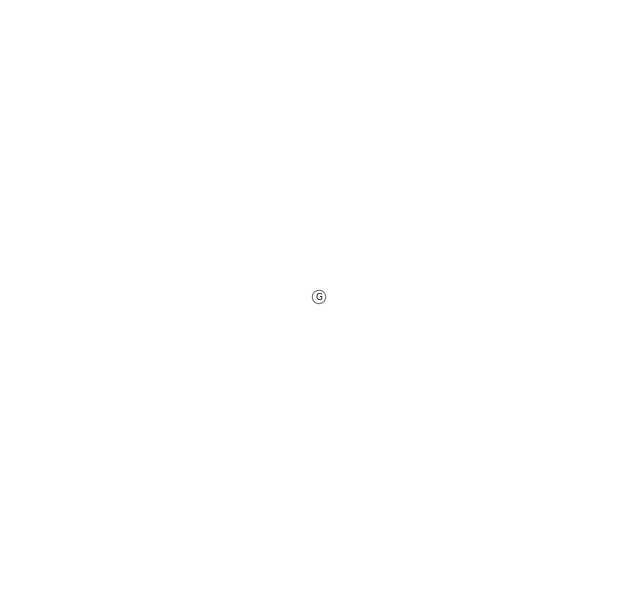

('sequence', 'U')


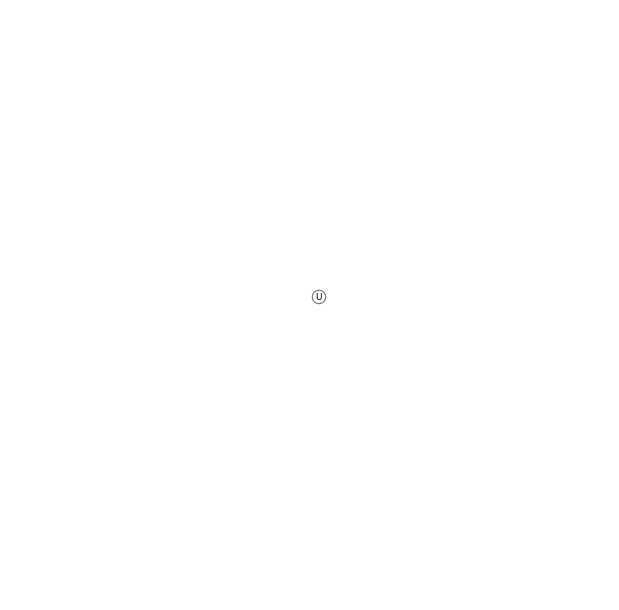

('sequence', 'A')


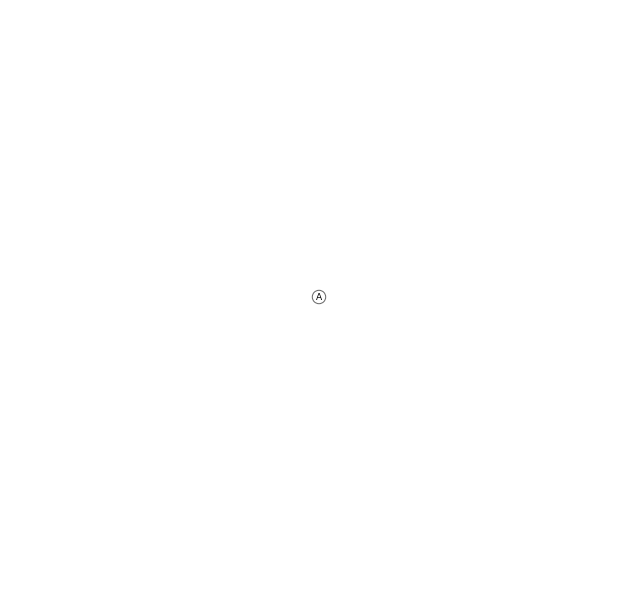

('sequence', 'G')


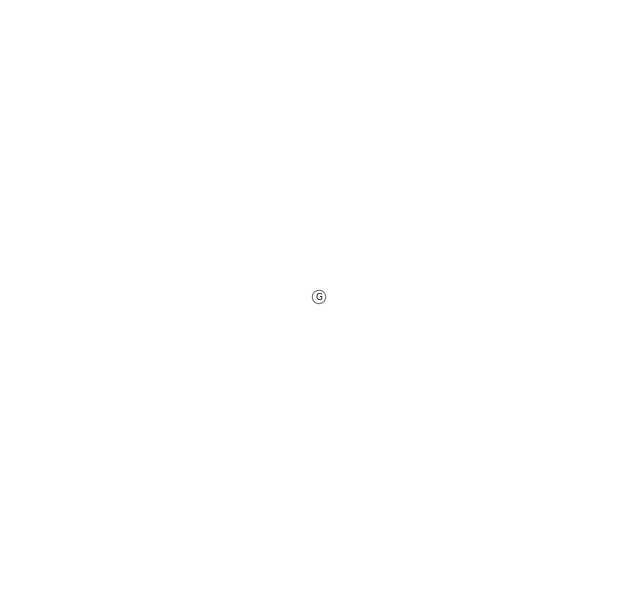

('sequence', 'A')


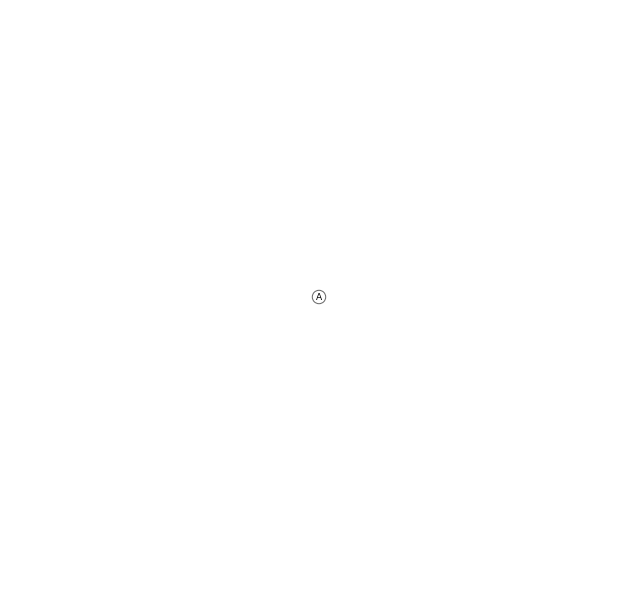

('sequence', 'G')


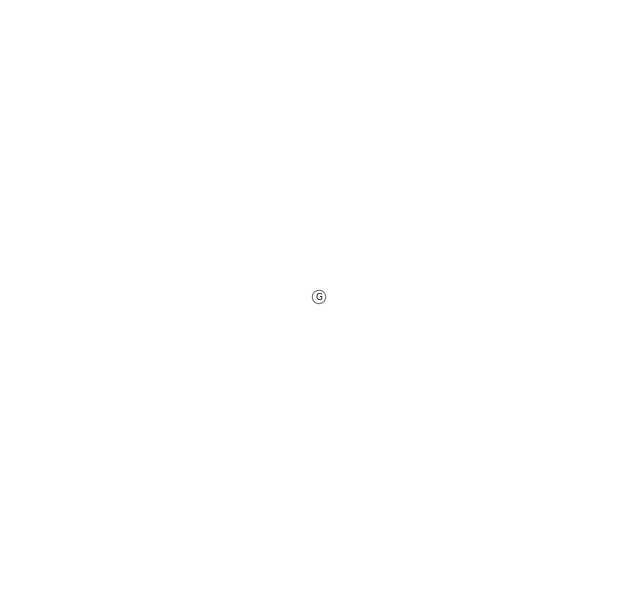

('sequence', 'U')


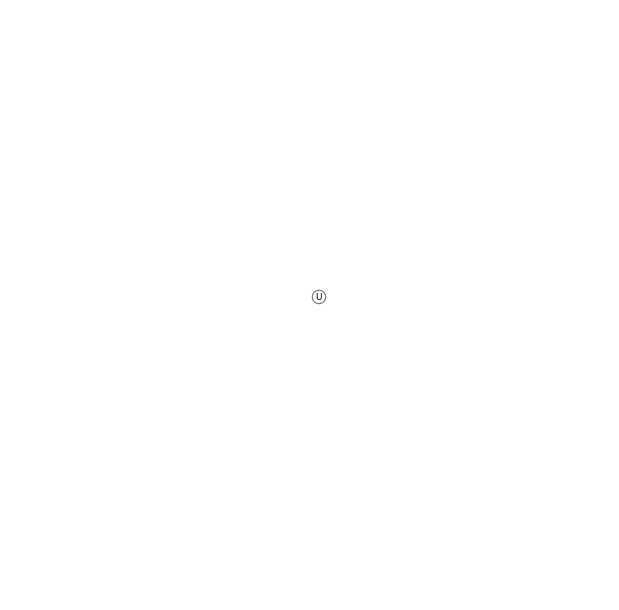

('sequence', 'G')


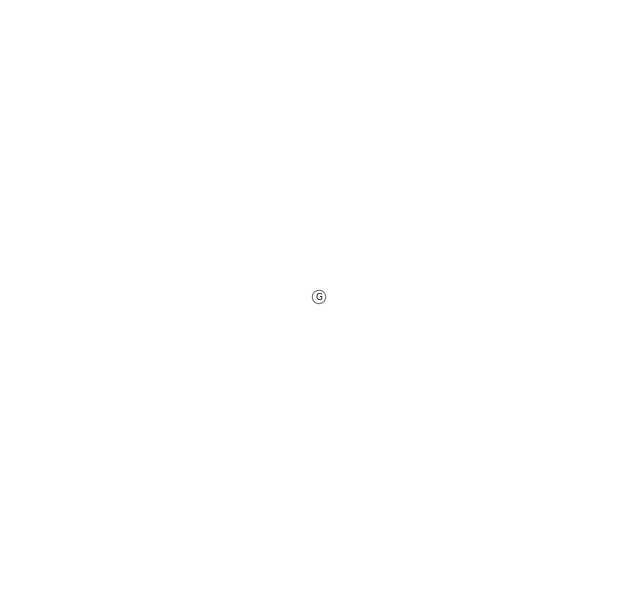

('sequence', 'C')


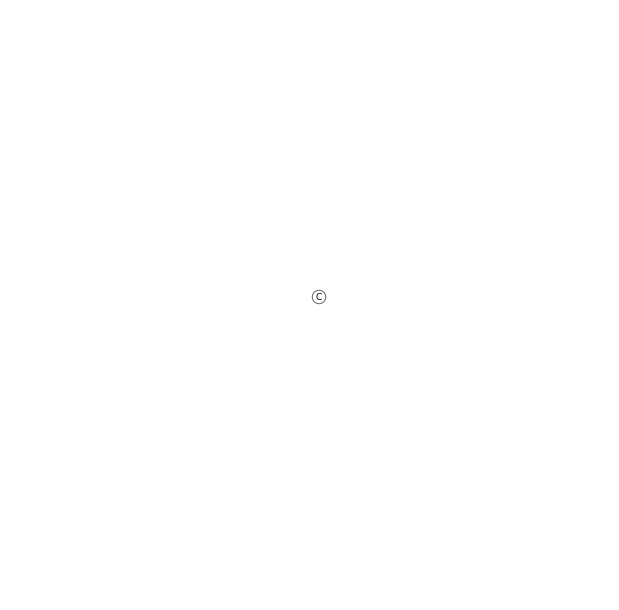

('sequence', 'C')


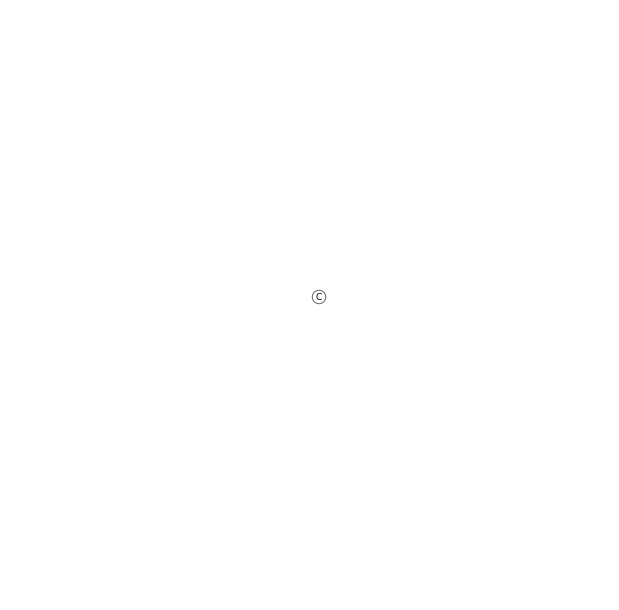

('sequence', 'U')


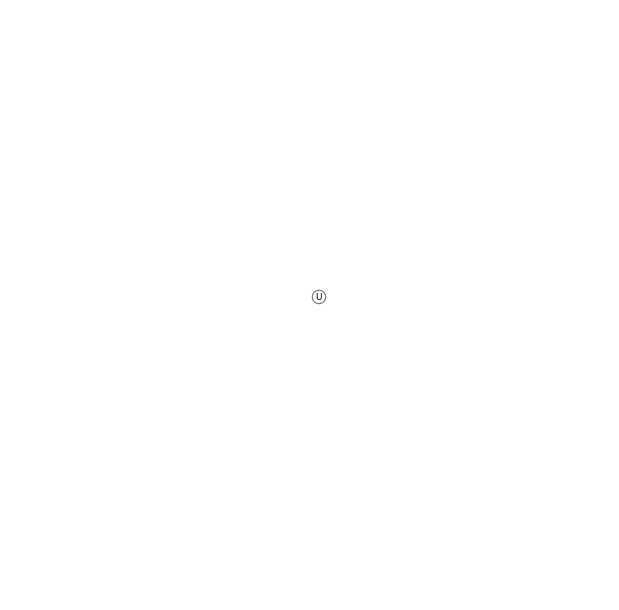

('sequence', 'C')


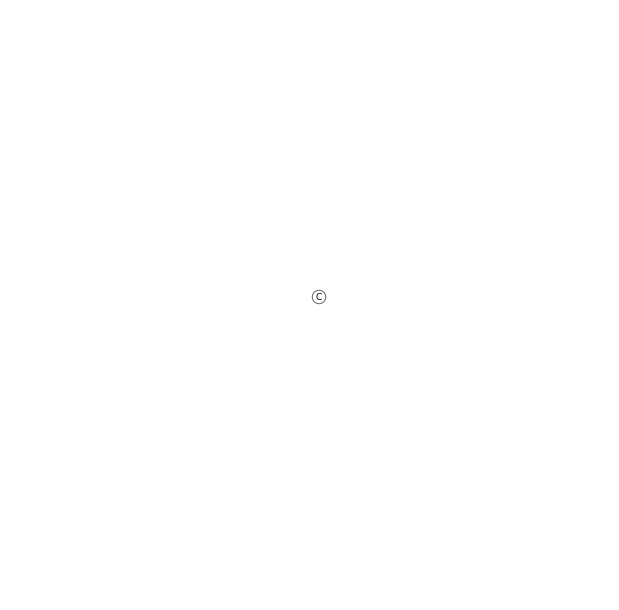

('sequence', 'C')


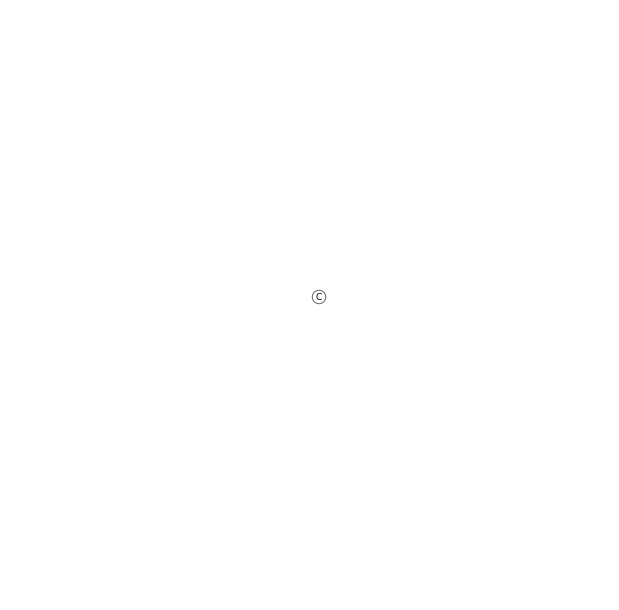

('sequence', 'U')


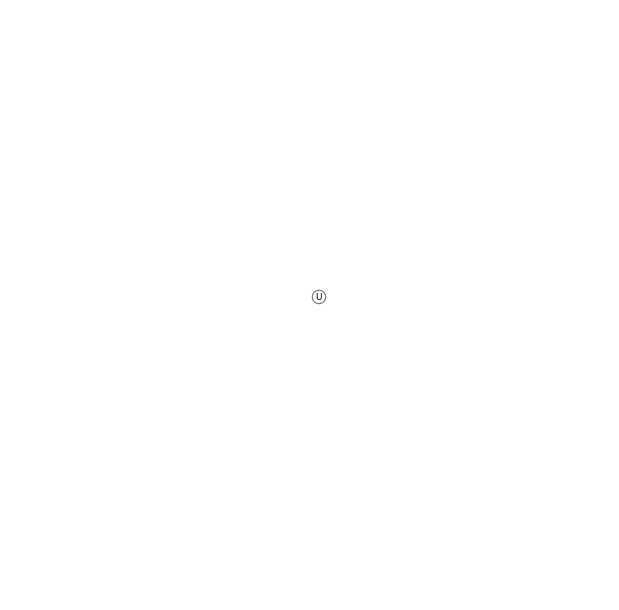

('sequence', 'U')


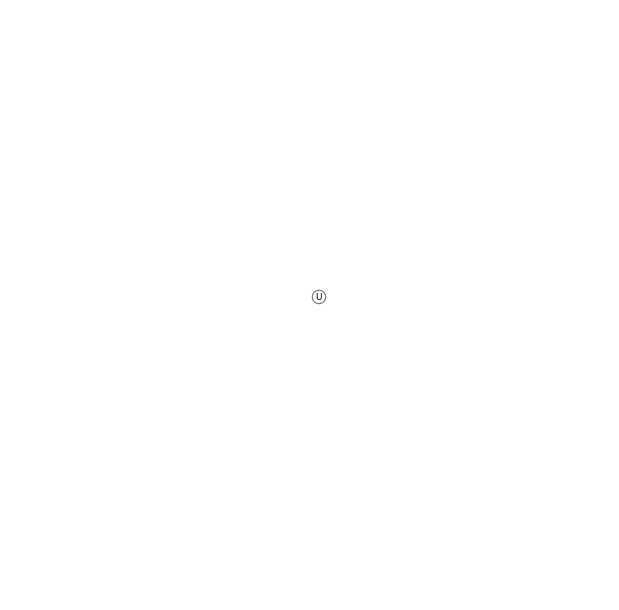

('sequence', 'U')


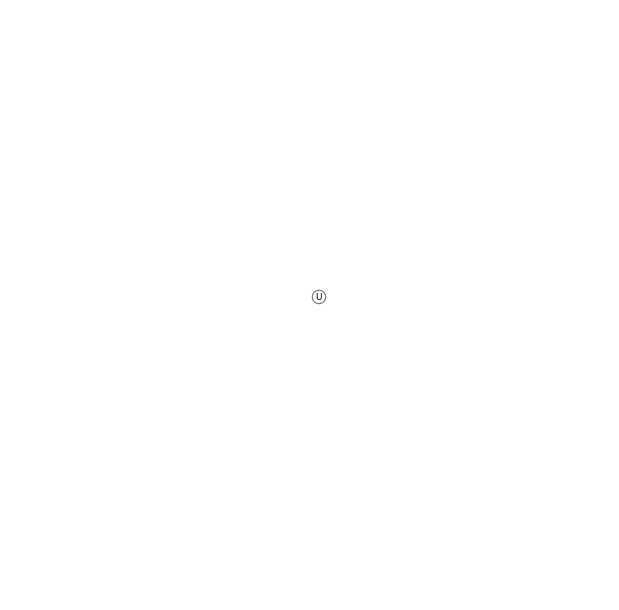

('sequence', 'G')


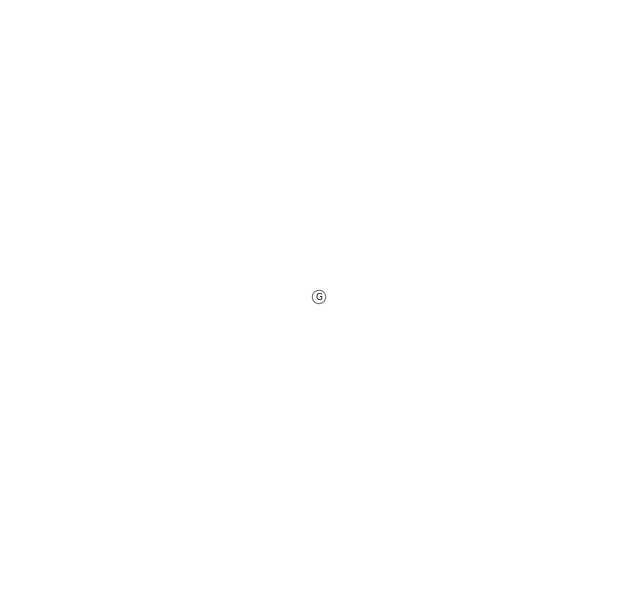

('sequence', 'C')


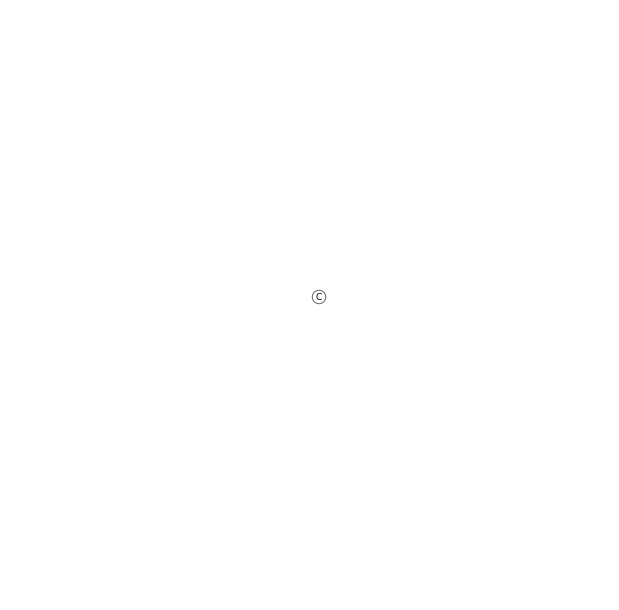

('sequence', 'A')


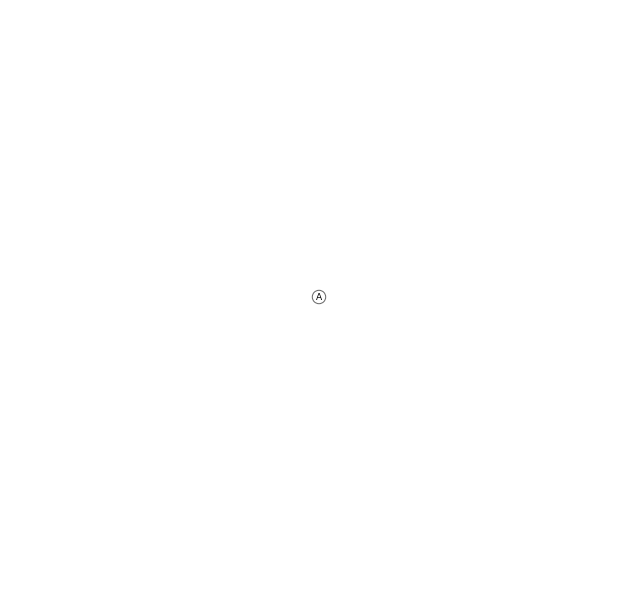

('sequence', 'A')


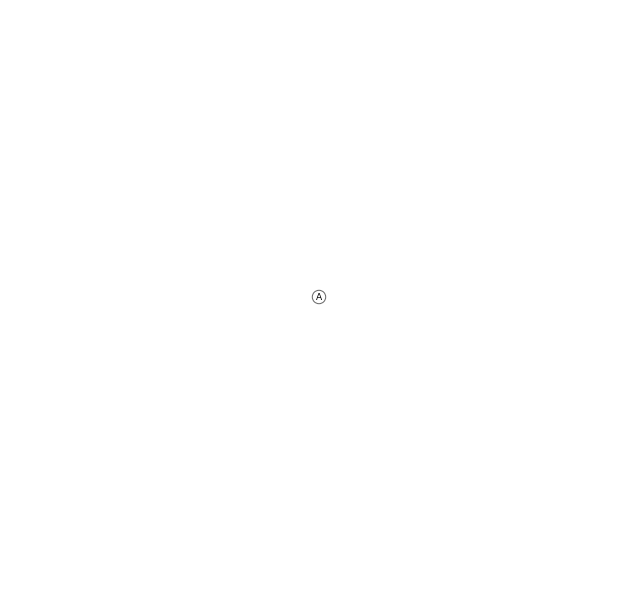

('sequence', 'G')


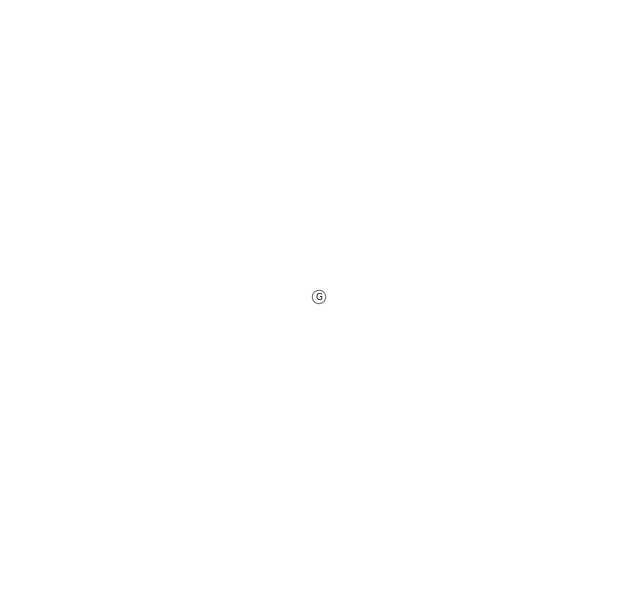

('sequence', 'G')


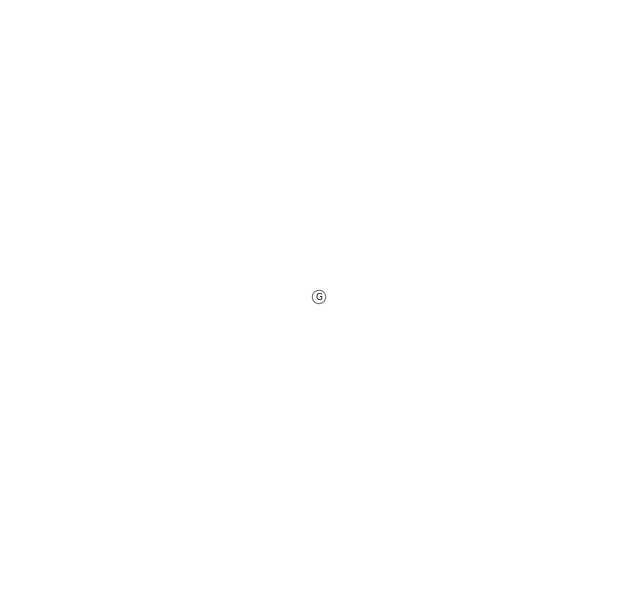

('sequence', 'A')


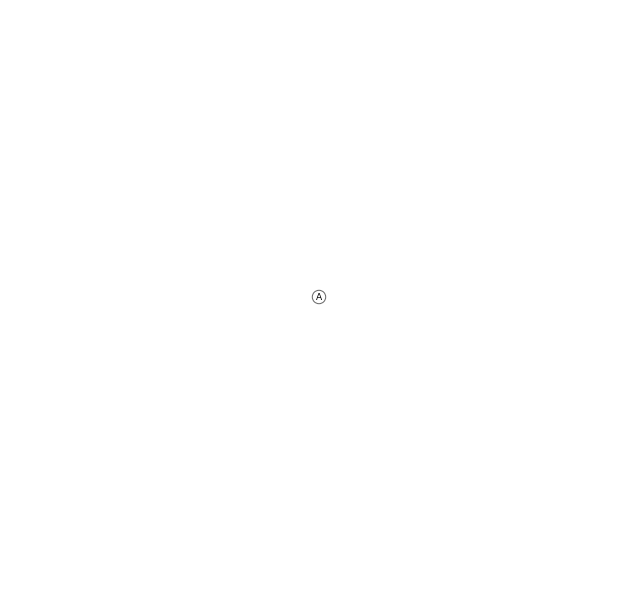

('sequence', 'G')


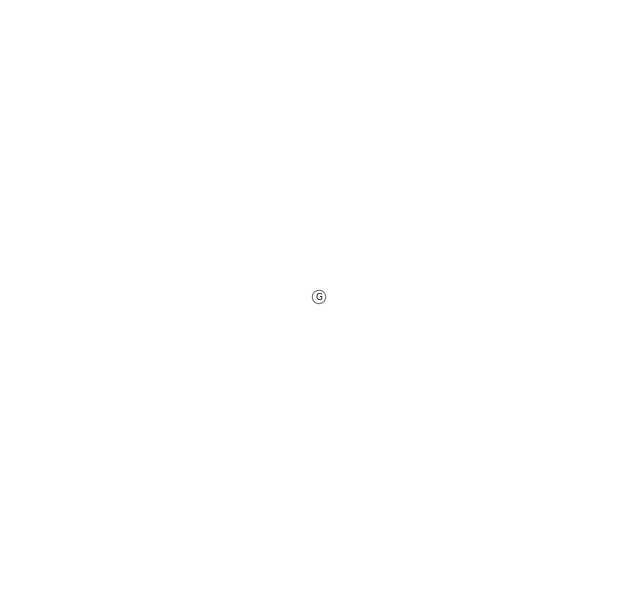

('sequence', 'G')


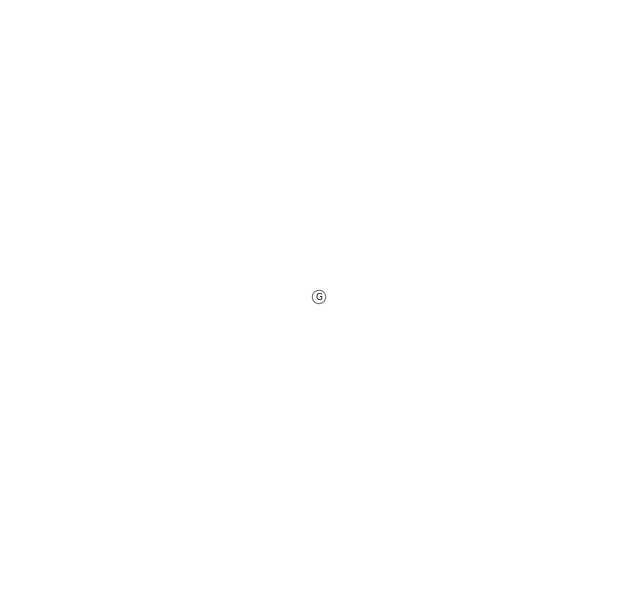

('sequence', 'A')


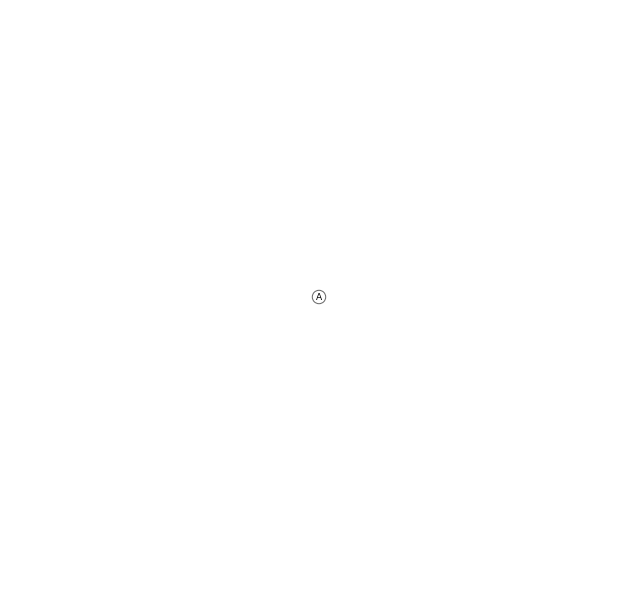

('sequence', 'U')


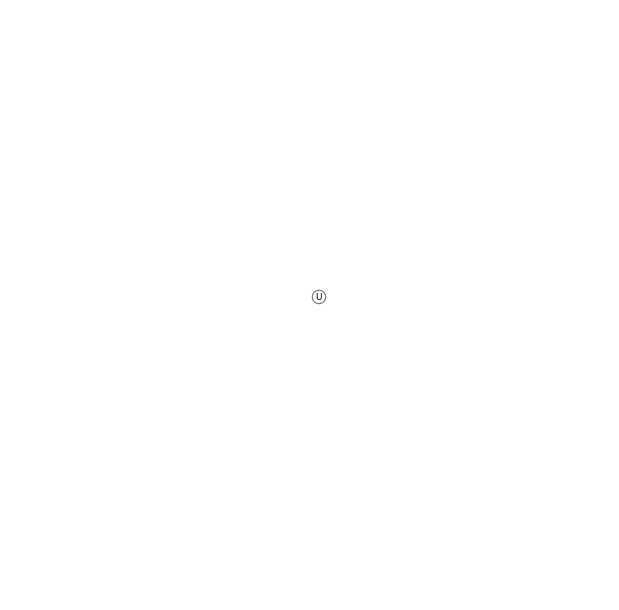

('sequence', 'G')


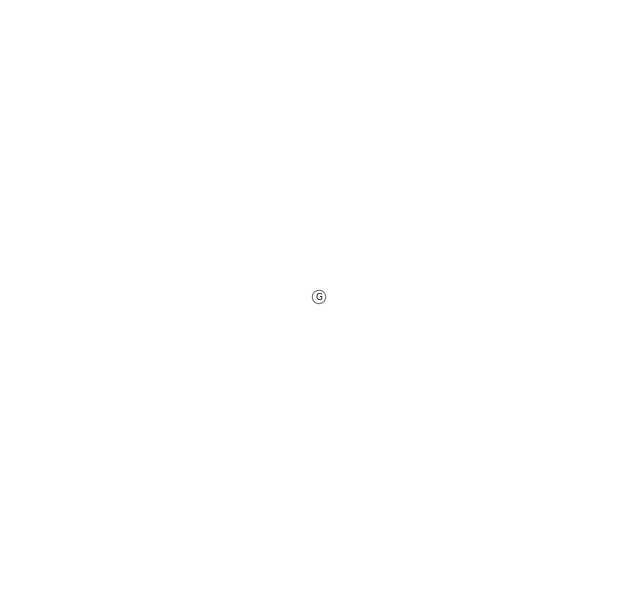

('sequence', 'C')


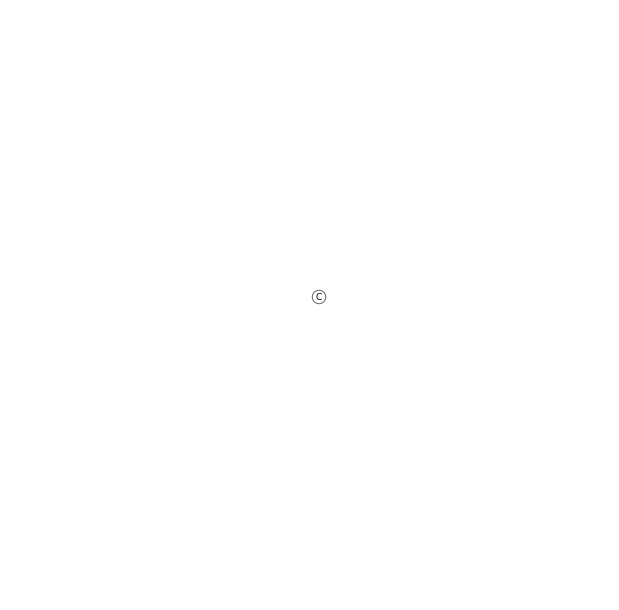

('sequence', 'C')


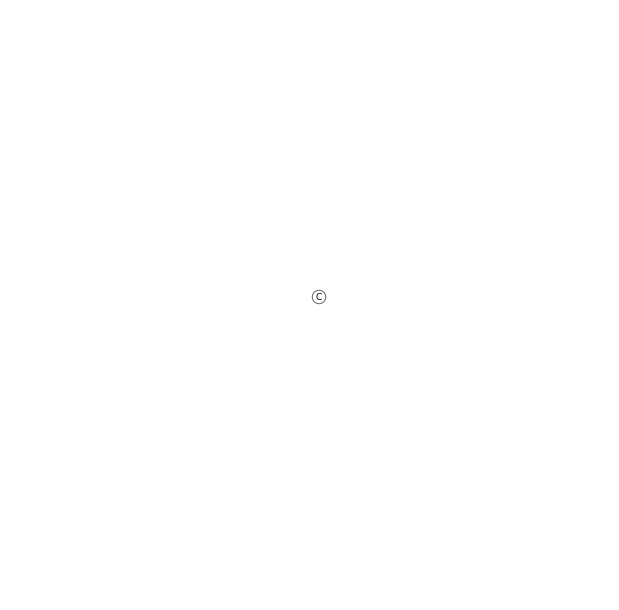

('sequence', 'C')


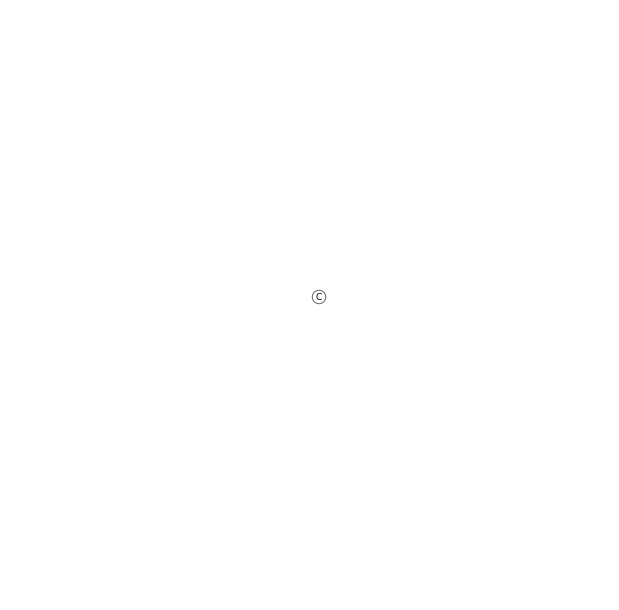

('sequence', 'U')


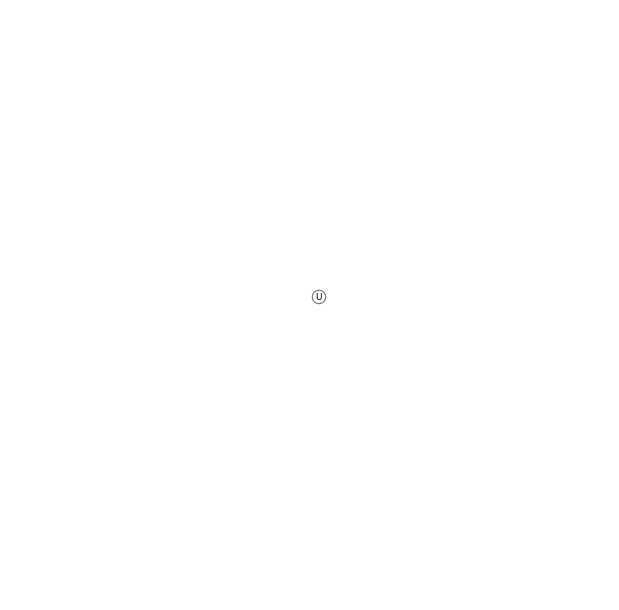

('sequence', 'G')


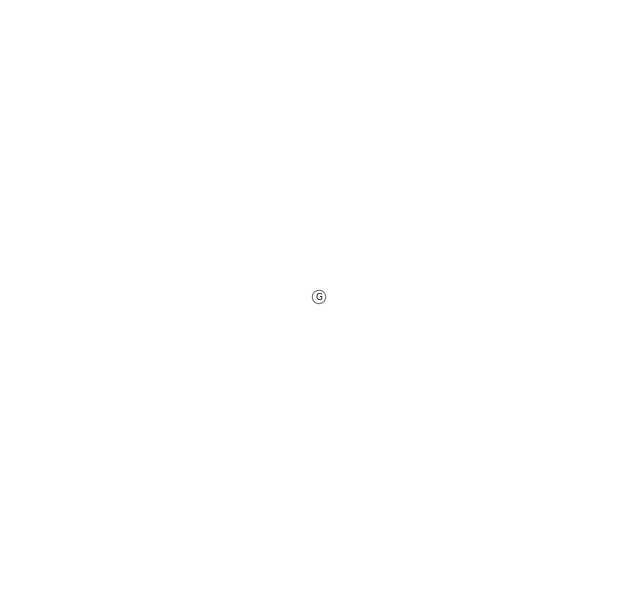

('sequence', 'G')


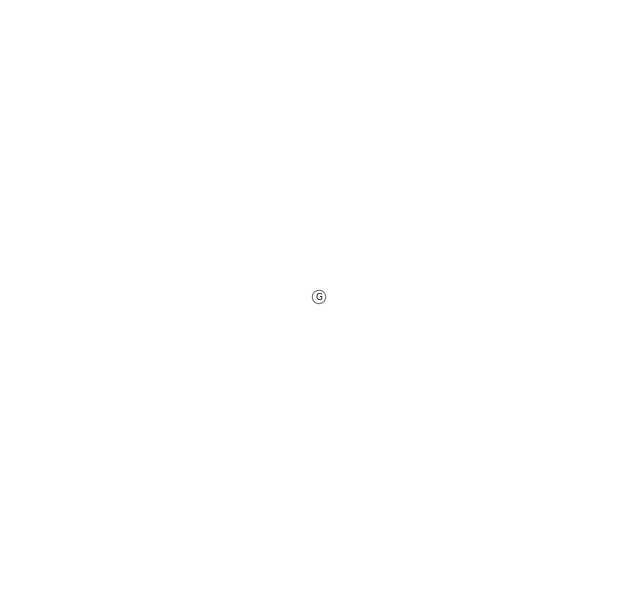

('sequence', 'G')


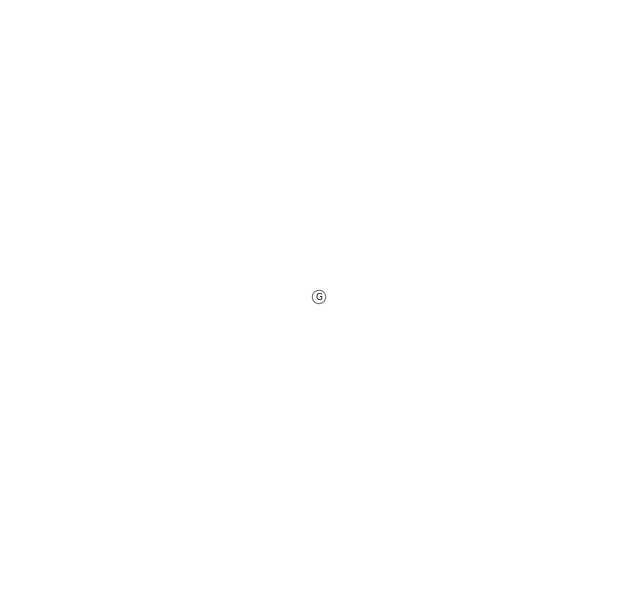

('sequence', 'U')


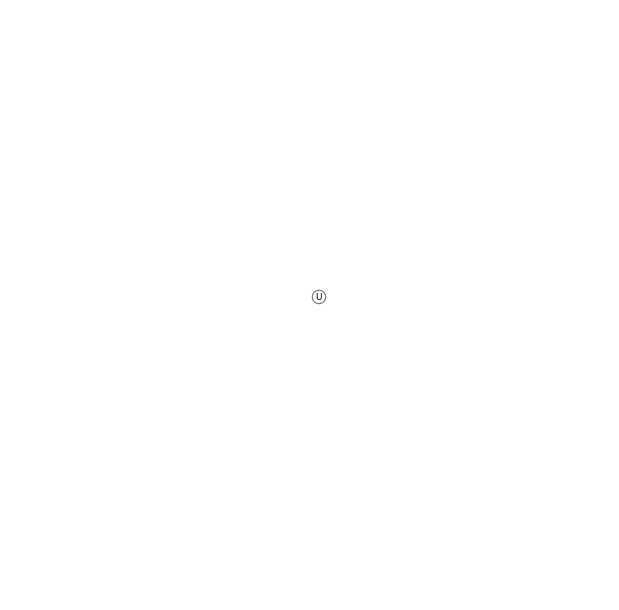

('sequence', 'U')


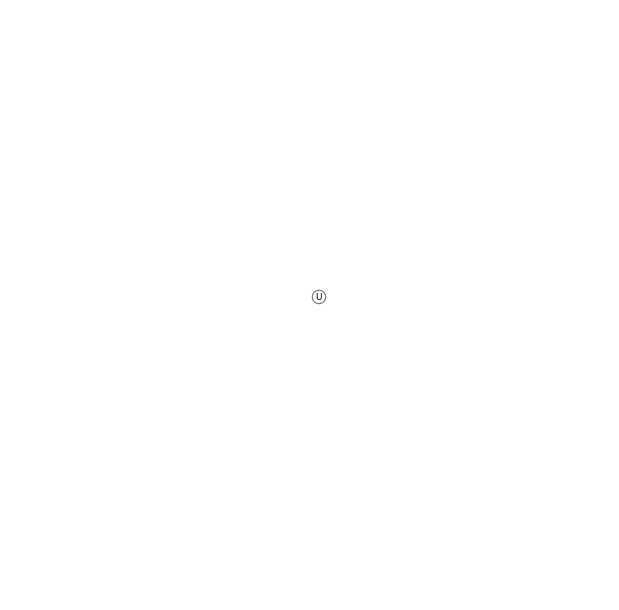

('sequence', 'C')


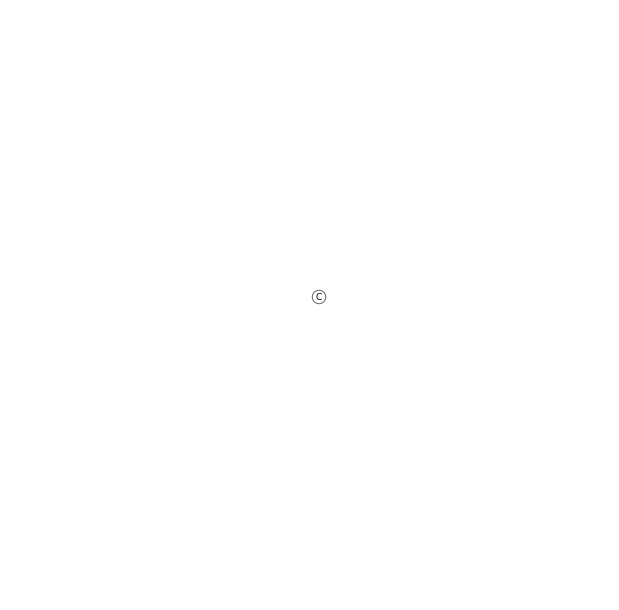

('sequence', 'G')


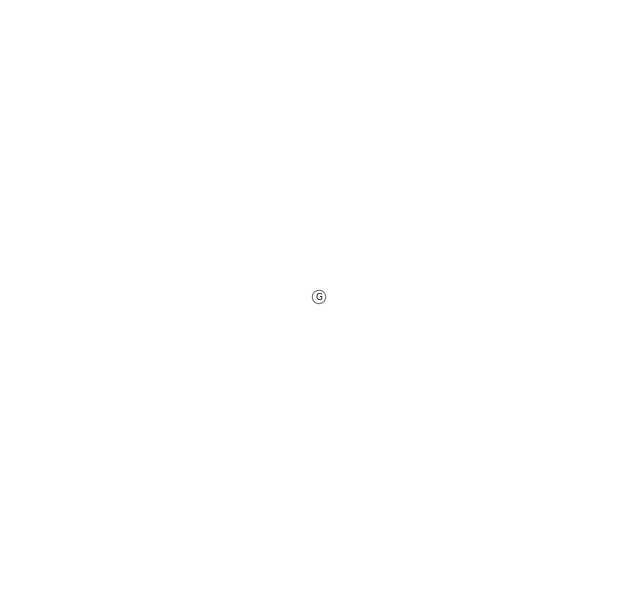

('sequence', 'A')


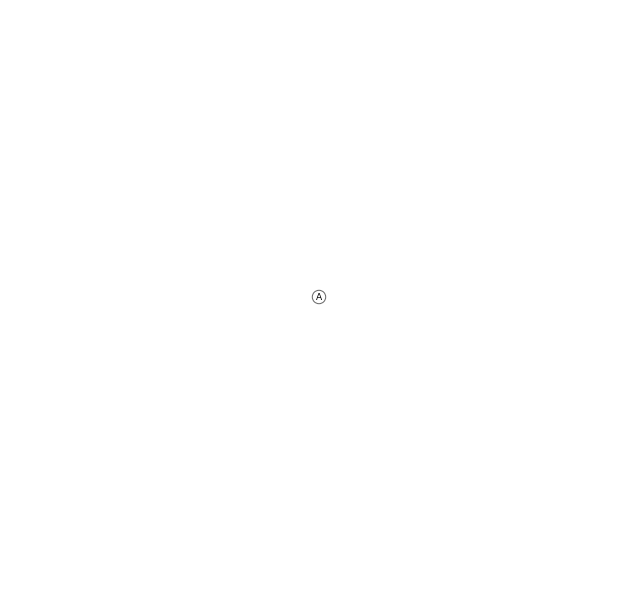

('sequence', 'A')


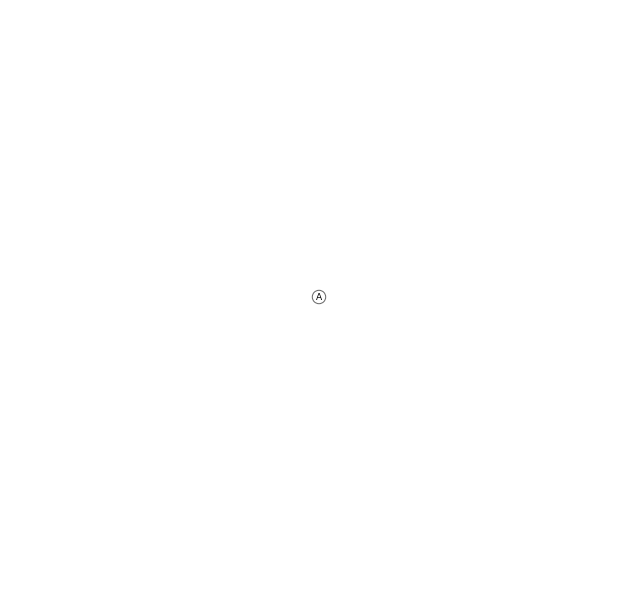

('sequence', 'U')


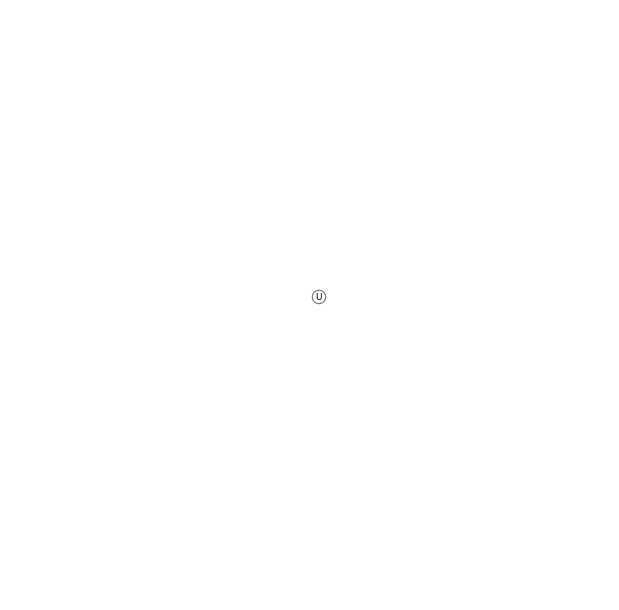

('sequence', 'C')


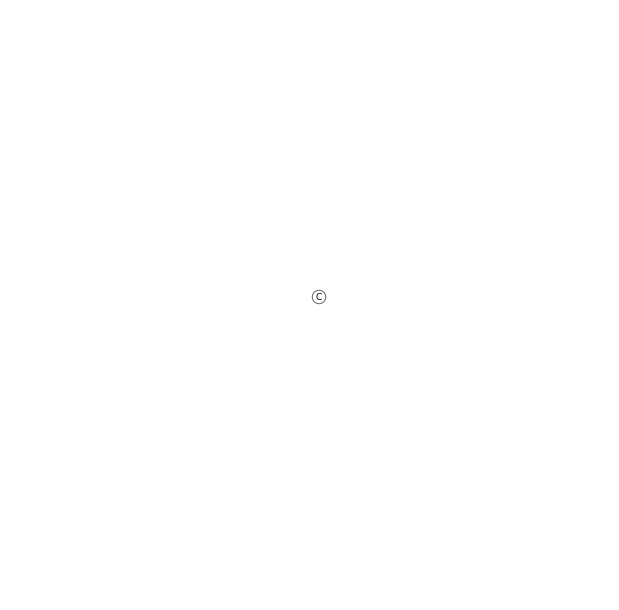

('sequence', 'C')


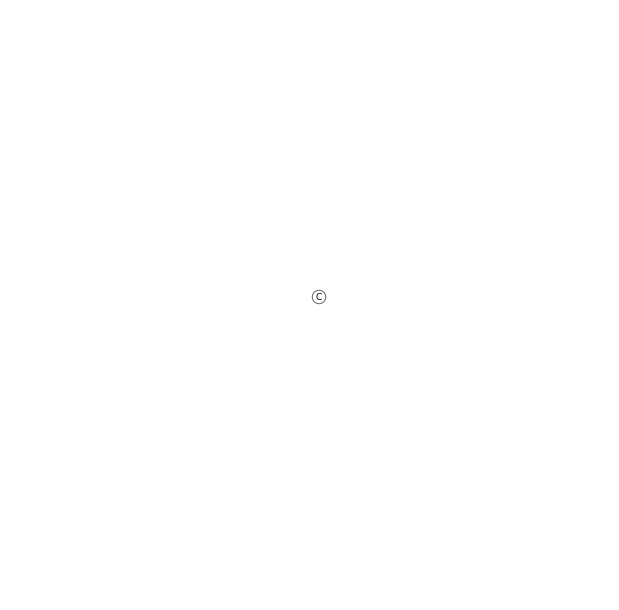

('sequence', 'C')


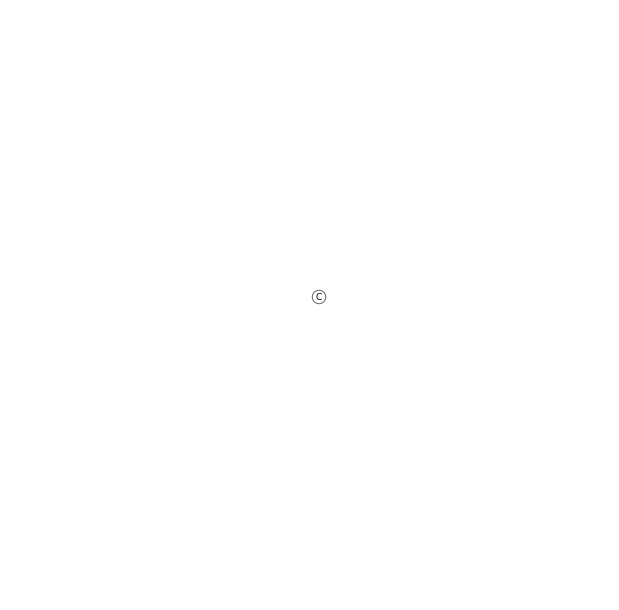

('sequence', 'A')


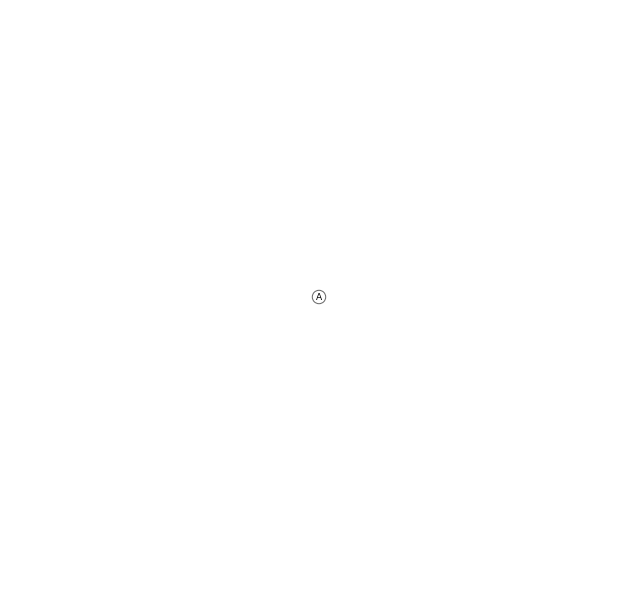

('sequence', 'G')


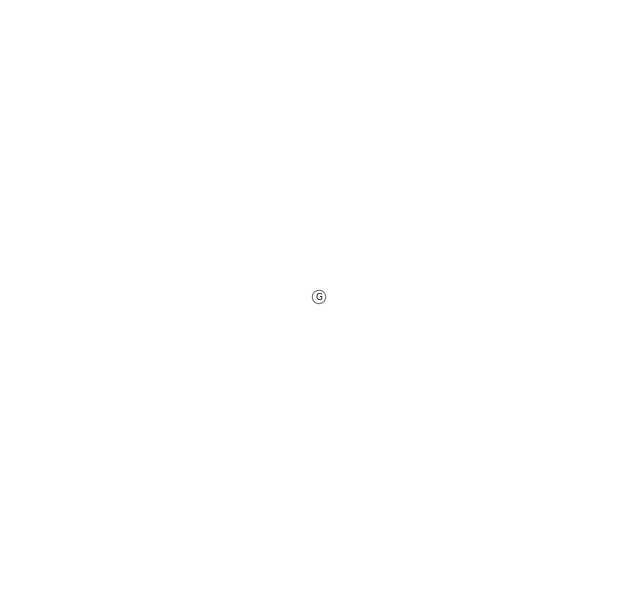

('sequence', 'U')


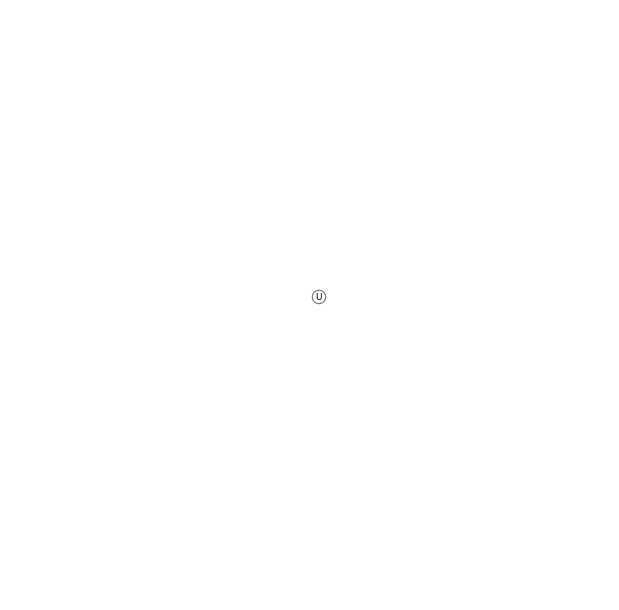

('sequence', 'G')


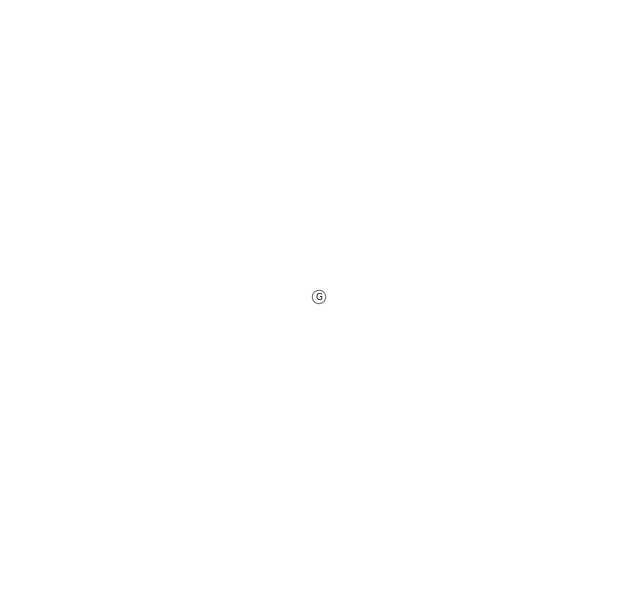

('sequence', 'G')


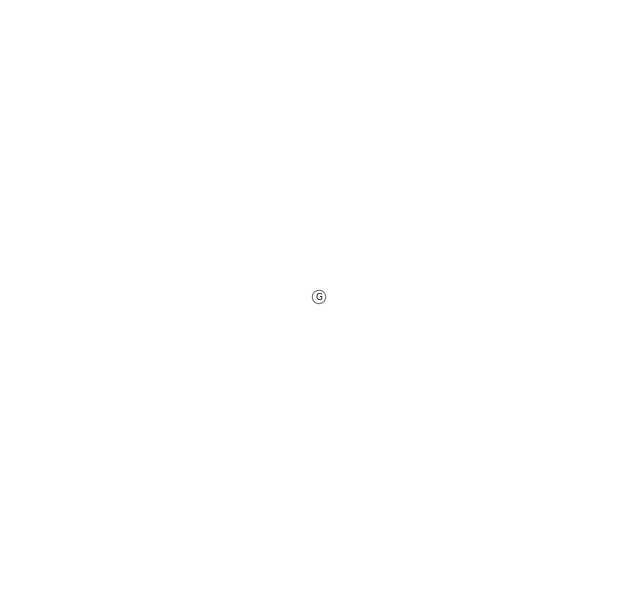

('sequence', 'G')


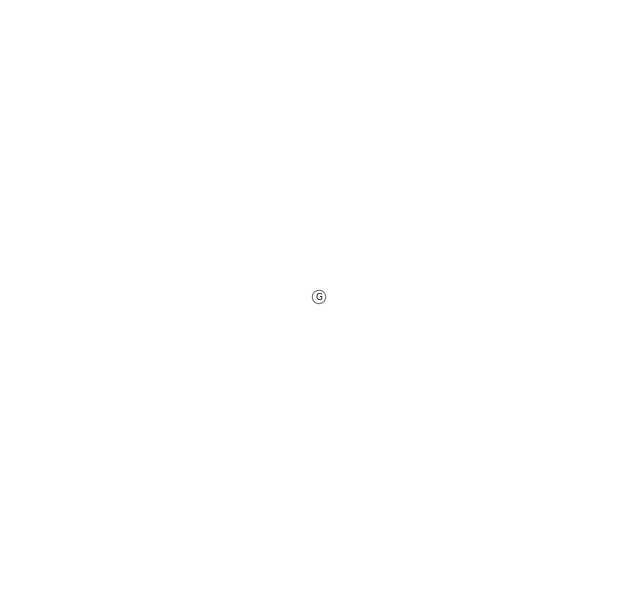

('sequence', 'U')


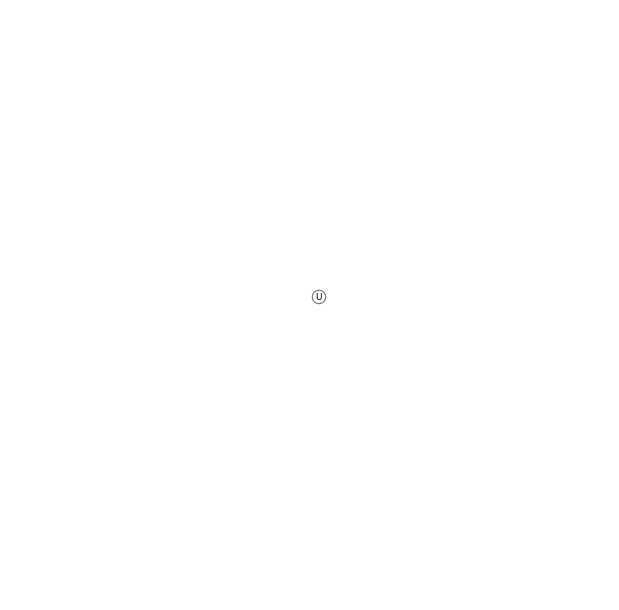

('sequence', 'C')


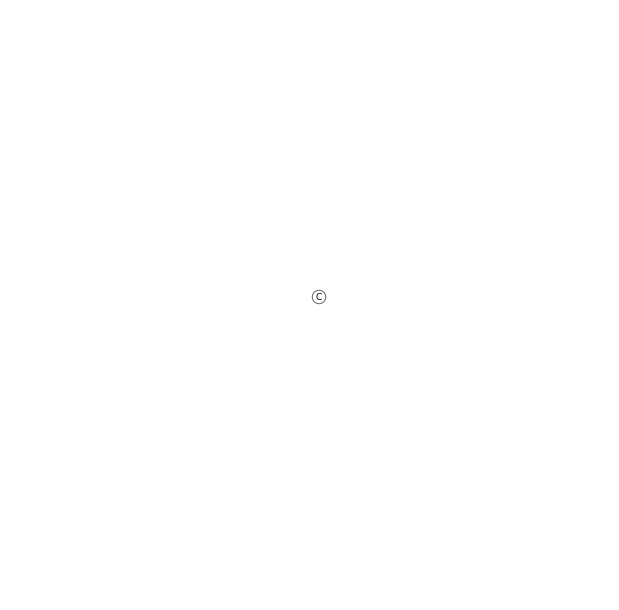

('sequence', 'C')


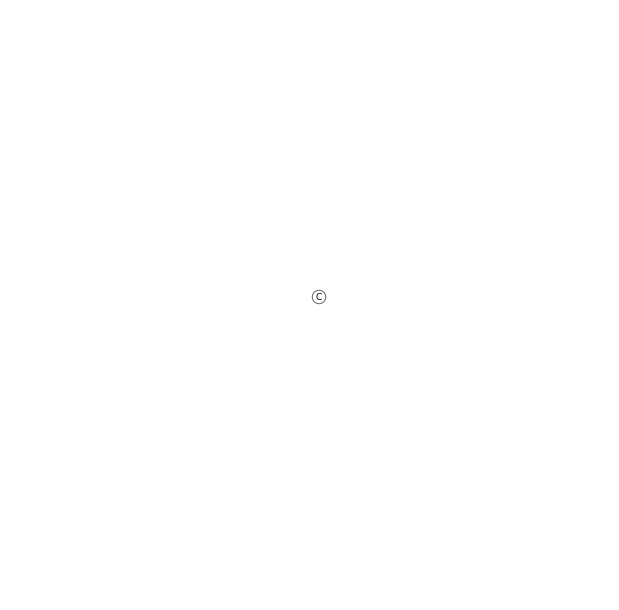

('sequence', 'A')


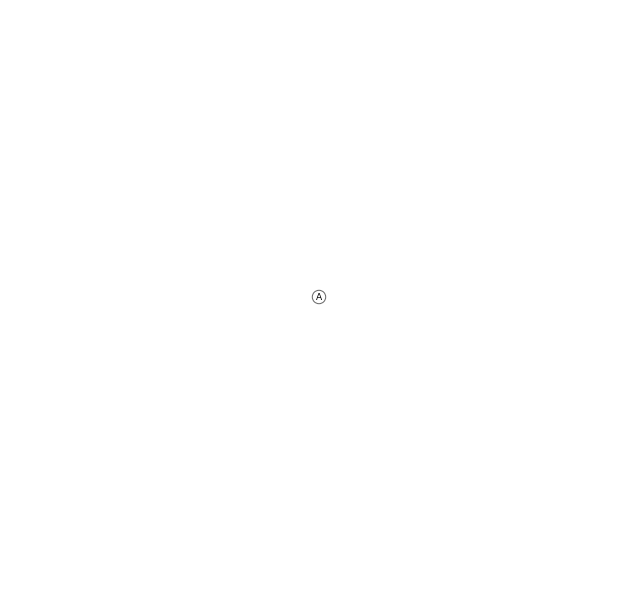

('sequence', 'C')


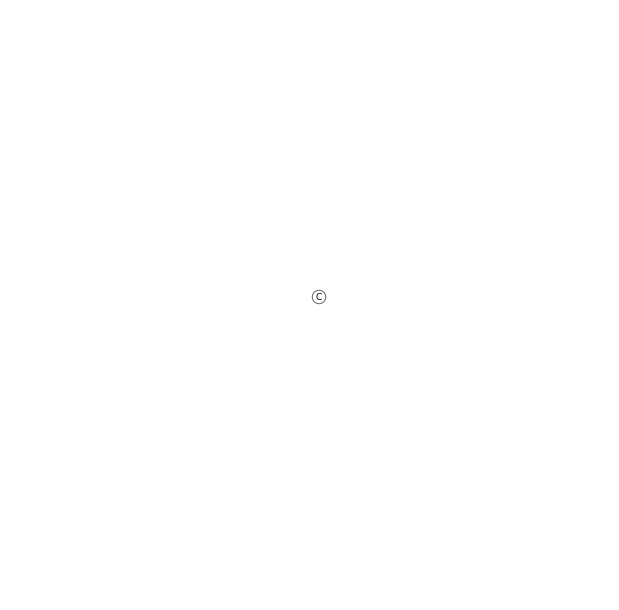

('sequence', 'A')


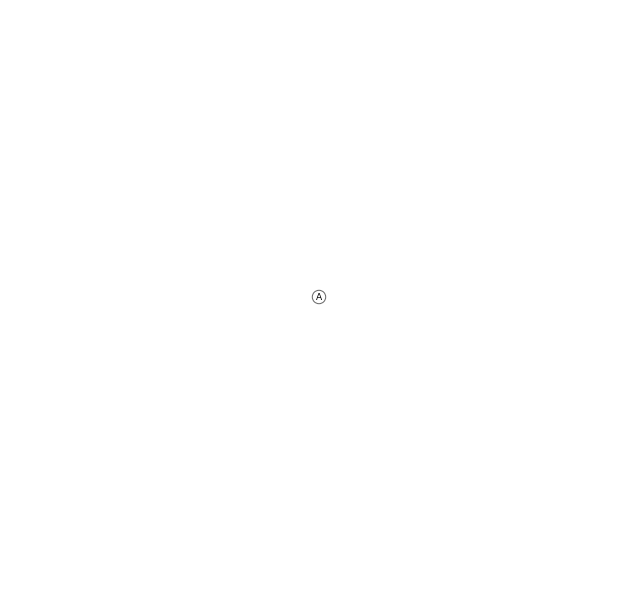

('sequence', 'U')


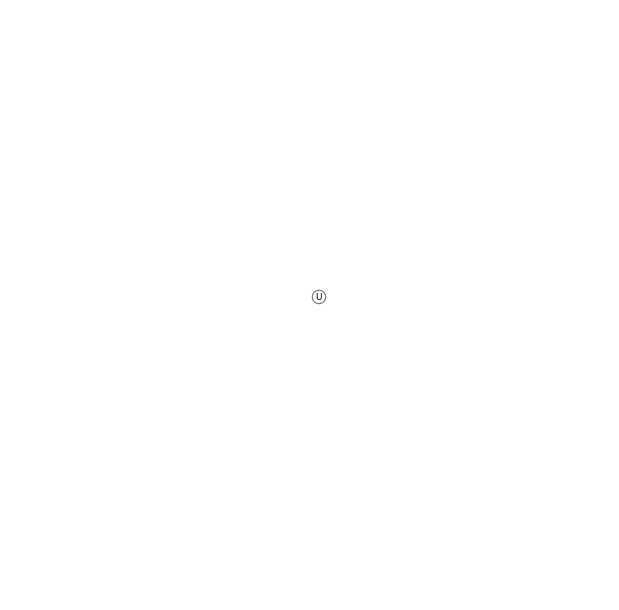

('sequence', 'U')


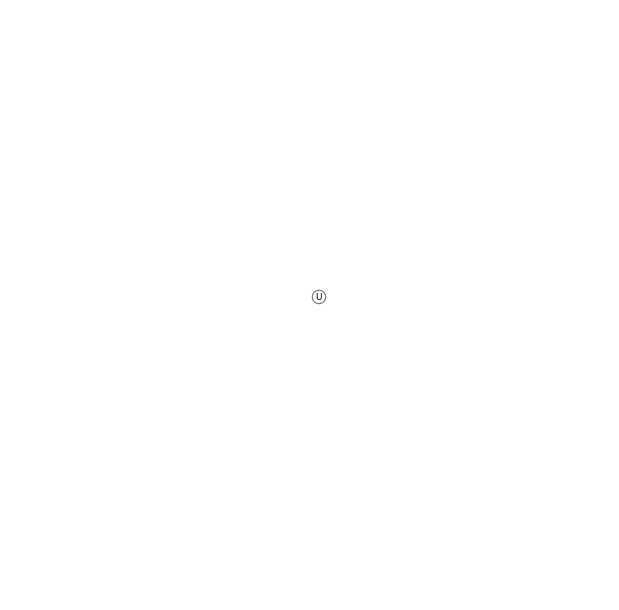

('sequence', 'A')


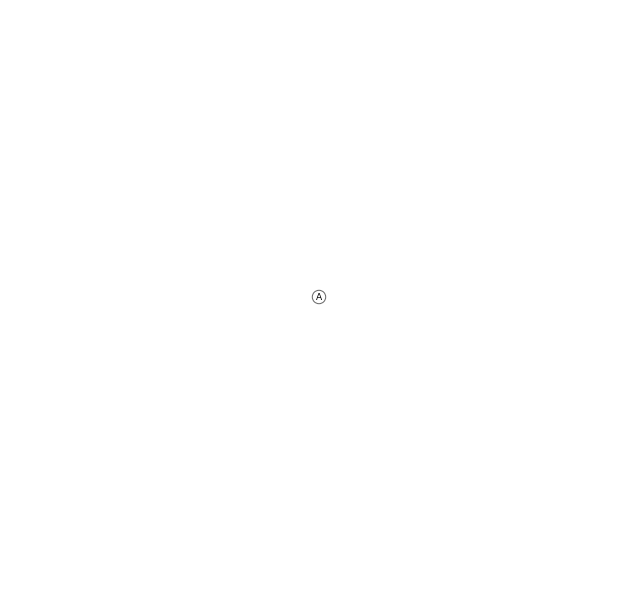

('sequence', 'G')


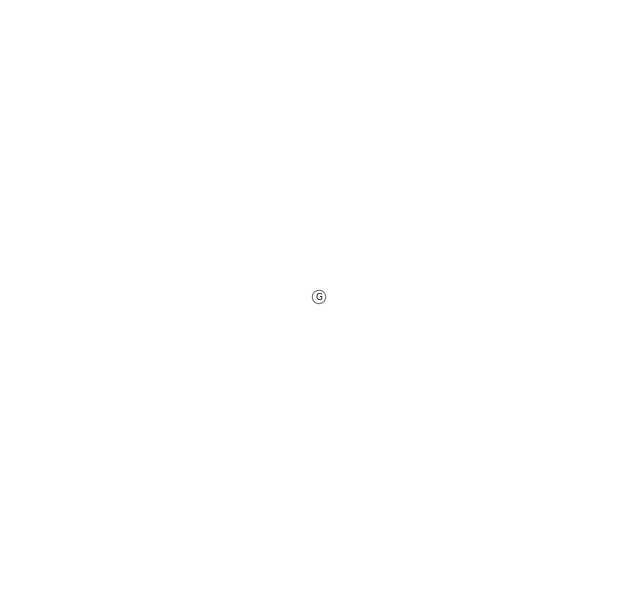

('sequence', 'A')


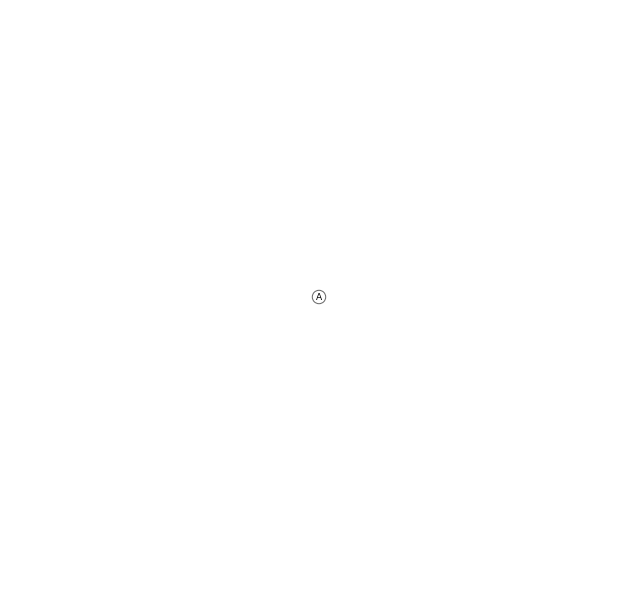

('sequence', 'U')


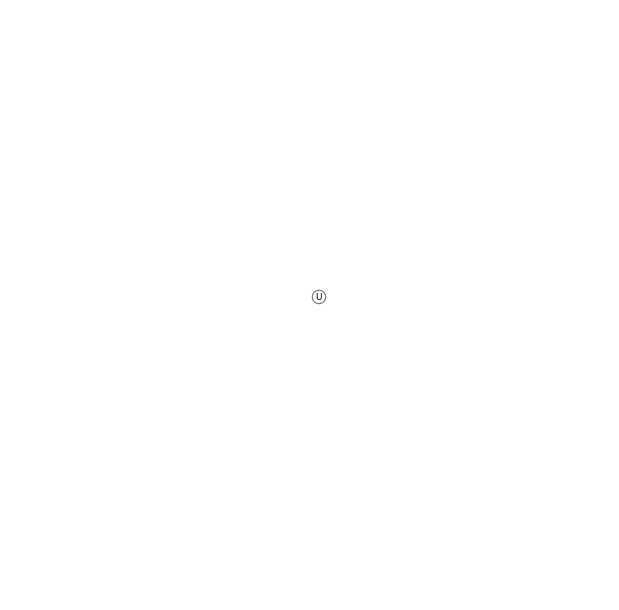

('sequence', 'G')


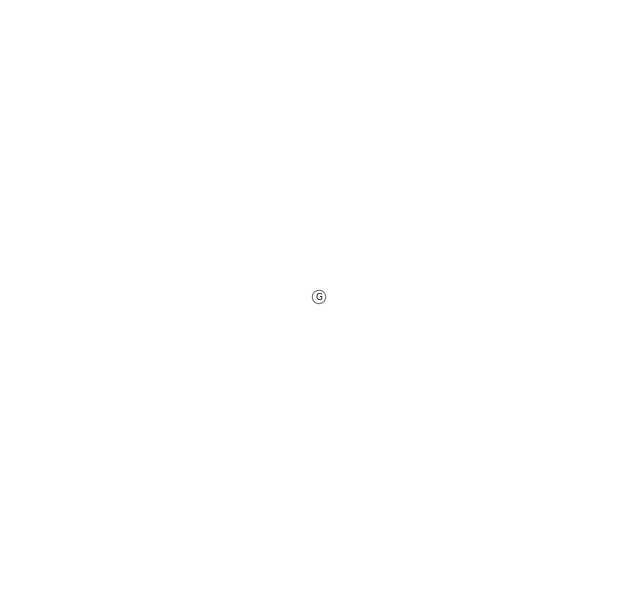

('sequence', 'A')


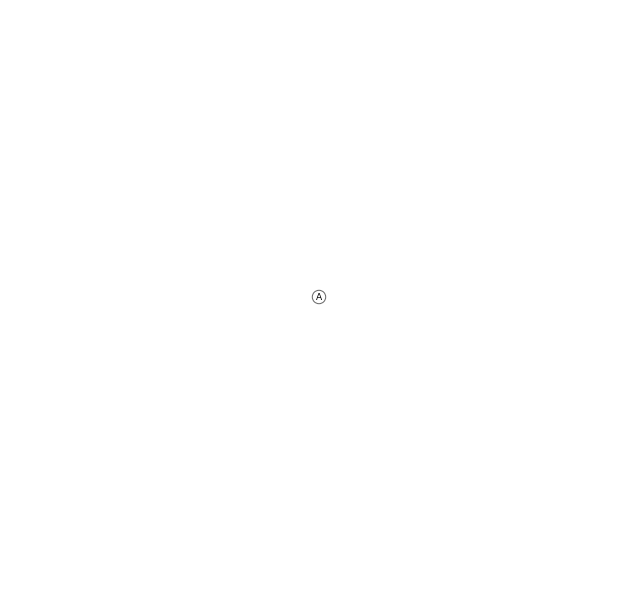

('sequence', 'C')


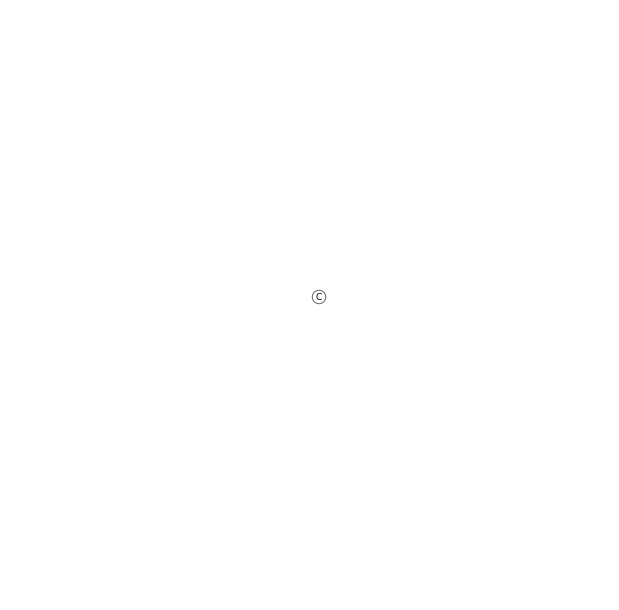

('sequence', 'U')


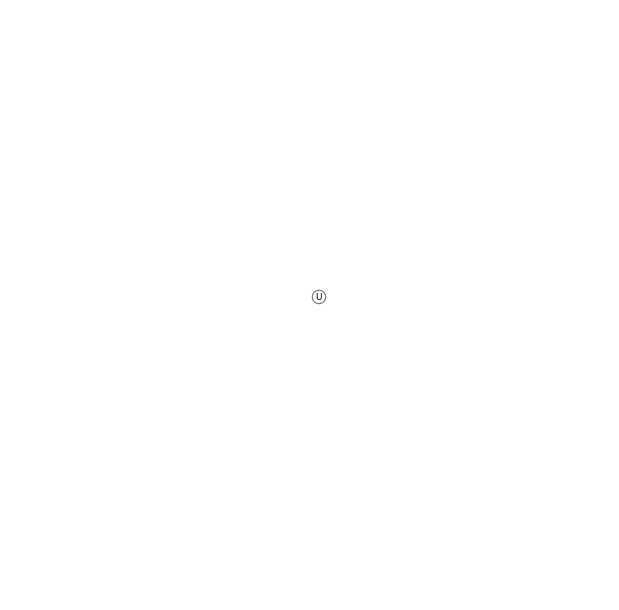

('sequence', 'G')


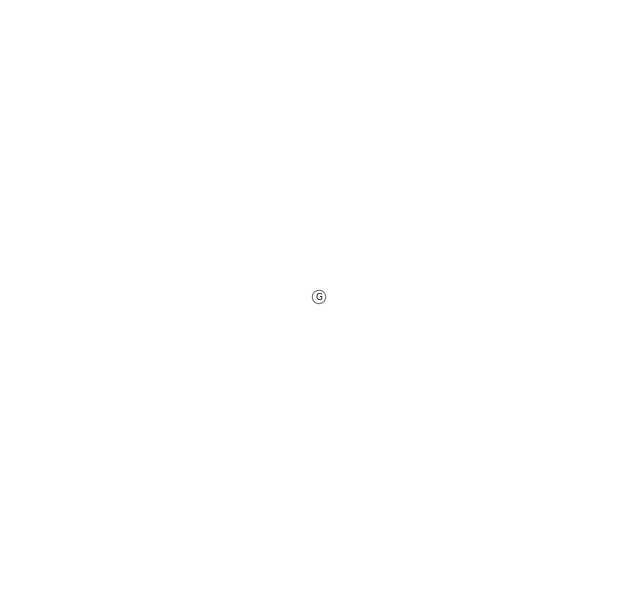

('sequence', 'A')


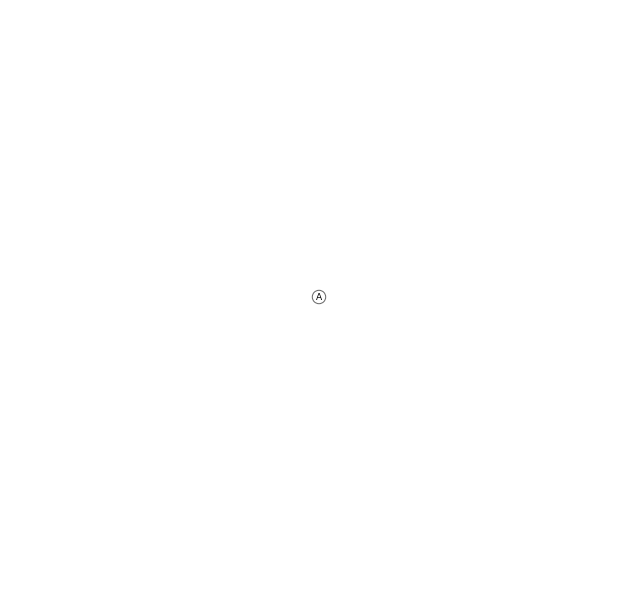

('sequence', 'A')


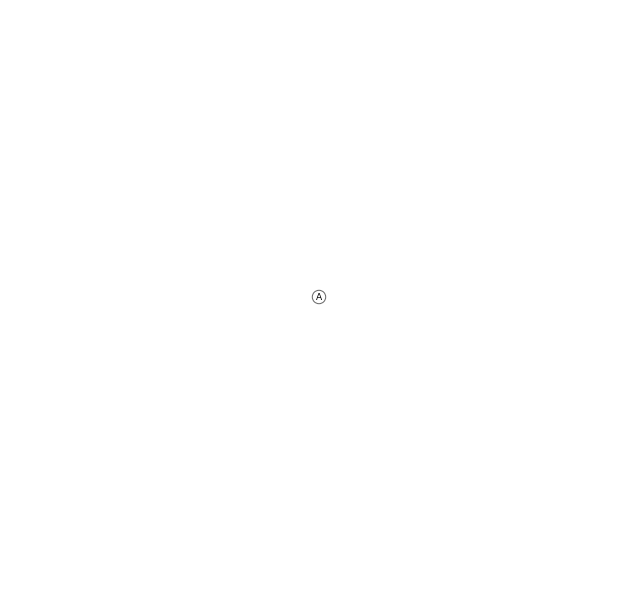

('sequence', 'A')


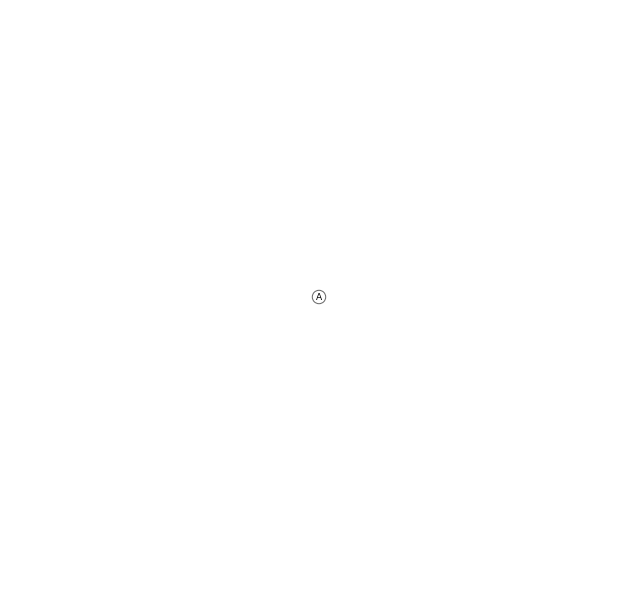

('sequence', 'G')


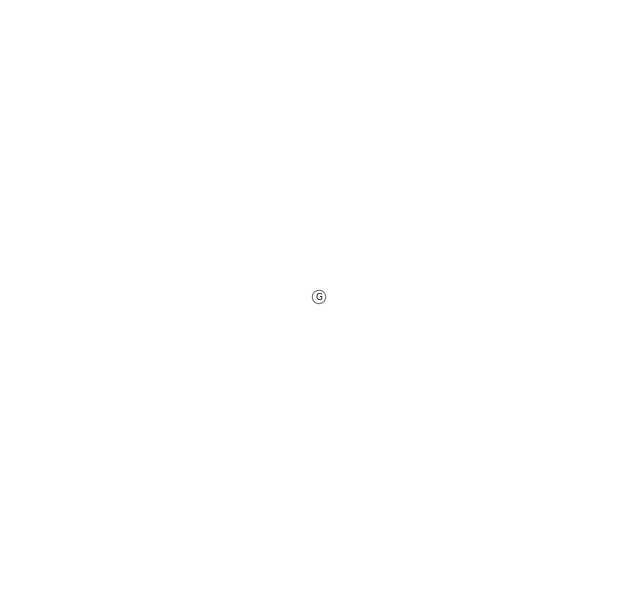

('sequence', 'C')


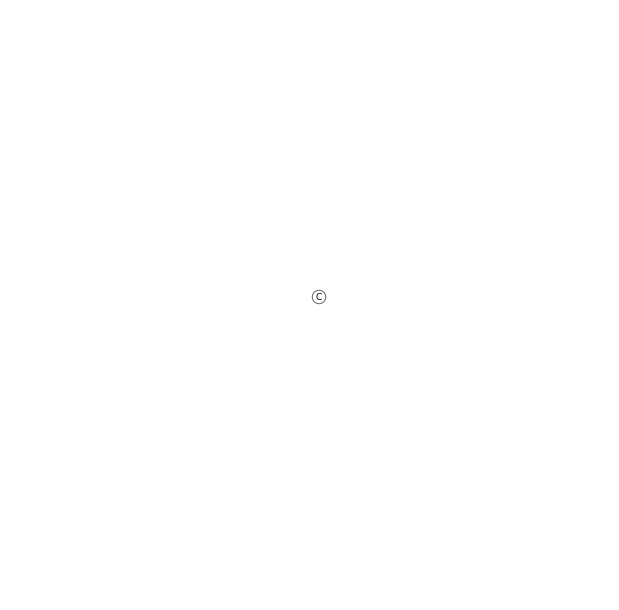

('sequence', 'A')


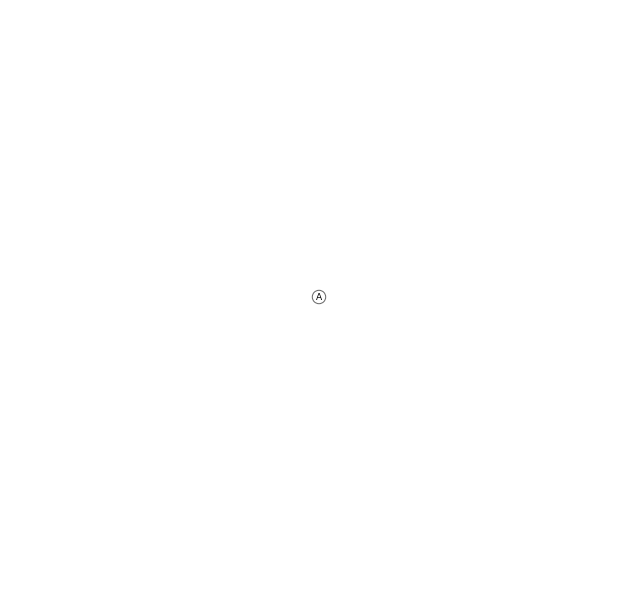

('sequence', 'A')


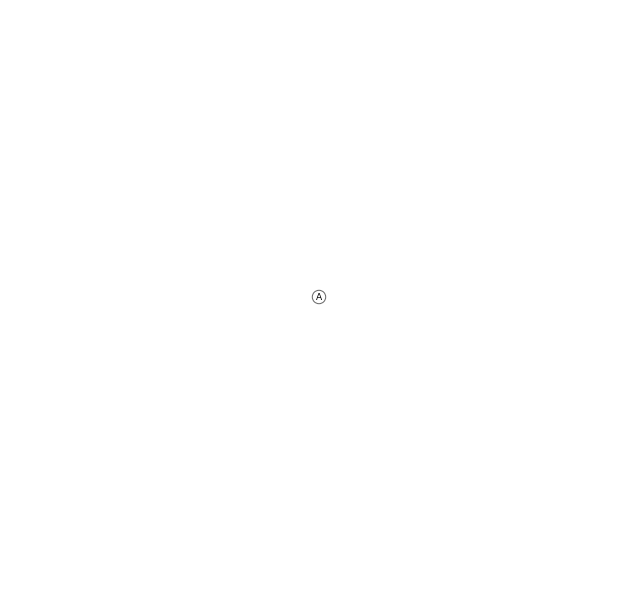

('sequence', 'G')


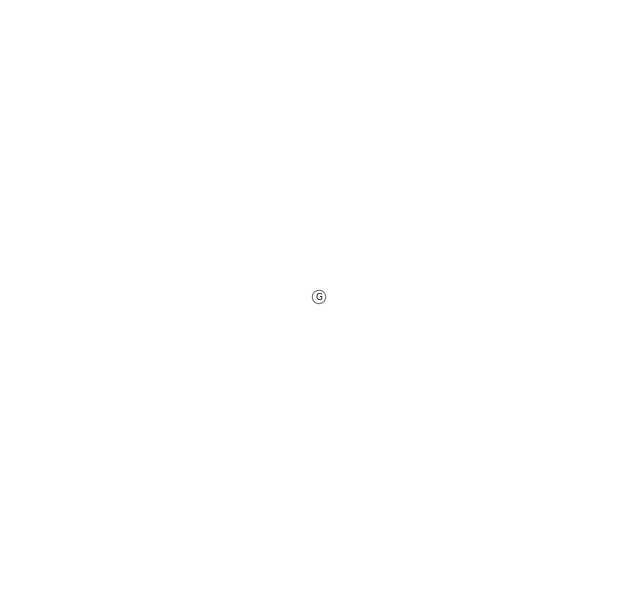

('sequence', 'U')


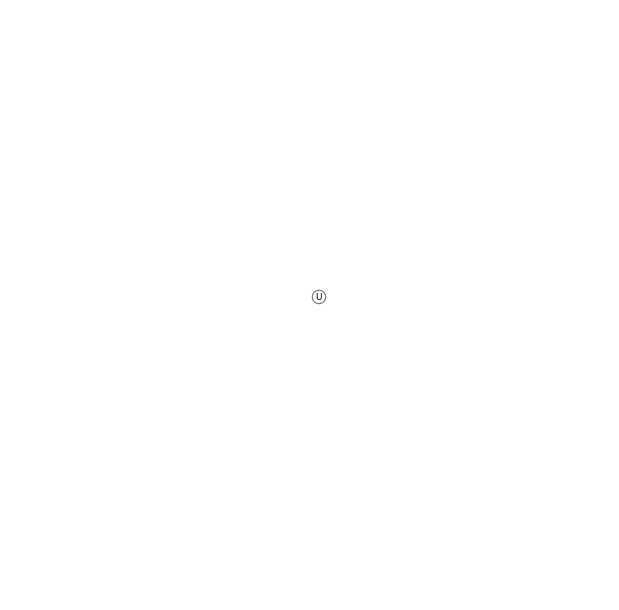

('sequence', 'A')


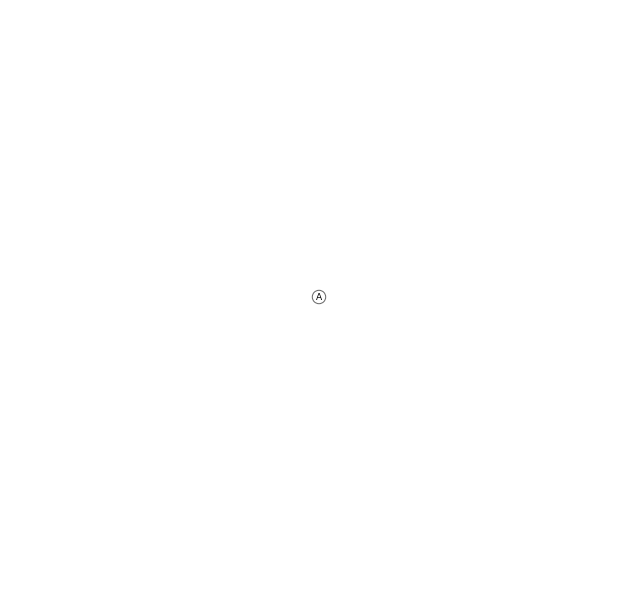

('sequence', 'C')


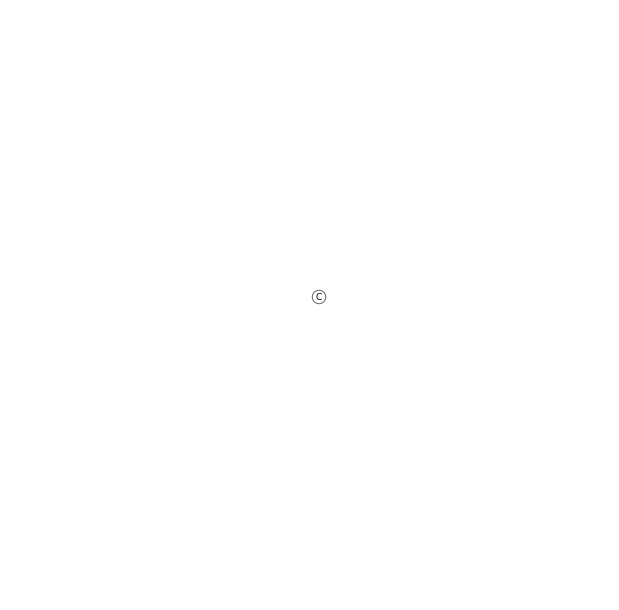

('sequence', 'U')


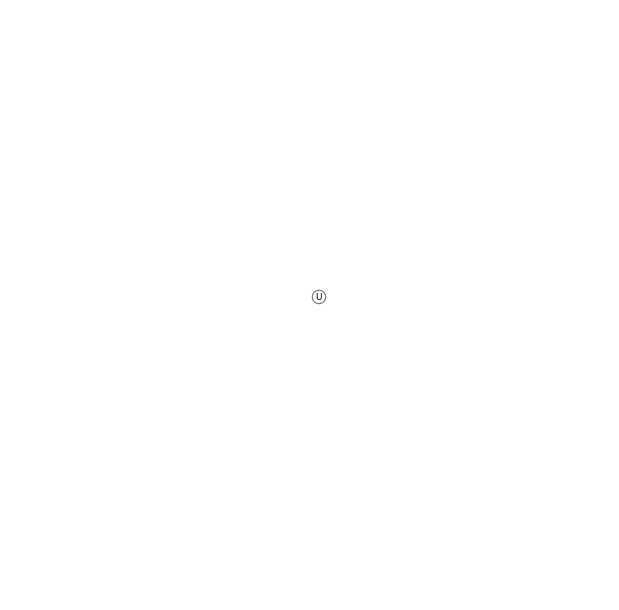

('sequence', 'G')


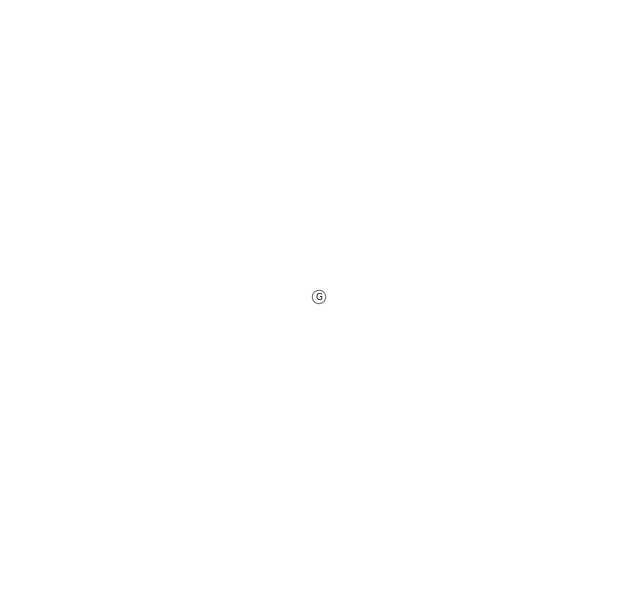

('sequence', 'G')


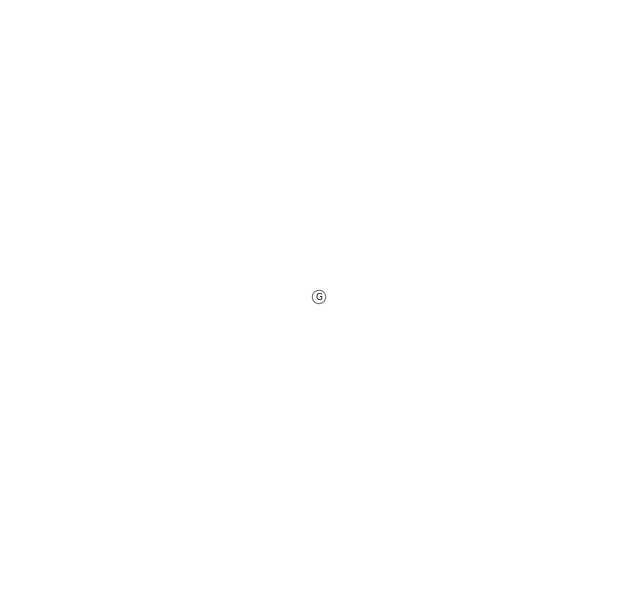

('sequence', 'U')


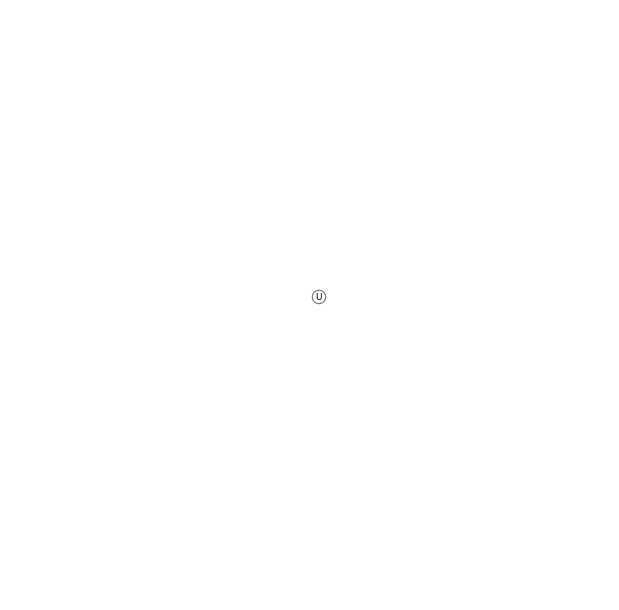

('sequence', 'C')


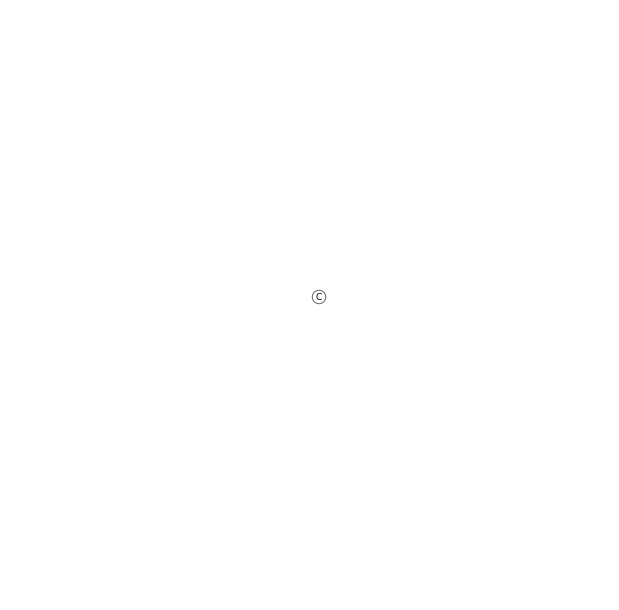

('sequence', 'U')


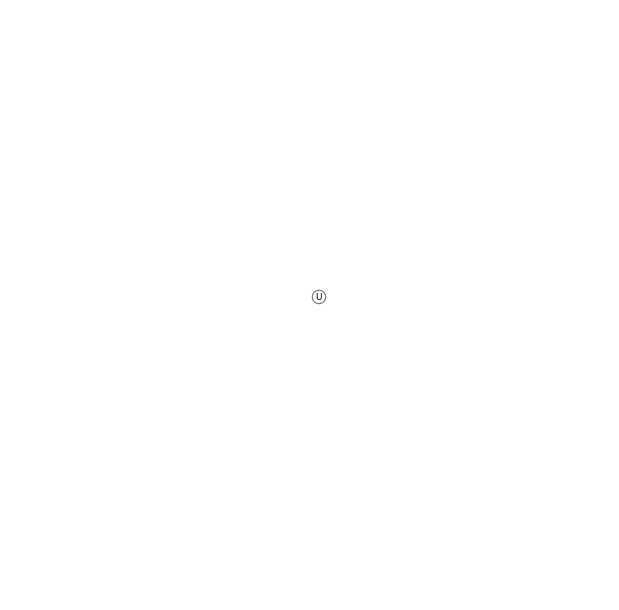

('sequence', 'C')


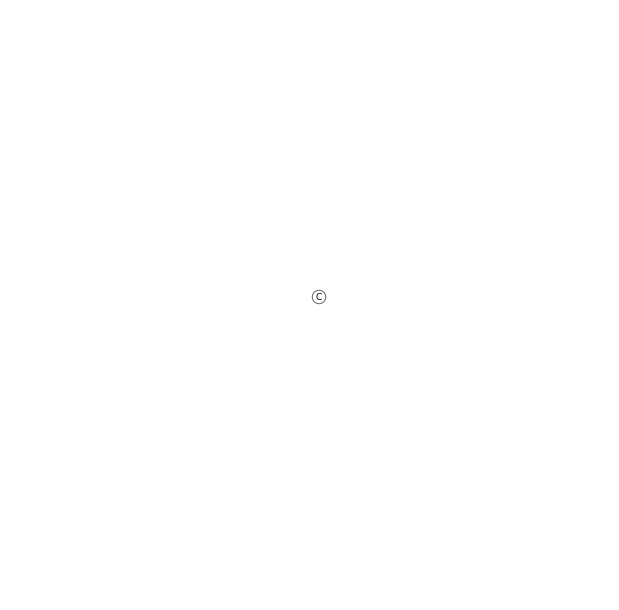

('sequence', 'U')


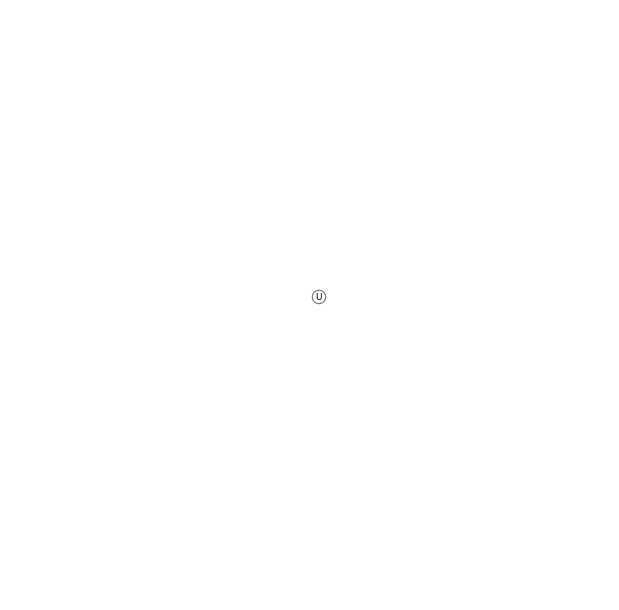

('sequence', 'U')


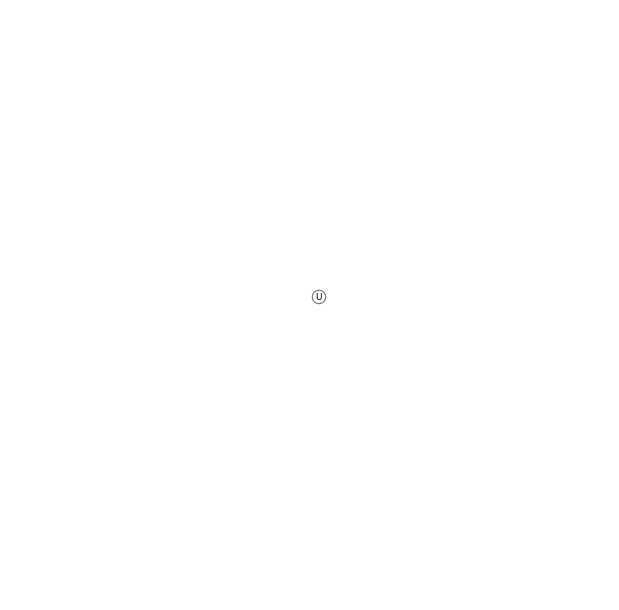

('sequence', 'A')


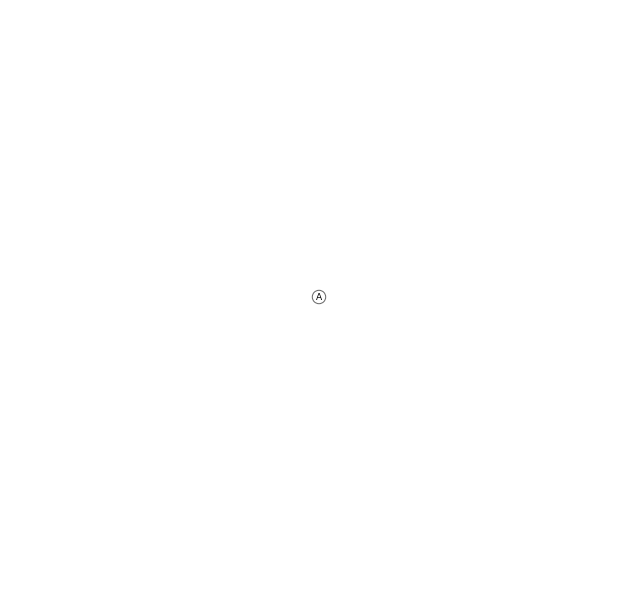

('sequence', 'A')


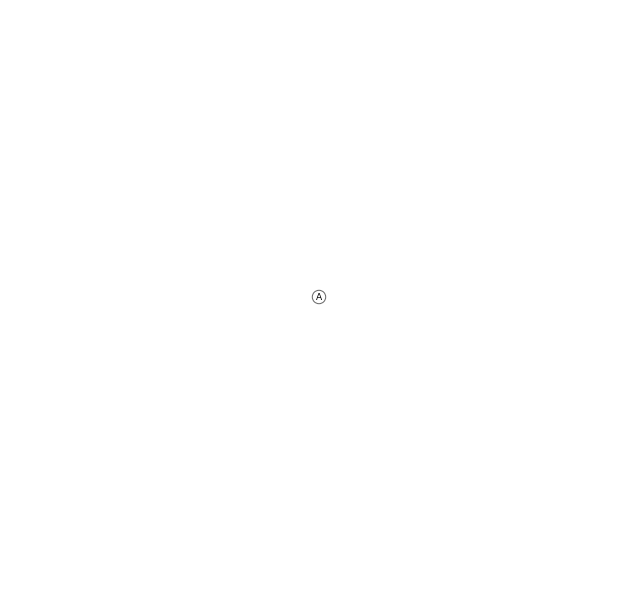

('sequence', 'A')


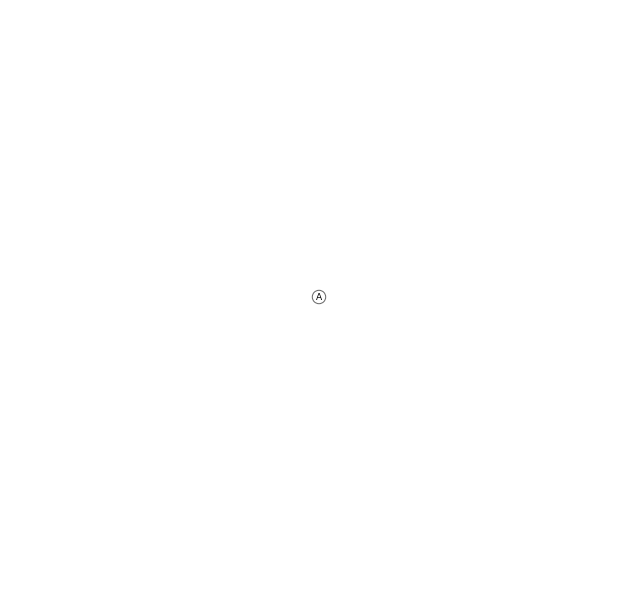

('sequence', 'C')


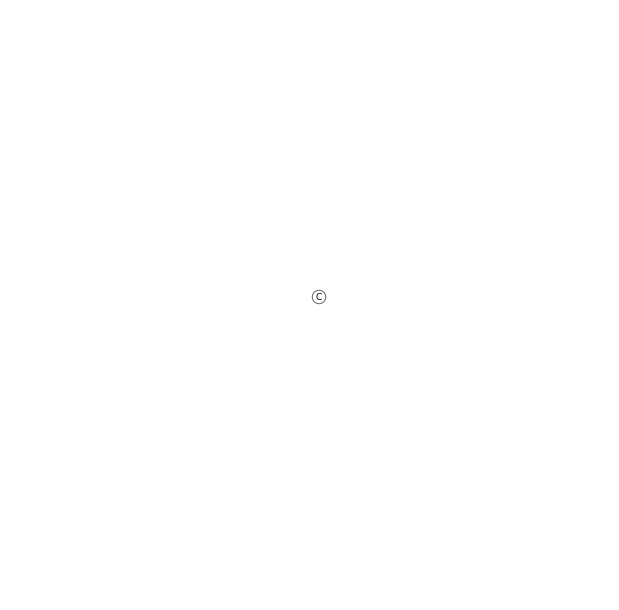

('sequence', 'C')


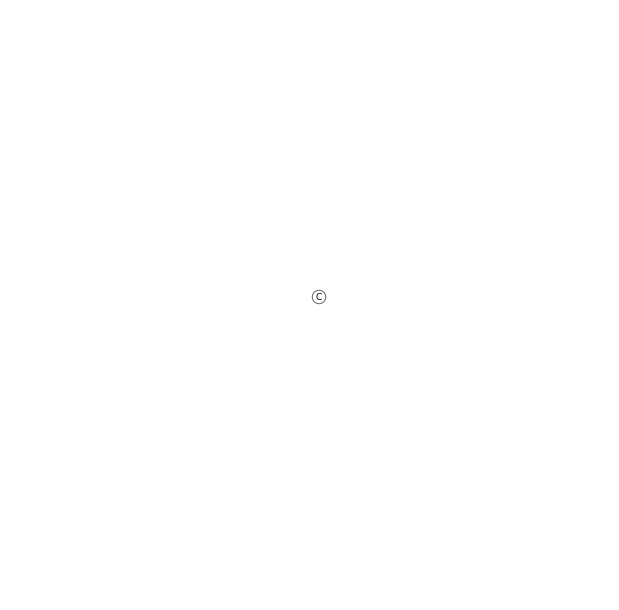

('sequence', 'A')


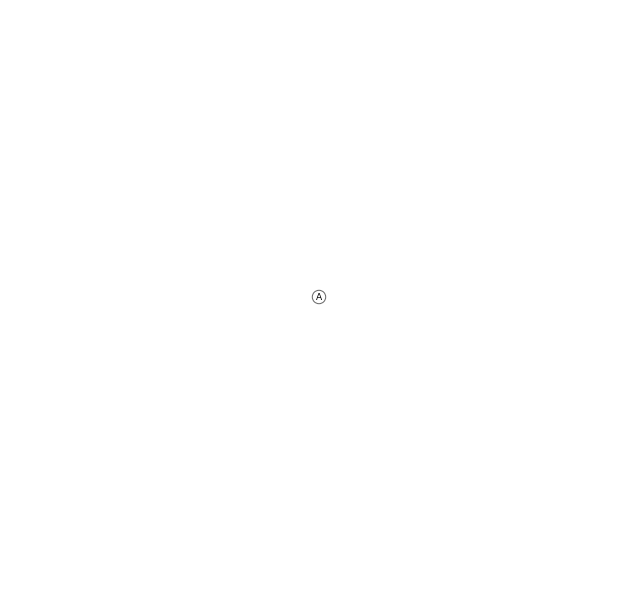

('sequence', 'U')


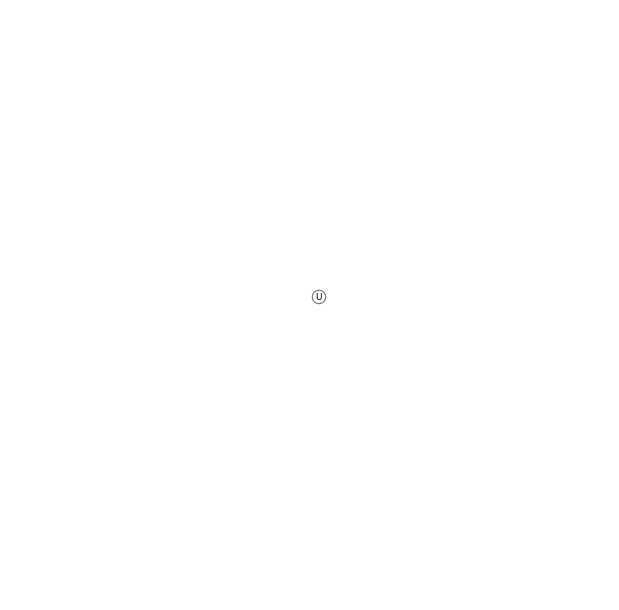

('sequence', 'U')


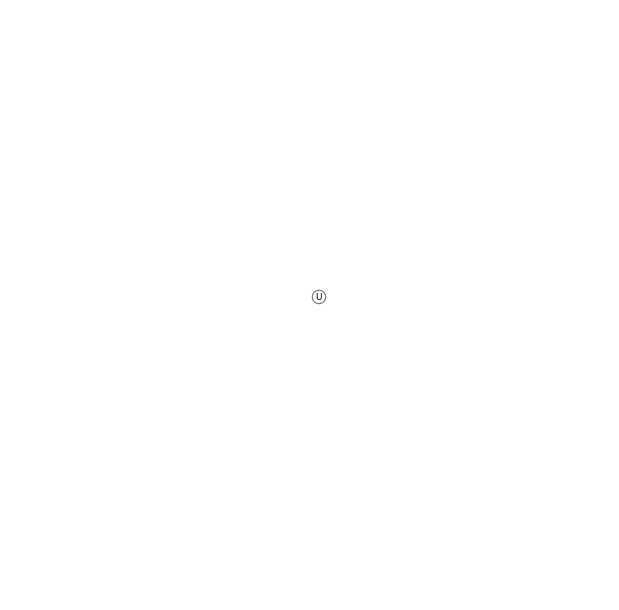

('sequence', 'U')


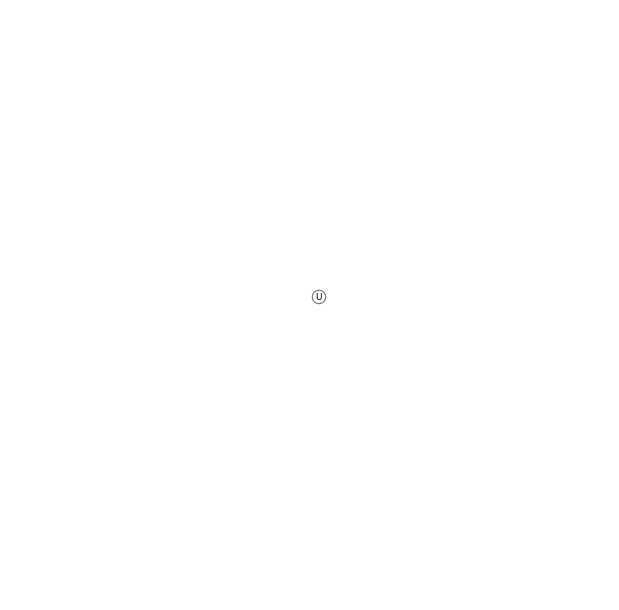

('sequence', 'A')


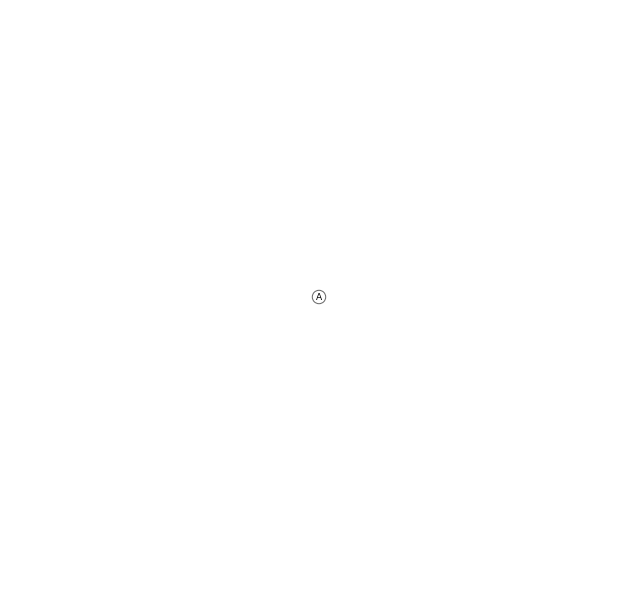

('sequence', 'A')


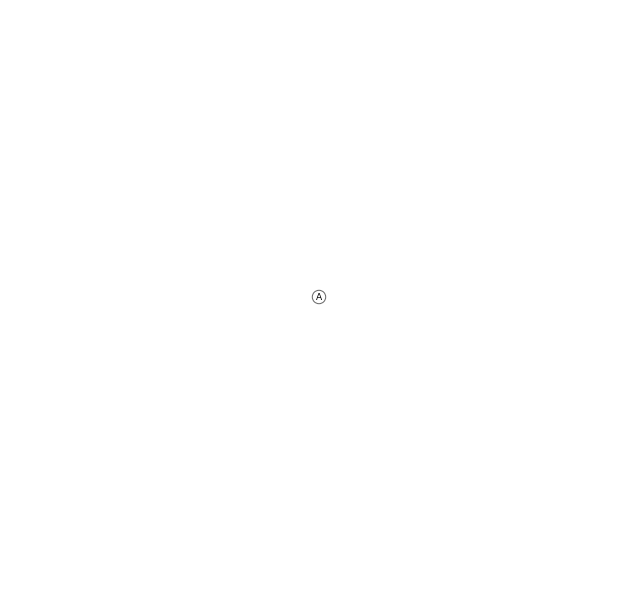

('sequence', 'U')


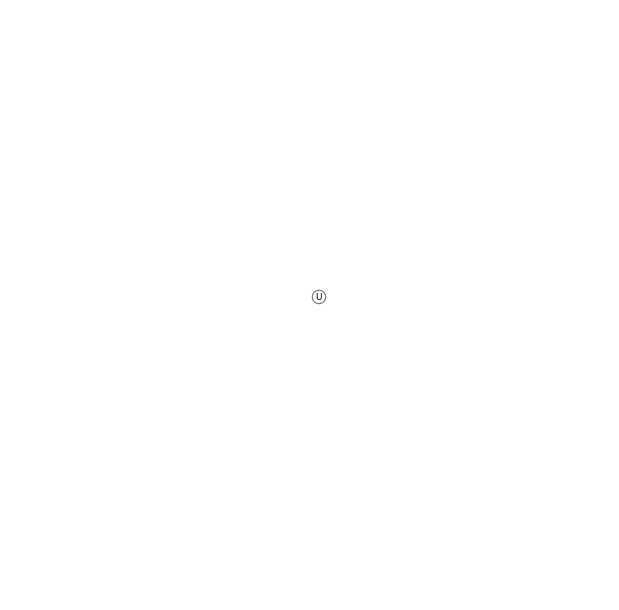

('sequence', 'A')


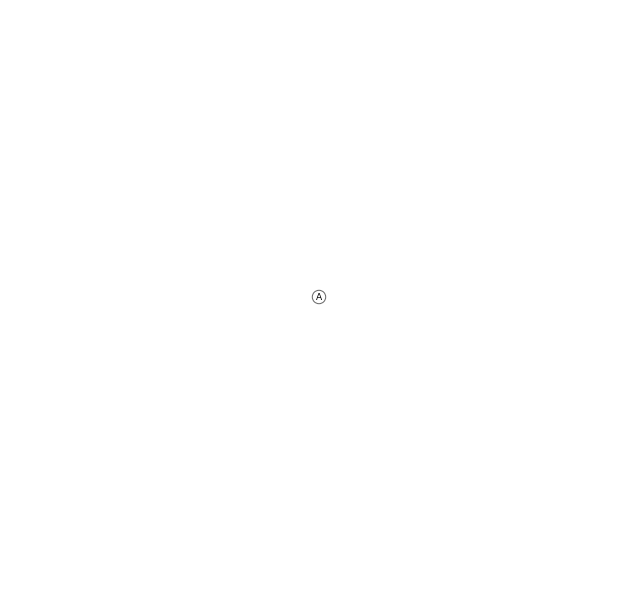

('sequence', 'G')


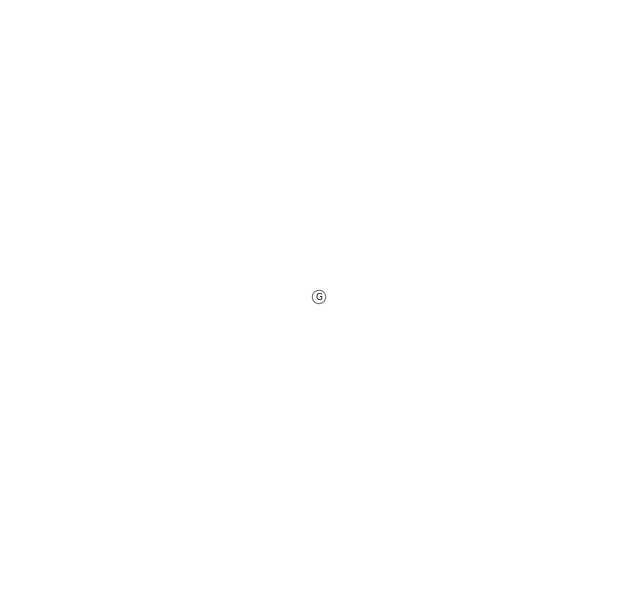

('sequence', 'U')


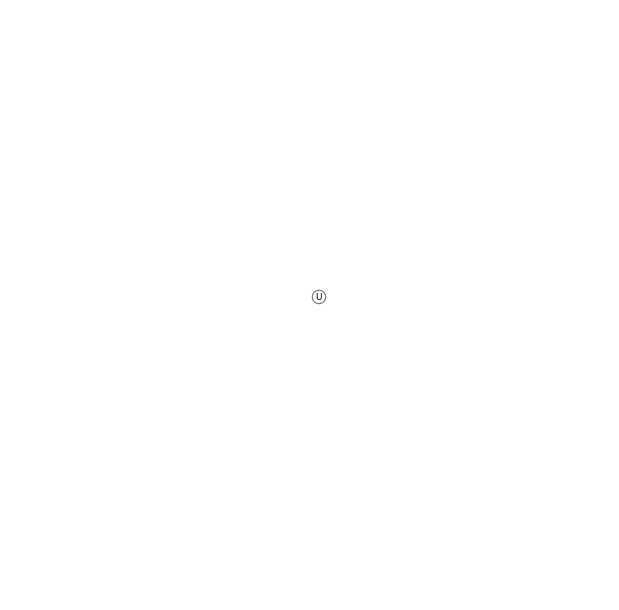

('sequence', 'A')


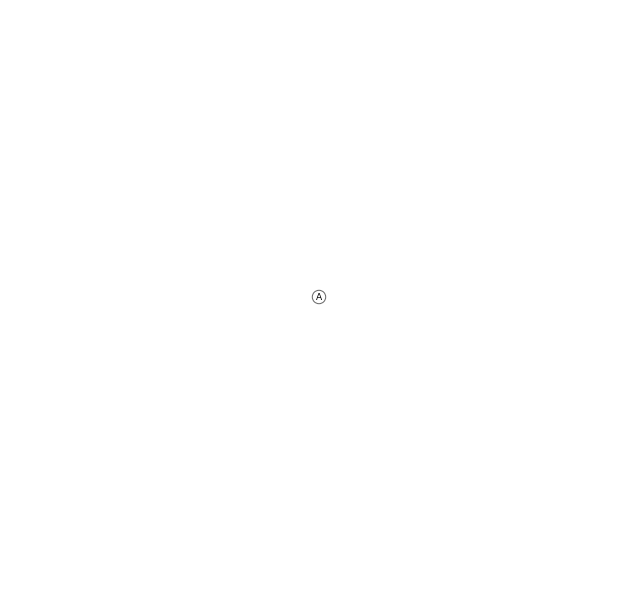

('sequence', 'A')


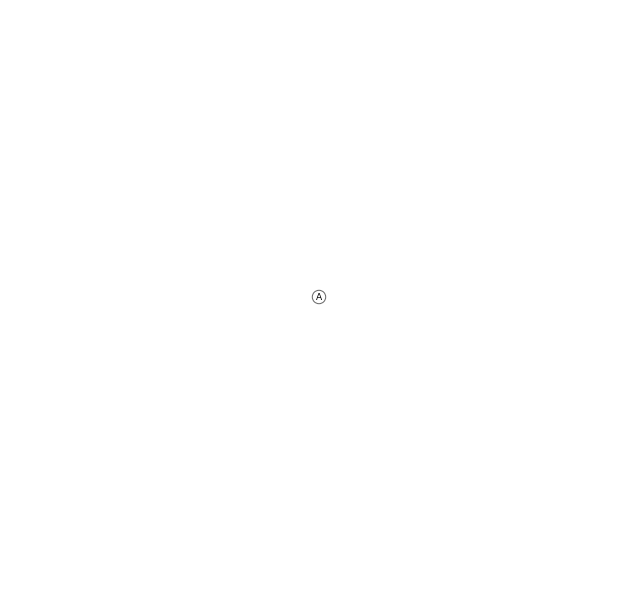

('sequence', 'A')


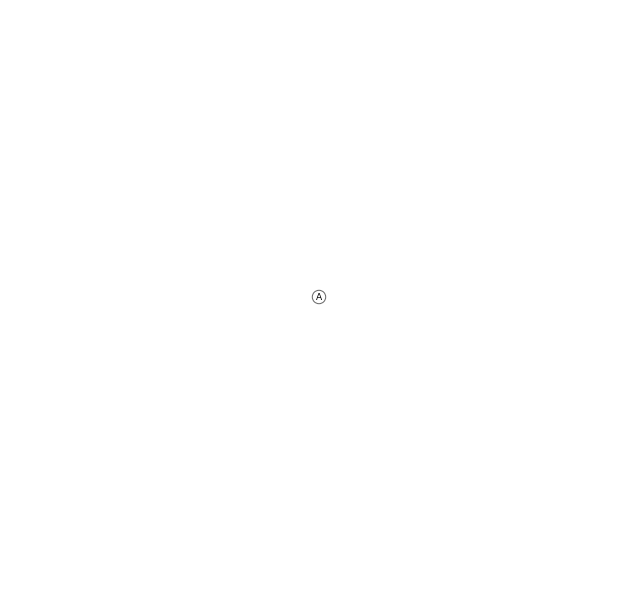

('sequence', 'U')


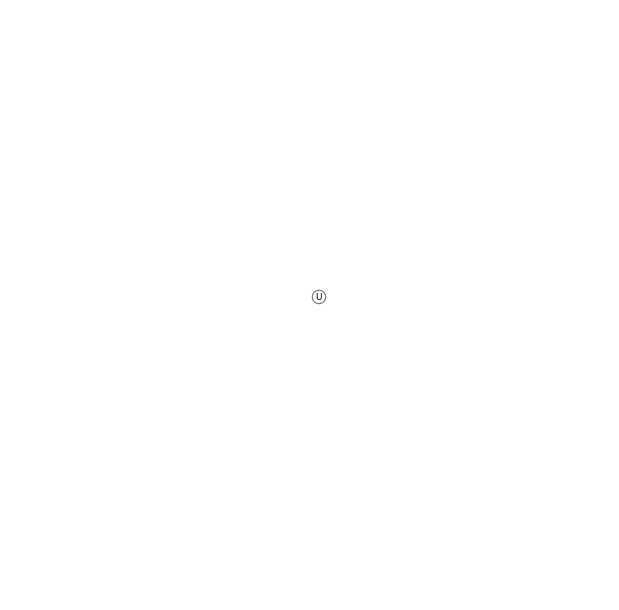

('sequence', 'U')


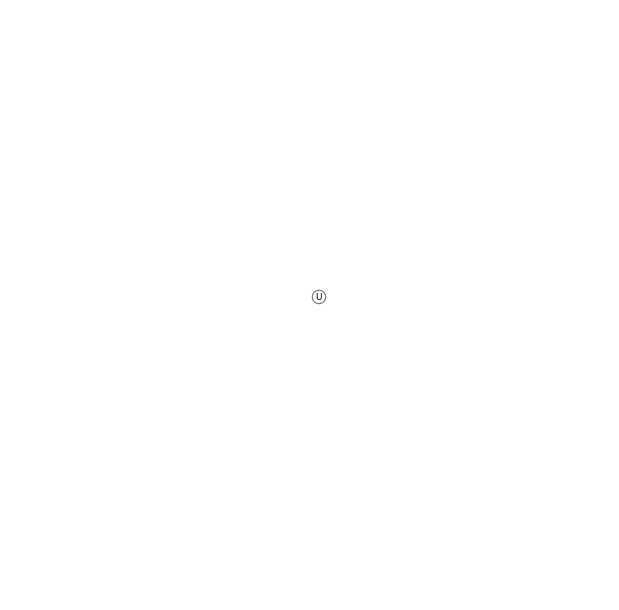

('sequence', 'A')


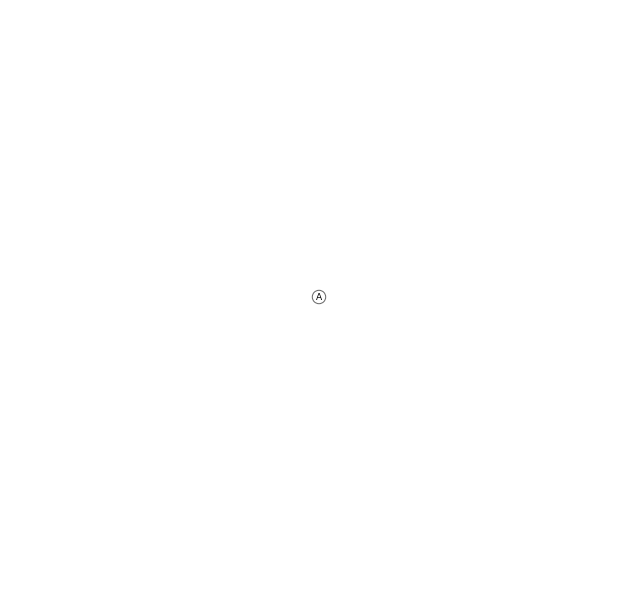

('sequence', 'G')


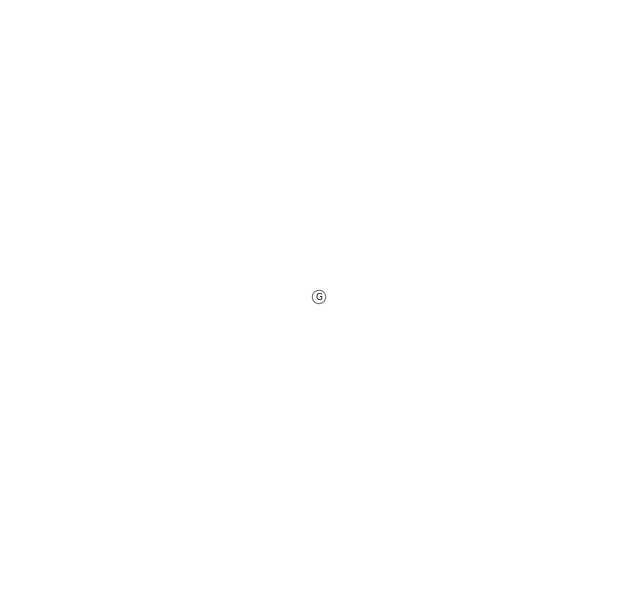

('sequence', 'C')


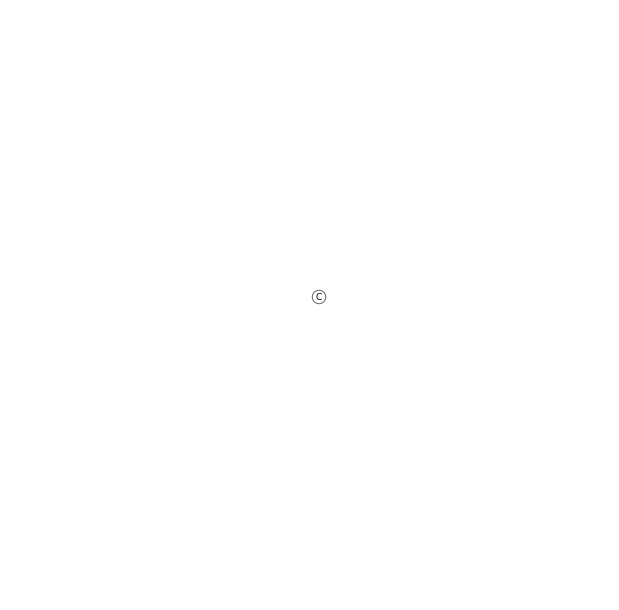

('sequence', 'A')


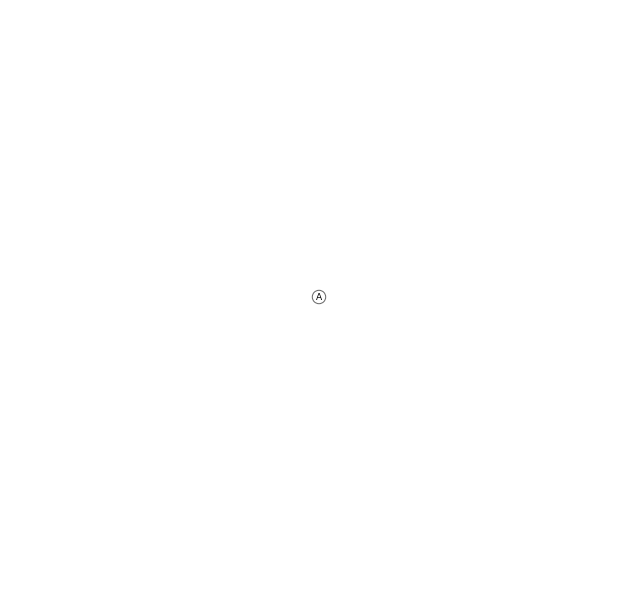

('sequence', 'C')


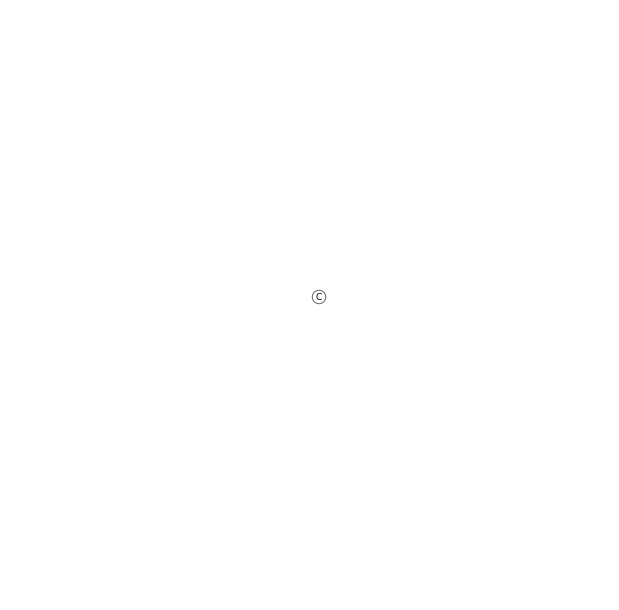

('sequence', 'U')


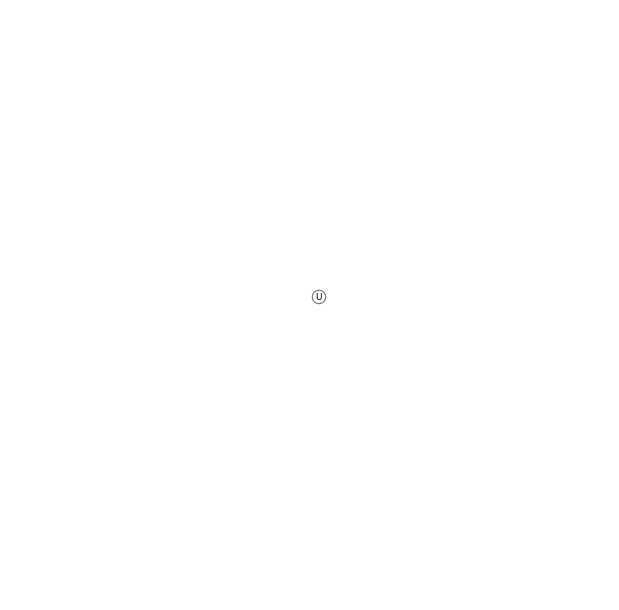

('sequence', 'U')


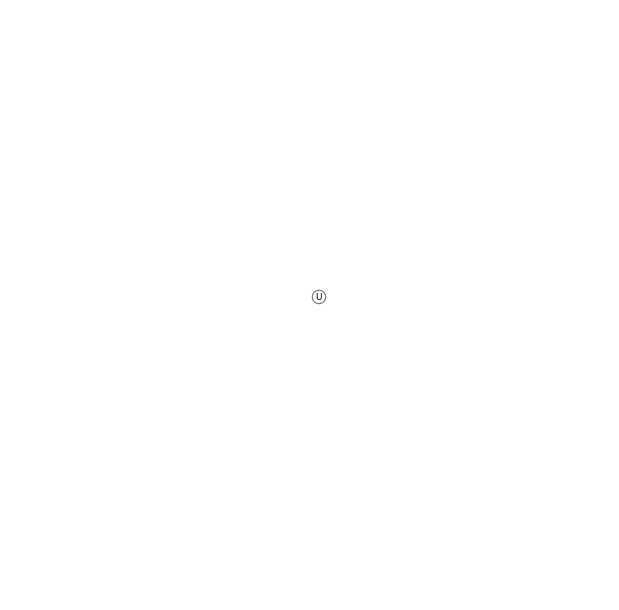

('sequence', 'A')


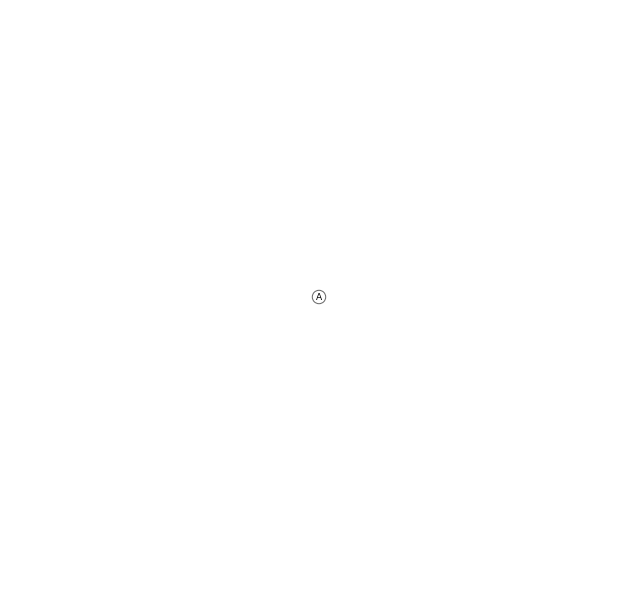

('sequence', 'C')


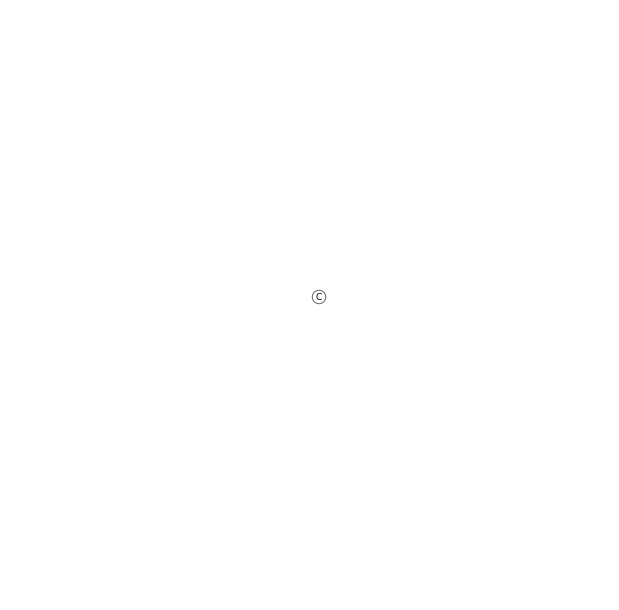

('sequence', 'U')


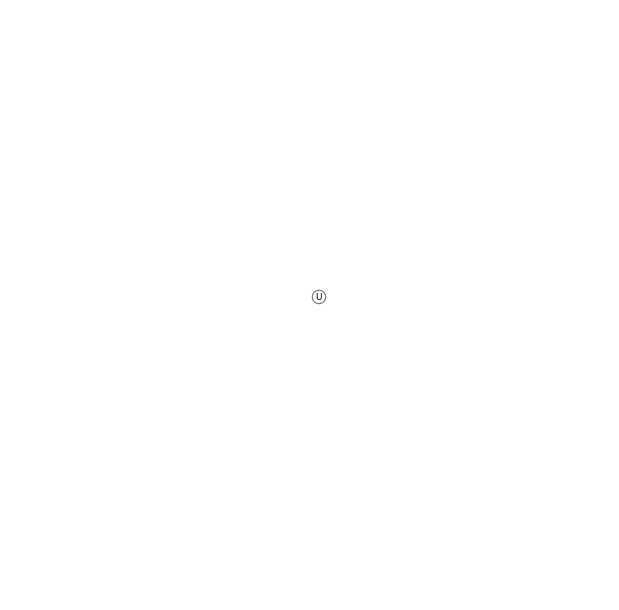

('sequence', 'U')


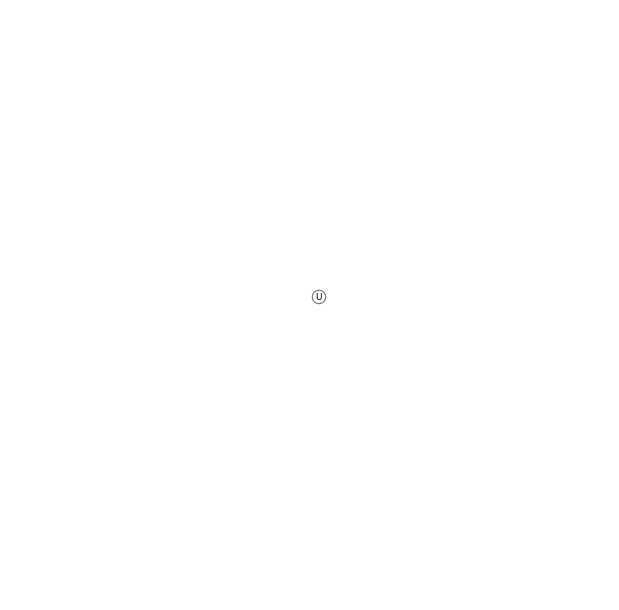

('sequence', 'C')


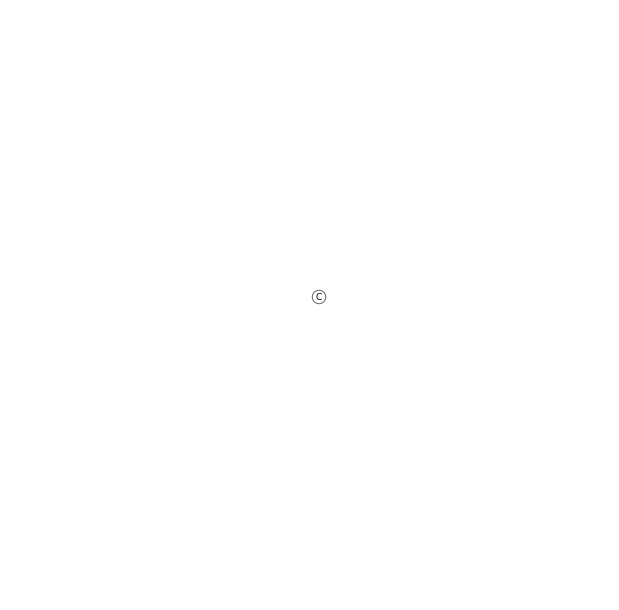

('sequence', 'U')


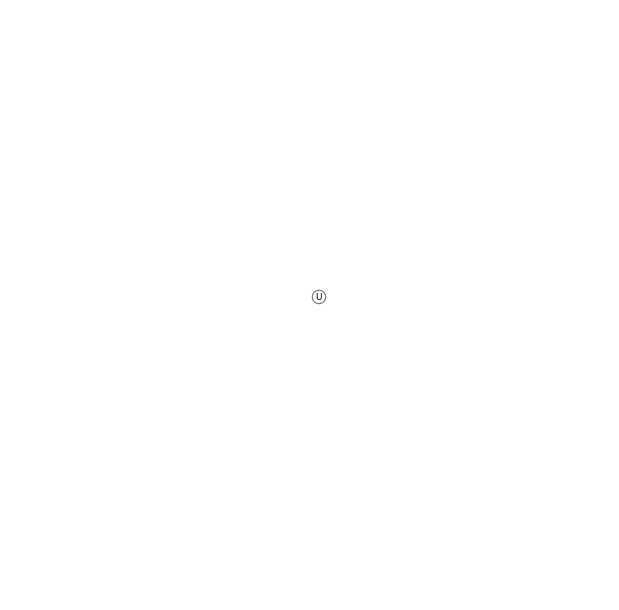

('sequence', 'A')


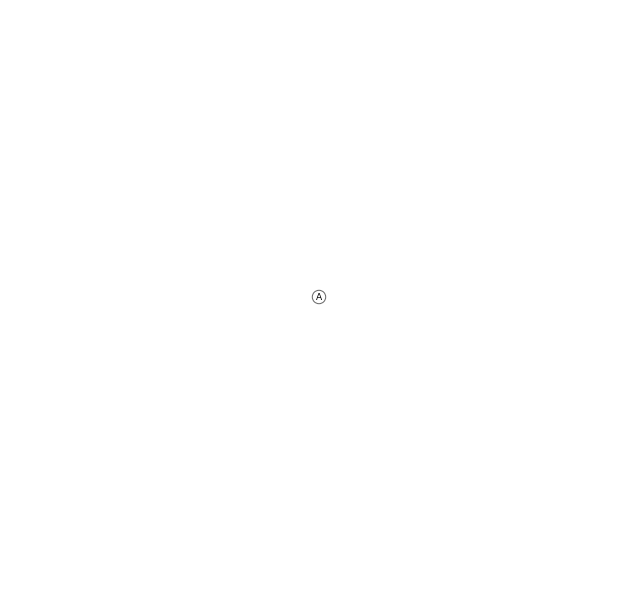

('sequence', 'A')


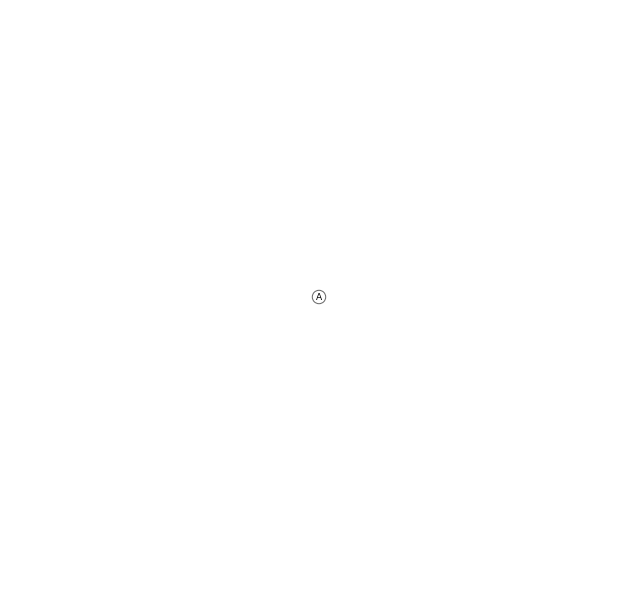

('sequence', 'U')


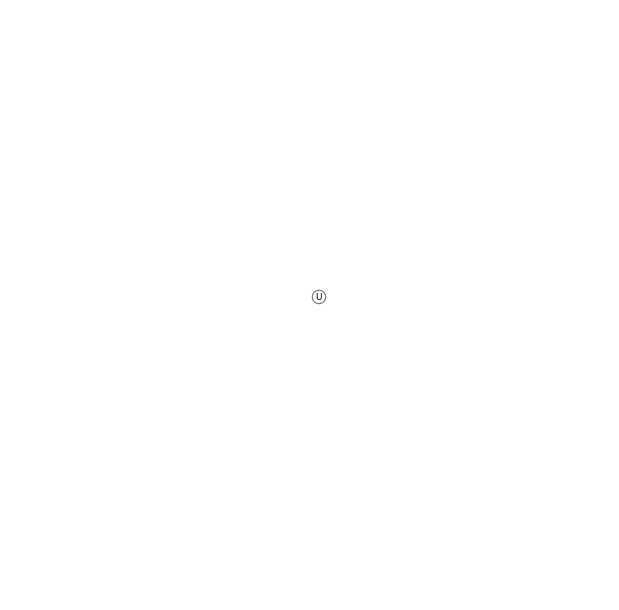

('sequence', 'G')


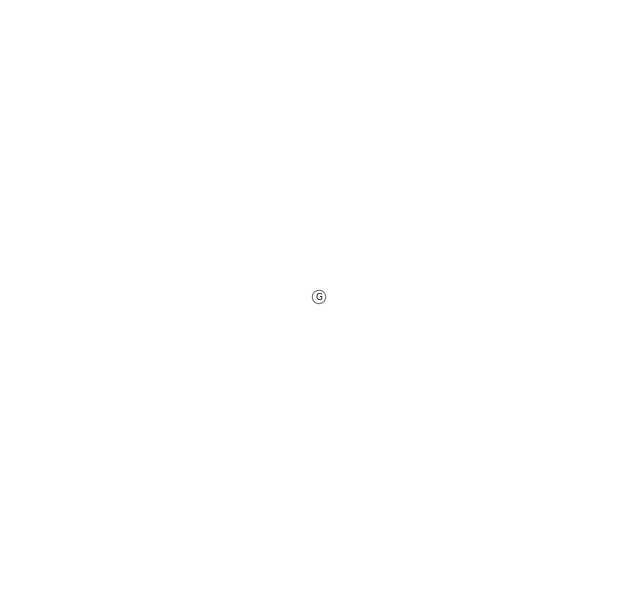

('sequence', 'A')


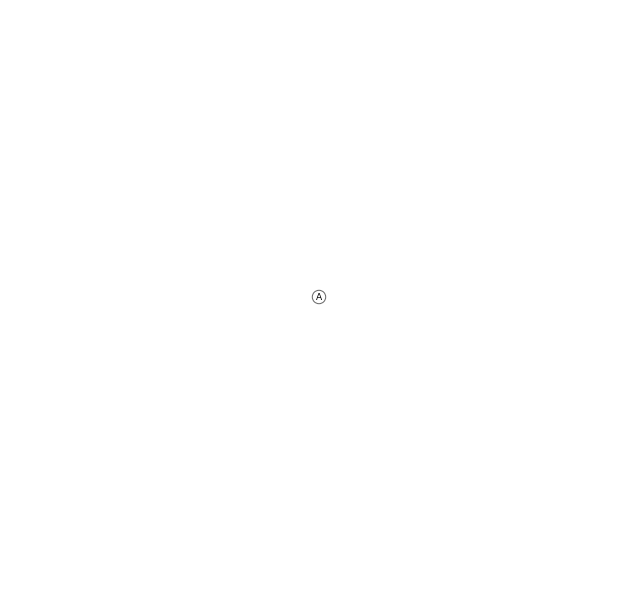

('sequence', 'G')


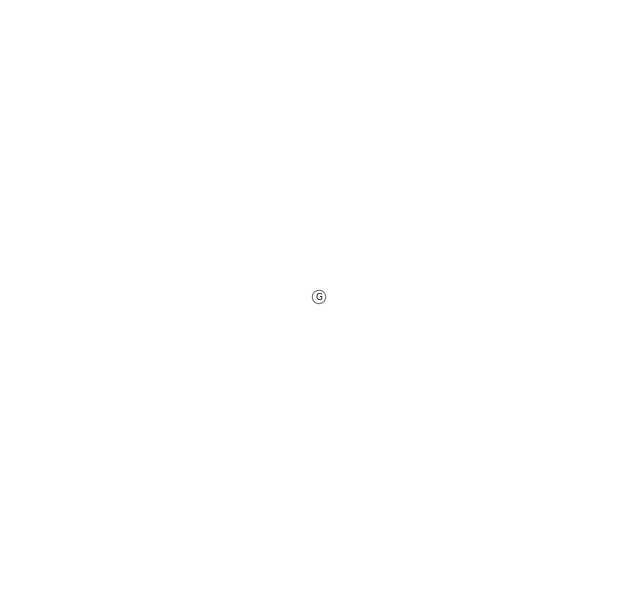

('sequence', 'C')


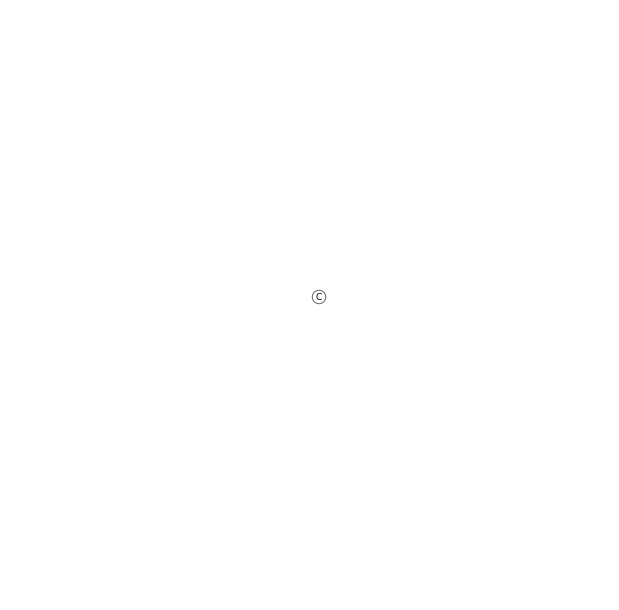

('sequence', 'G')


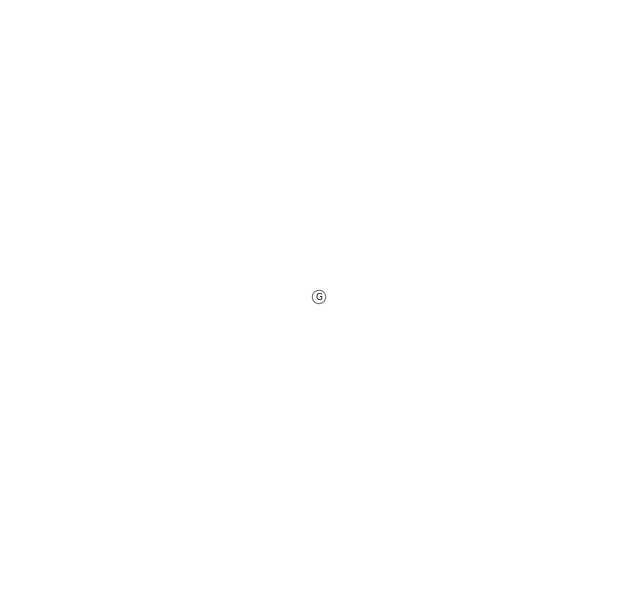

('sequence', 'C')


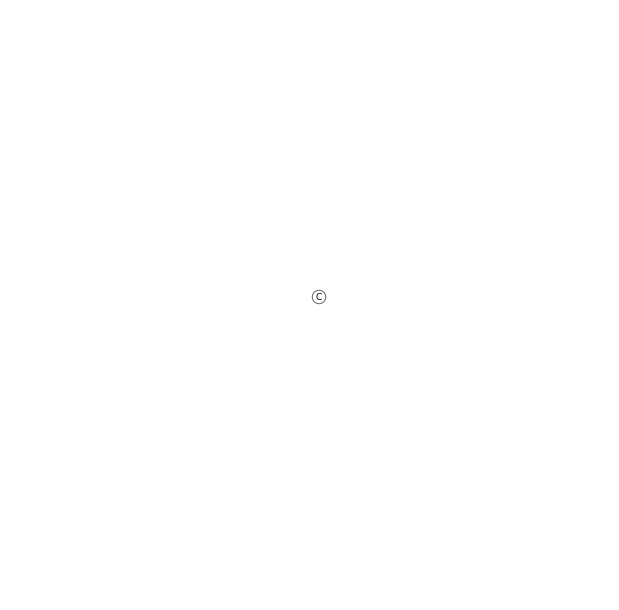

('sequence', 'C')


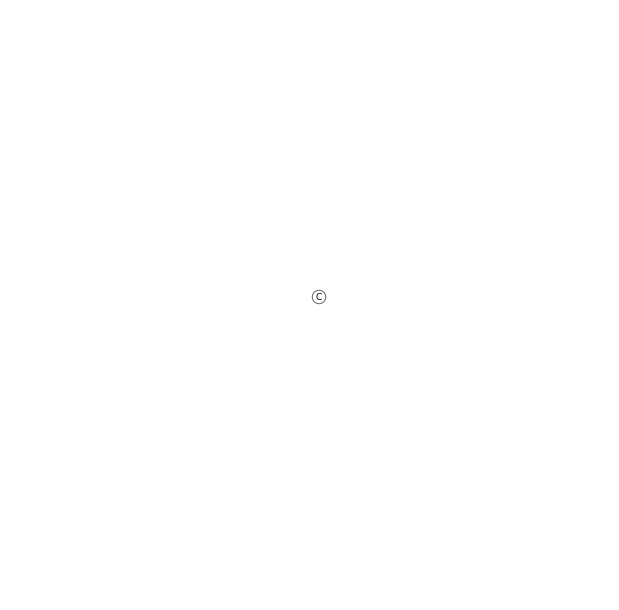

('sequence', 'C')


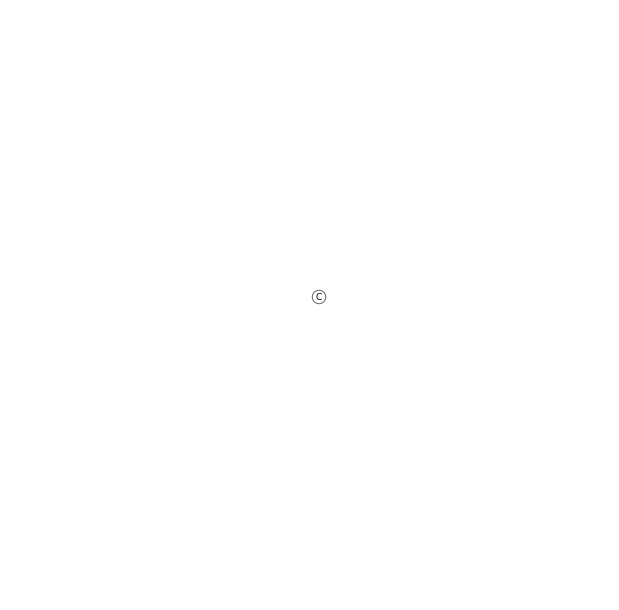

('sequence', 'G')


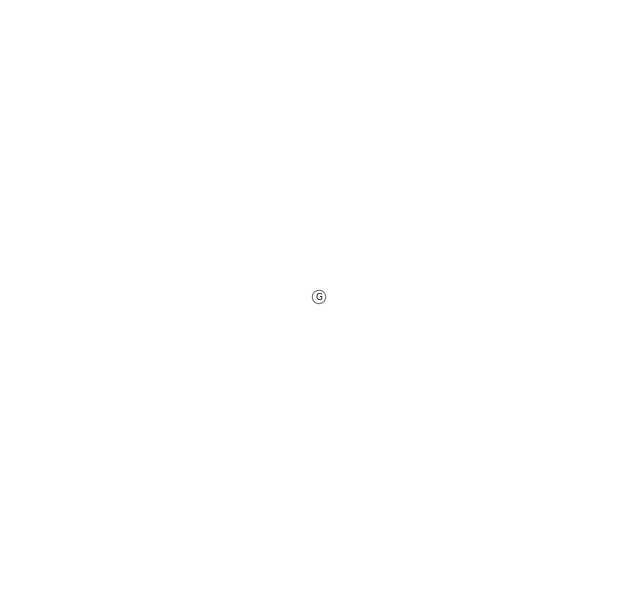

('sequence', 'U')


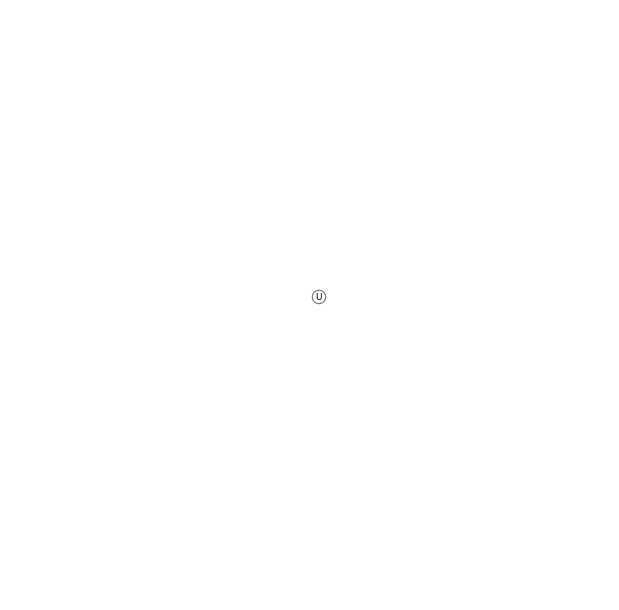

('sequence', 'A')


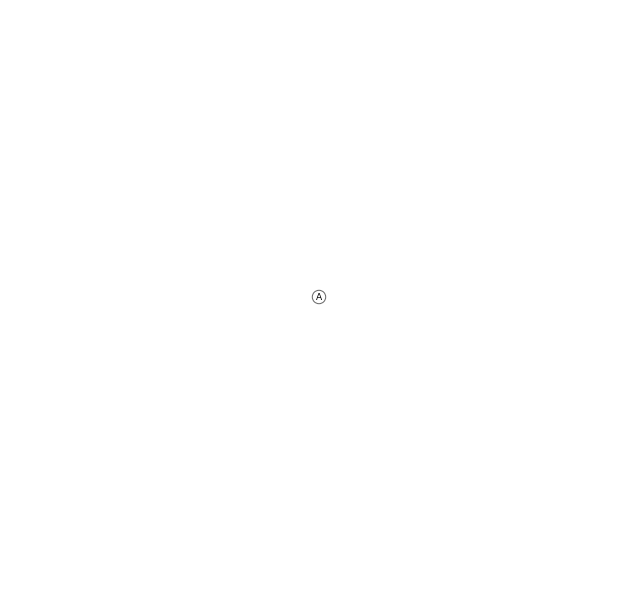

('sequence', 'G')


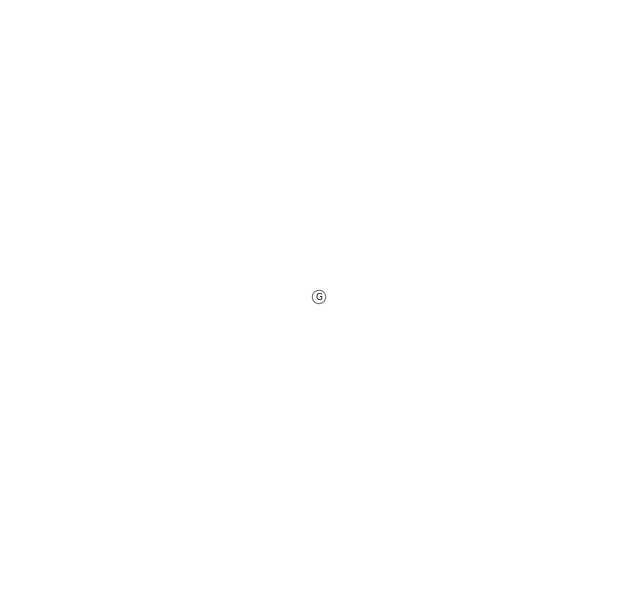

('sequence', 'C')


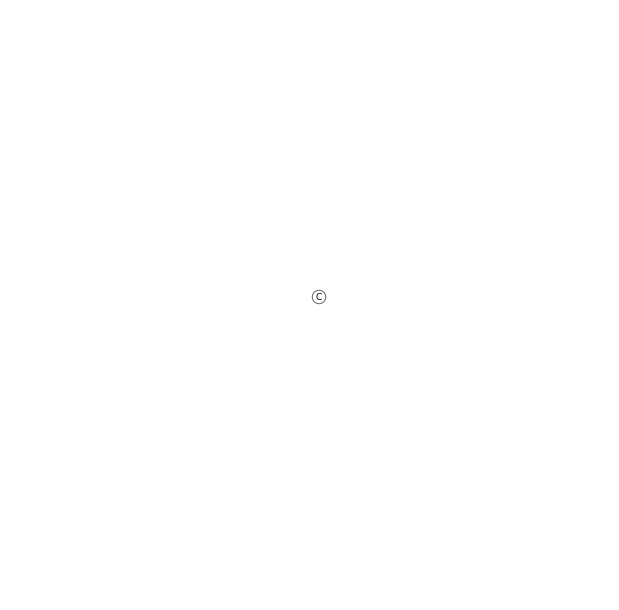

('sequence', 'U')


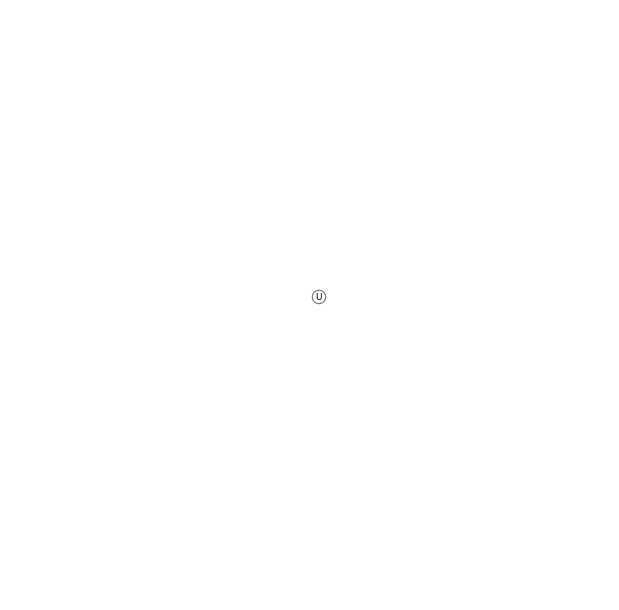

('sequence', 'C')


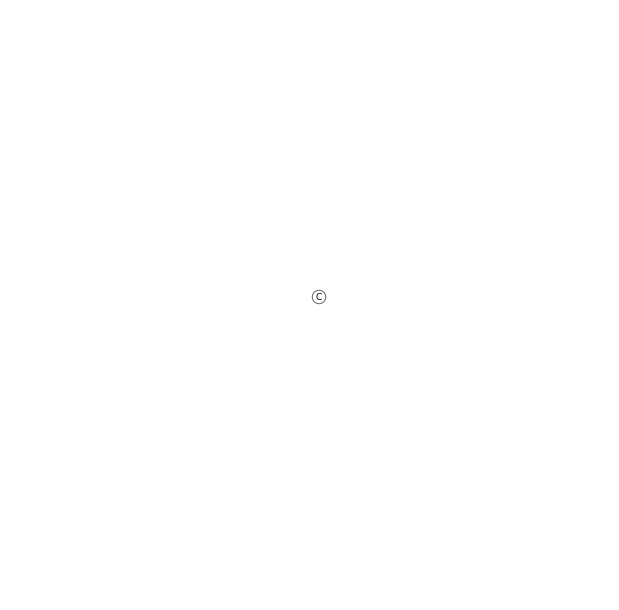

('sequence', 'A')


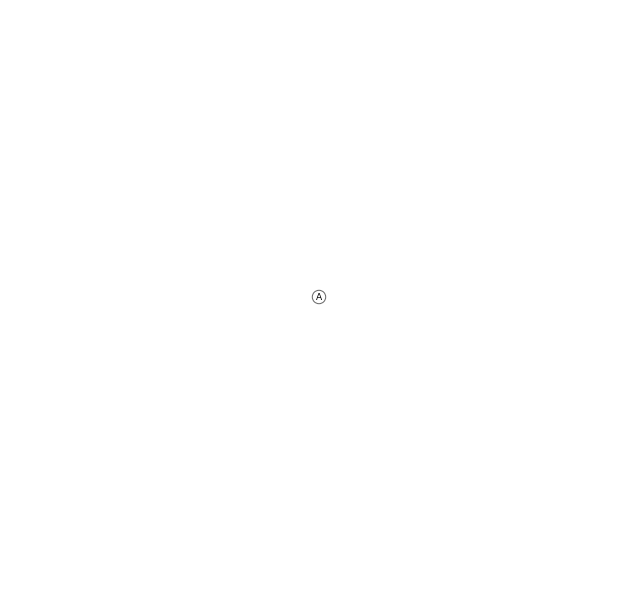

('sequence', 'A')


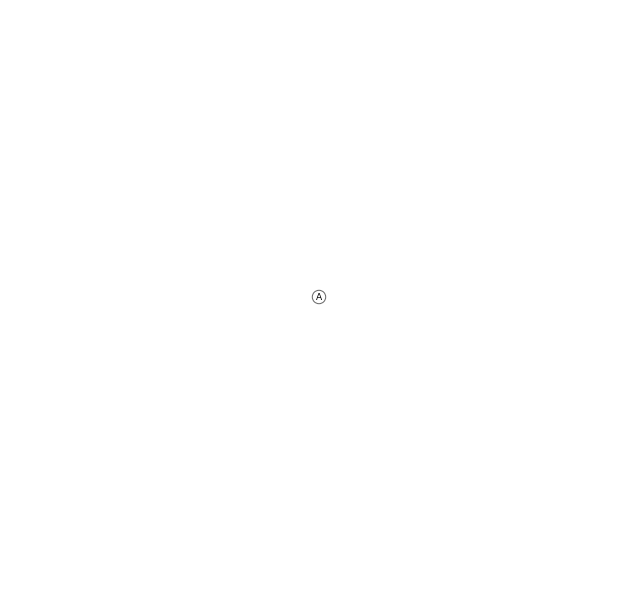

('sequence', 'U')


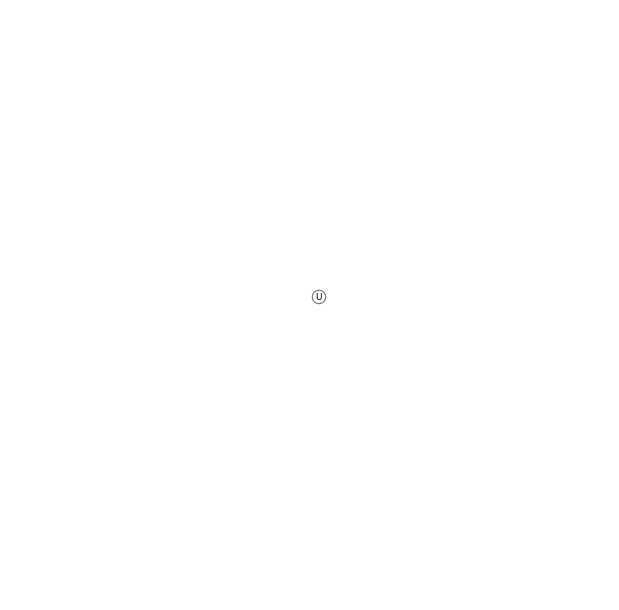

('sequence', 'U')


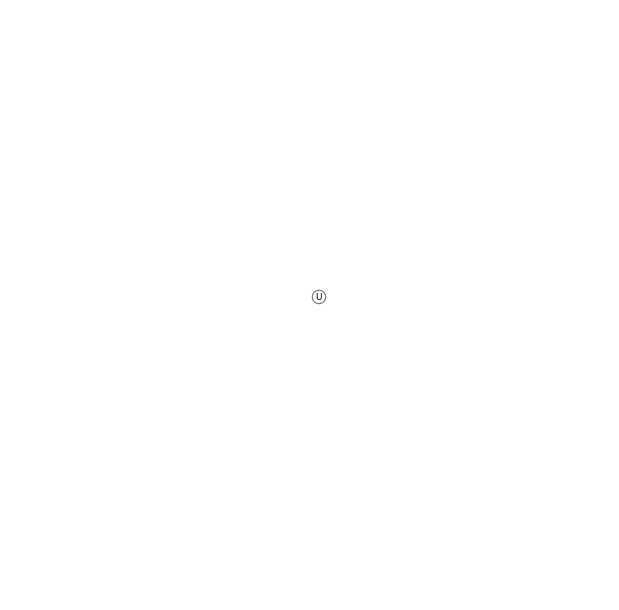

('sequence', 'G')


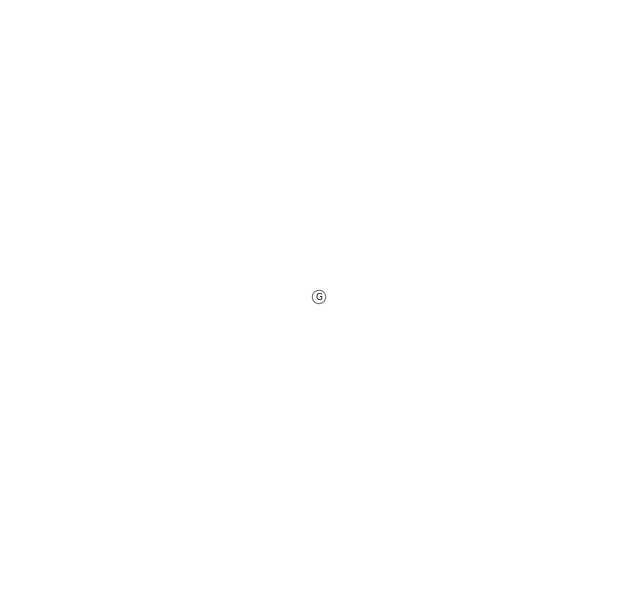

('sequence', 'G')


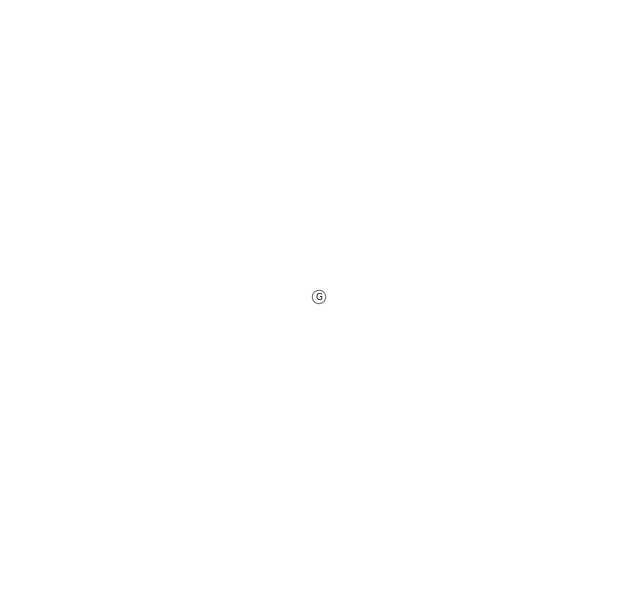

('sequence', 'A')


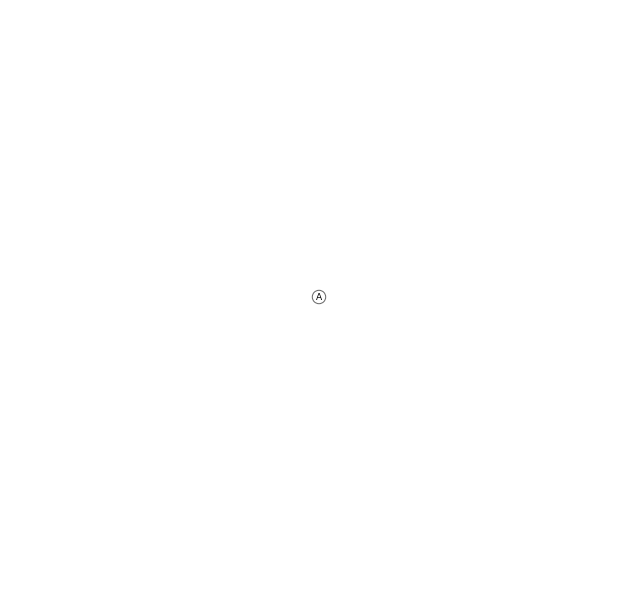

('sequence', 'U')


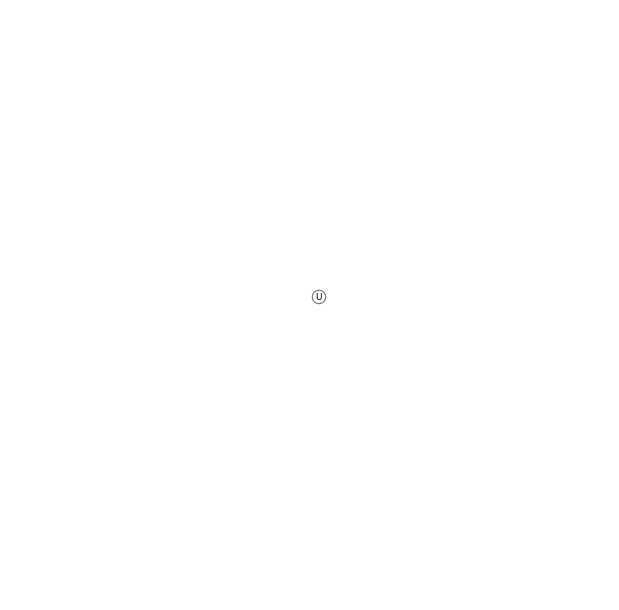

('sequence', 'A')


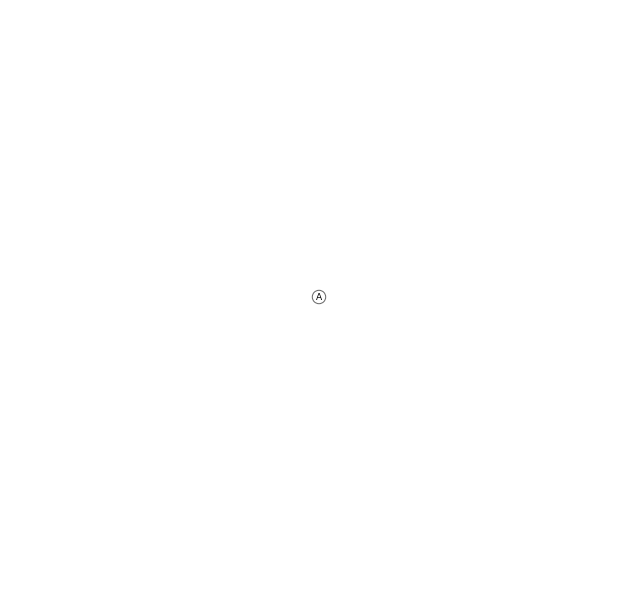

('sequence', 'G')


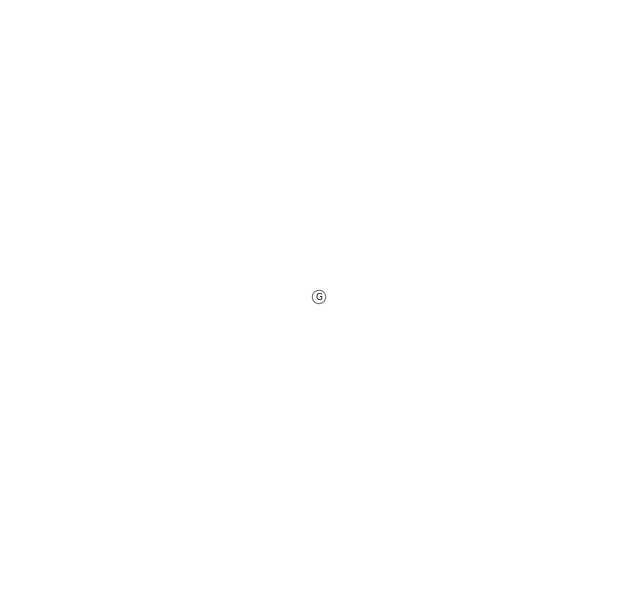

('sequence', 'A')


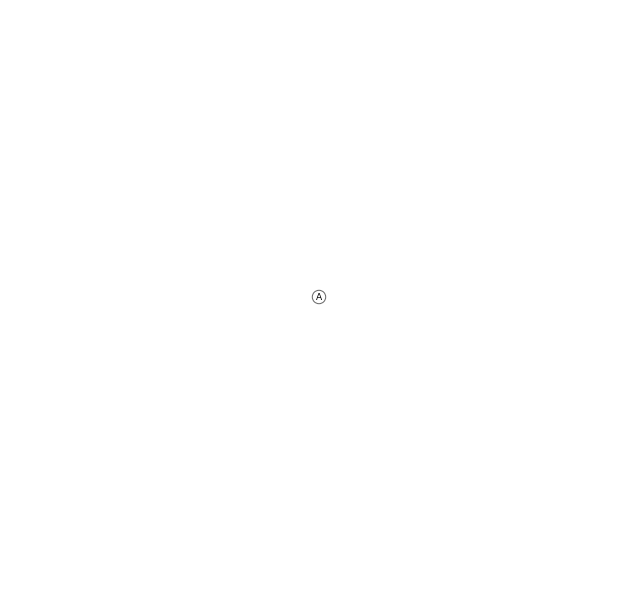

('sequence', 'G')


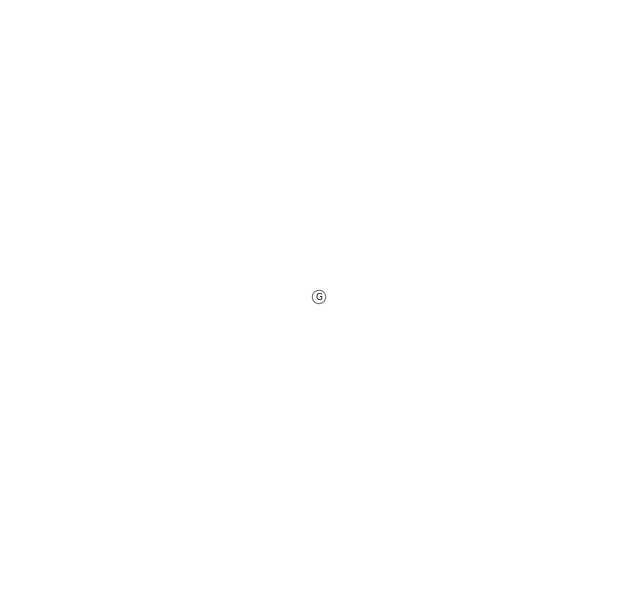

('sequence', 'C')


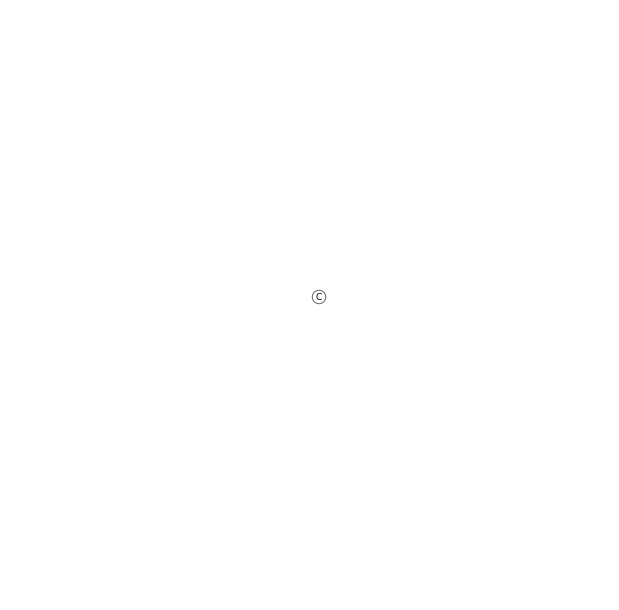

('sequence', 'G')


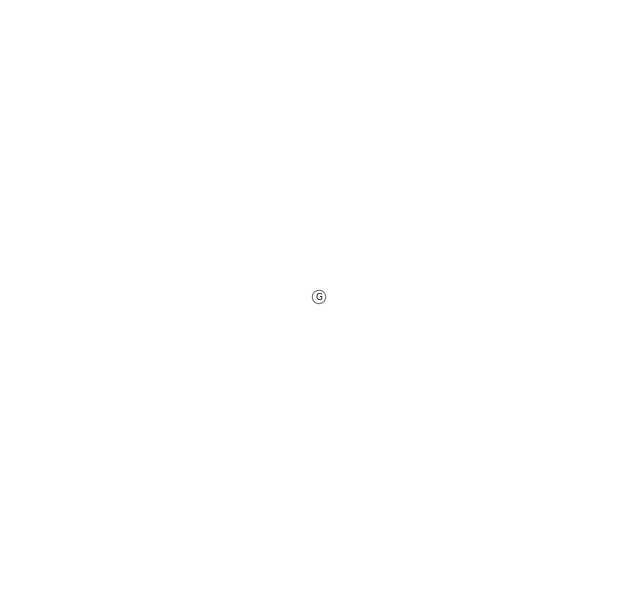

('sequence', 'U')


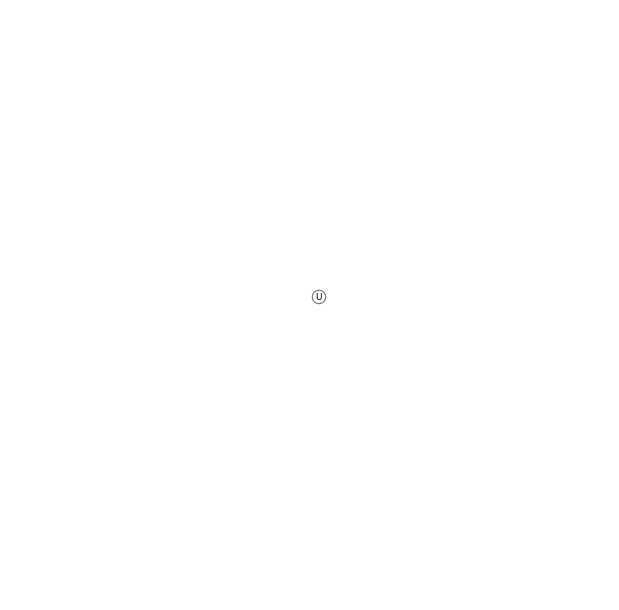

('sequence', 'U')


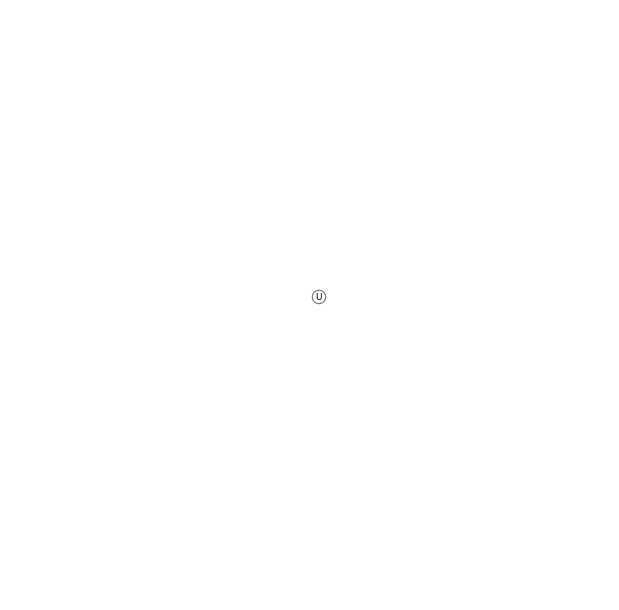

('sequence', 'U')


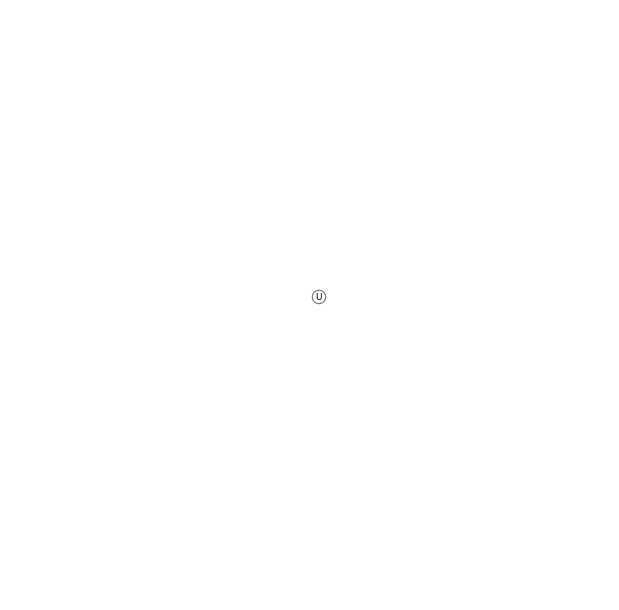

('sequence', 'G')


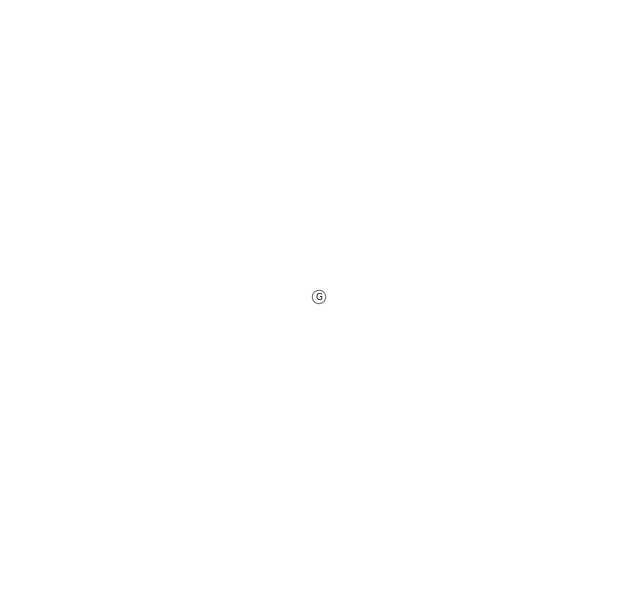

('sequence', 'A')


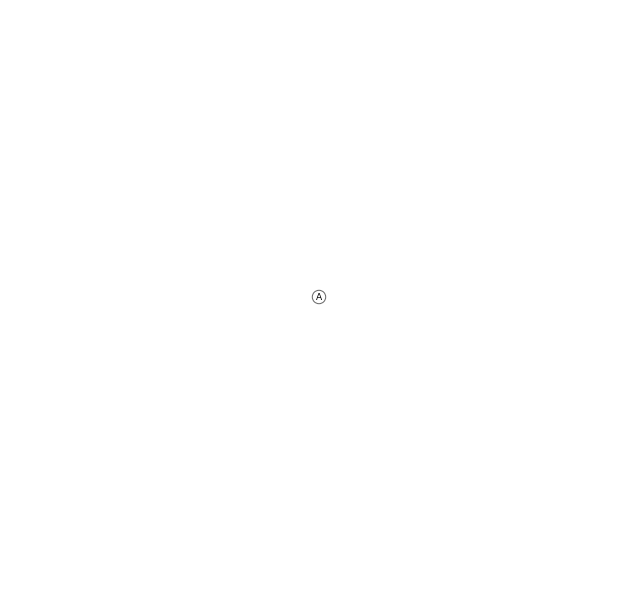

('sequence', 'C')


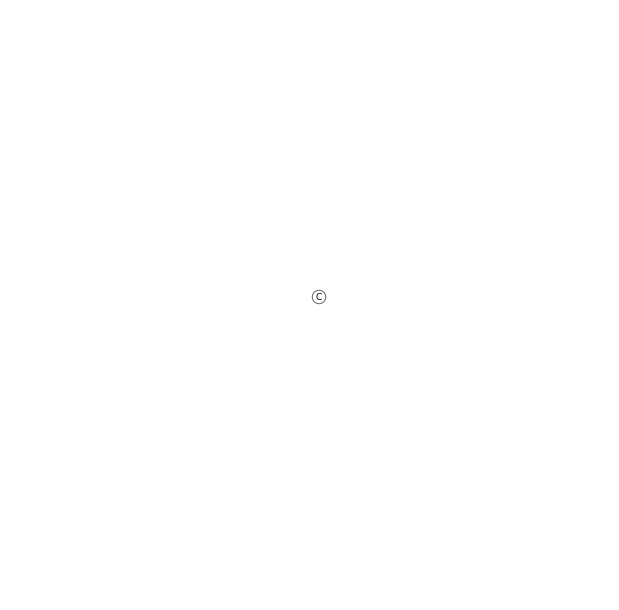

('sequence', 'U')


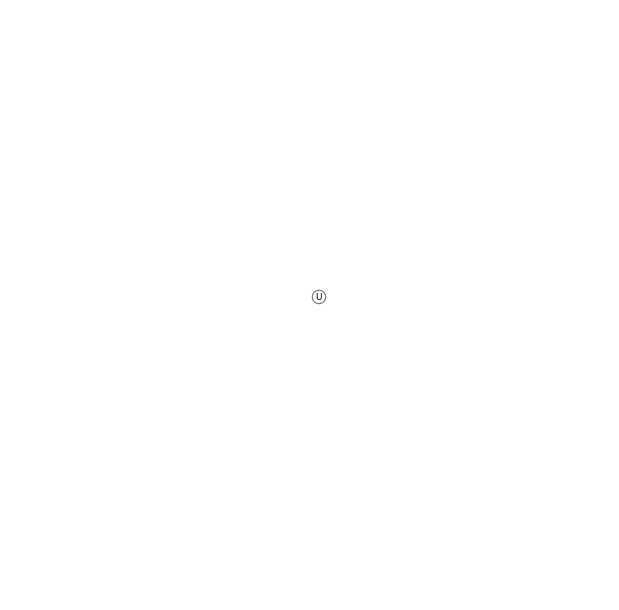

('sequence', 'A')


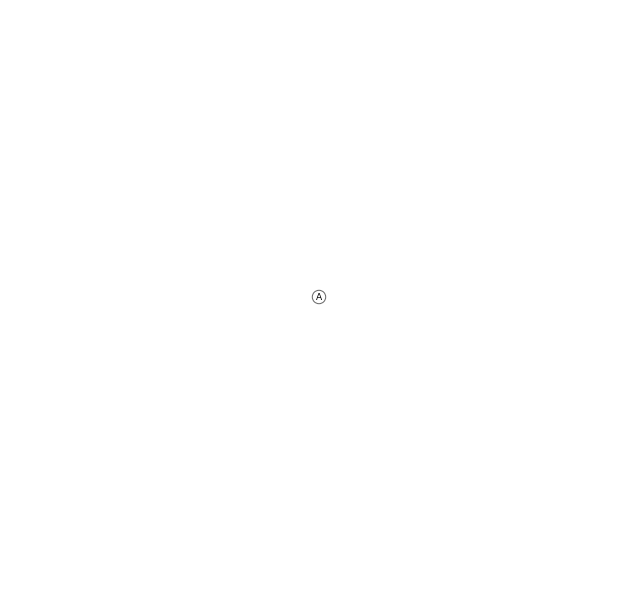

('sequence', 'C')


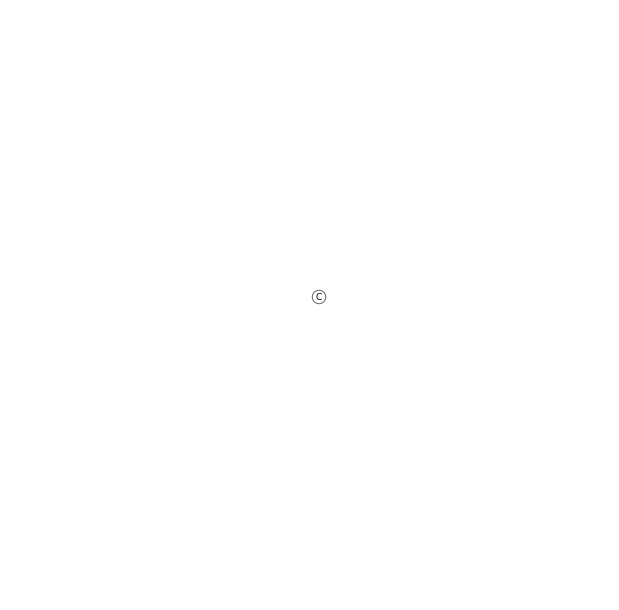

('sequence', 'G')


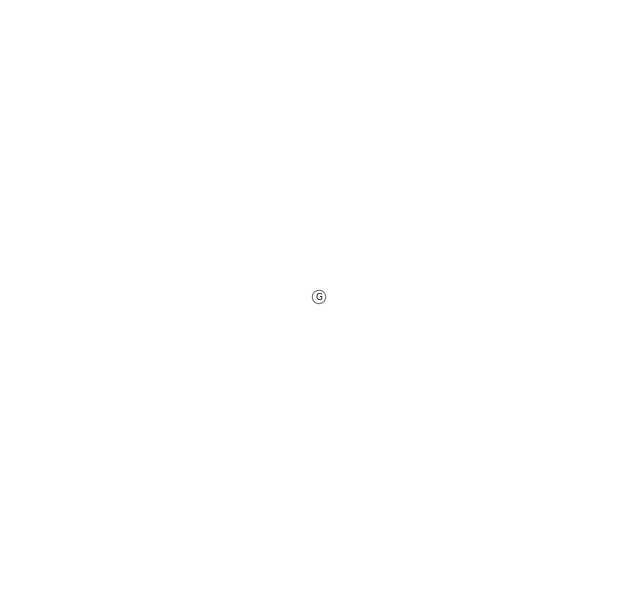

('sequence', 'G')


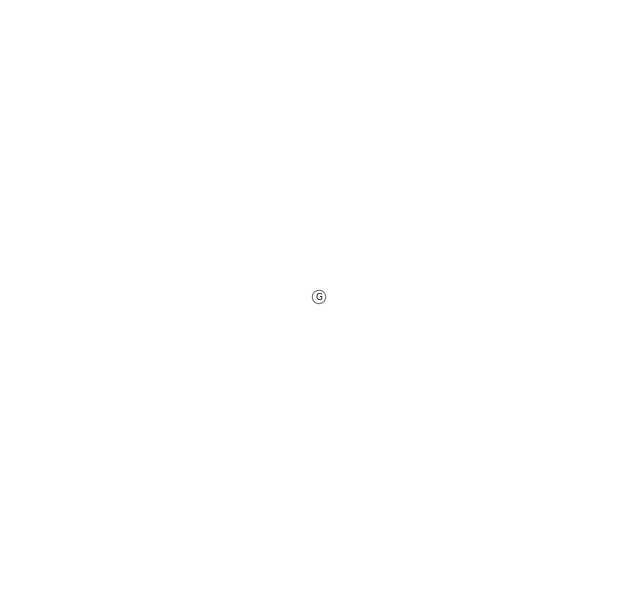

('sequence', 'A')


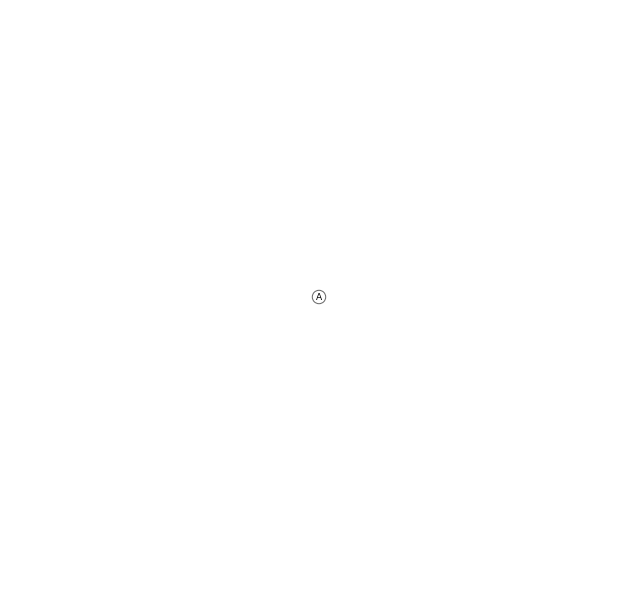

('sequence', 'U')


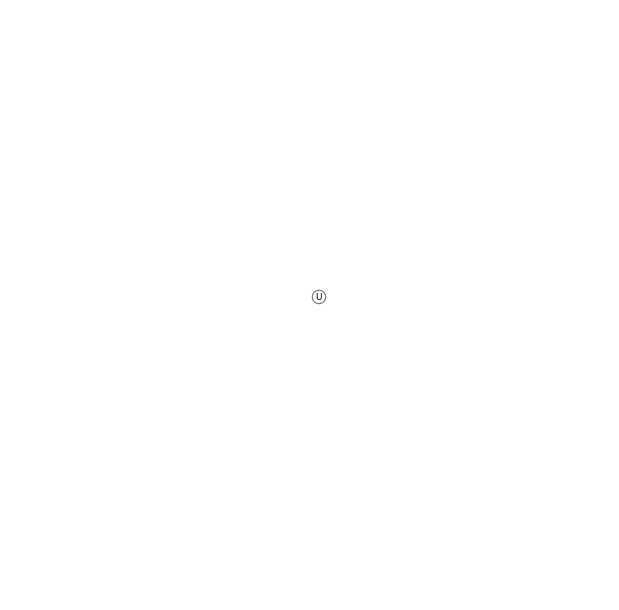

('sequence', 'C')


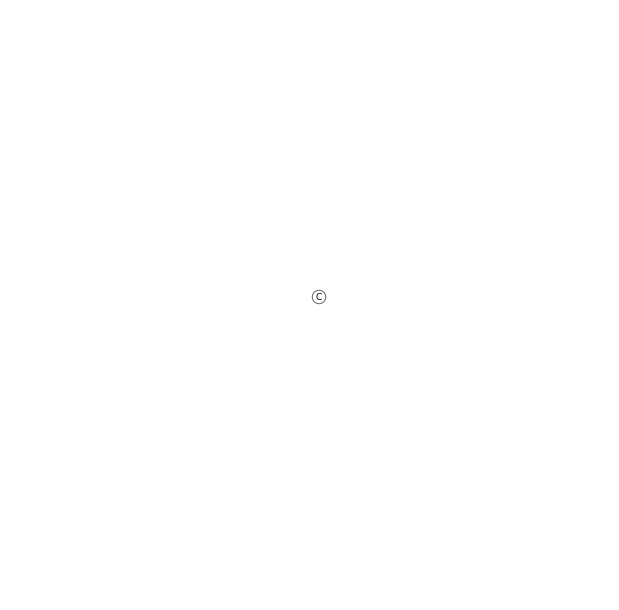

('sequence', 'A')


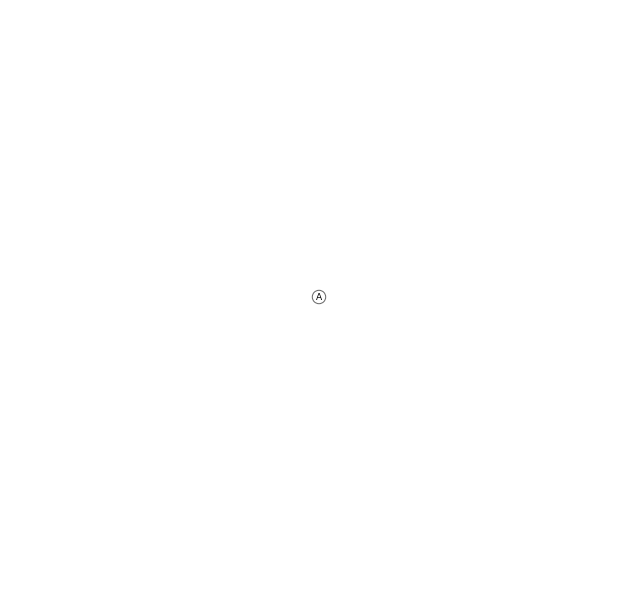

('sequence', 'A')


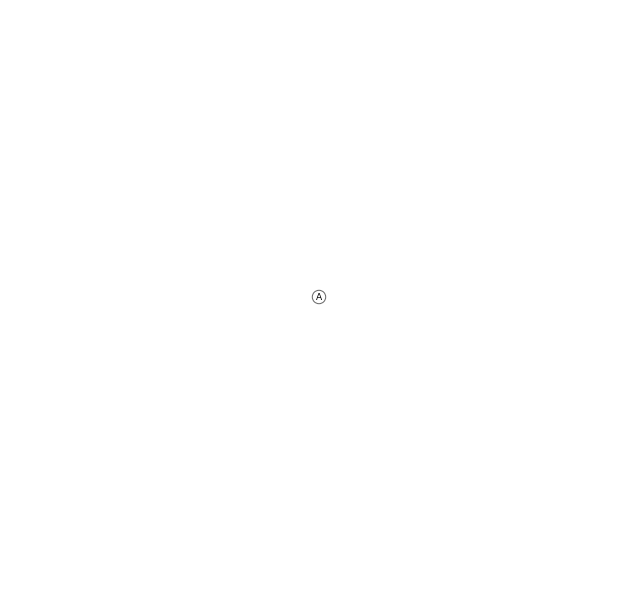

('sequence', 'A')


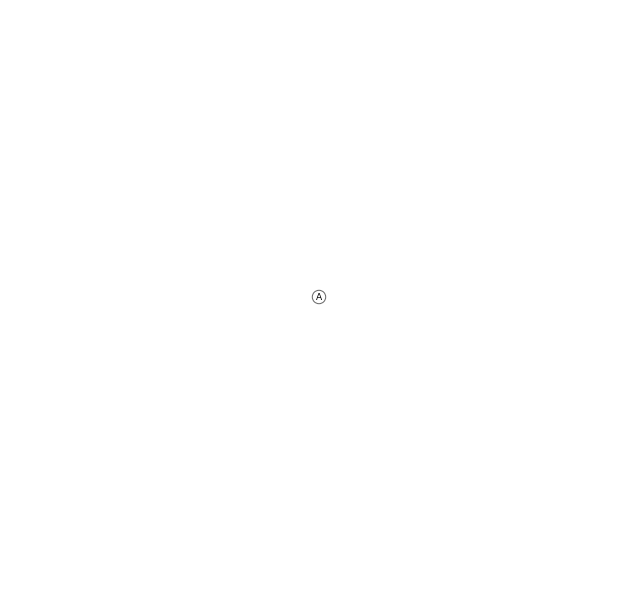

('sequence', 'A')


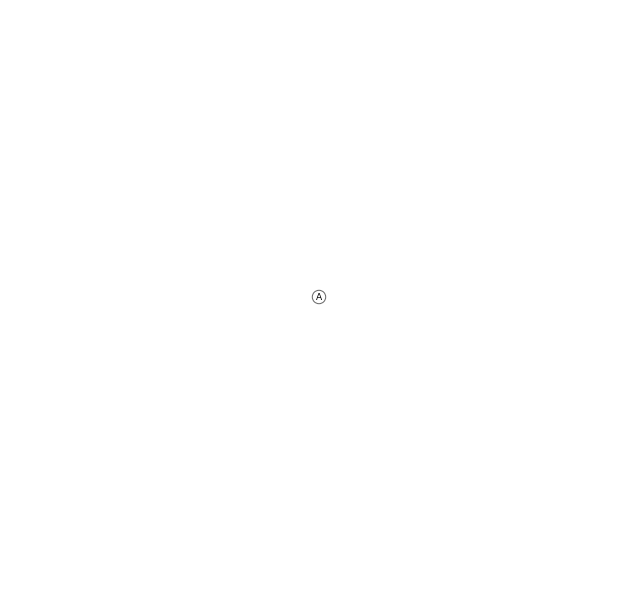

('sequence', 'G')


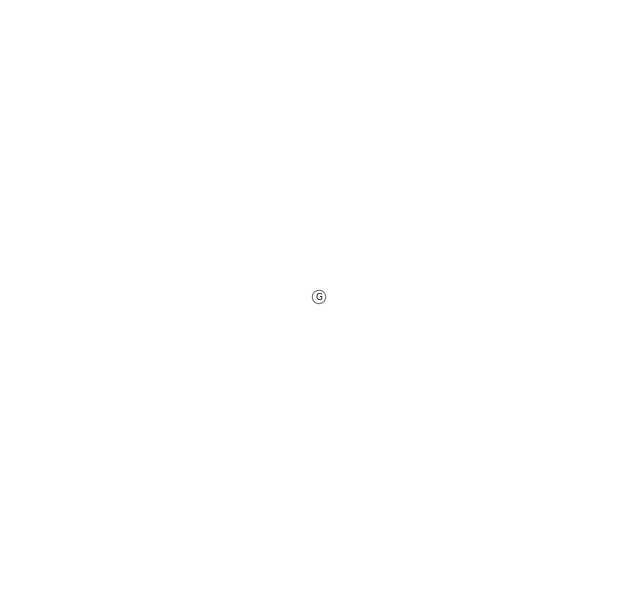

('sequence', 'G')


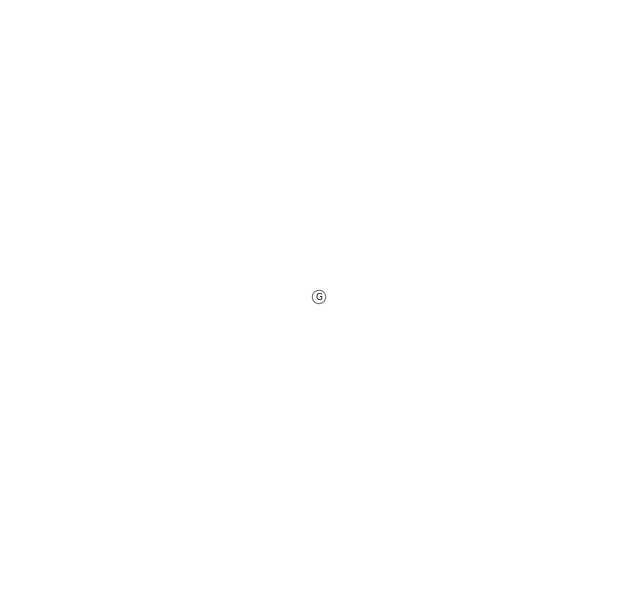

('sequence', 'U')


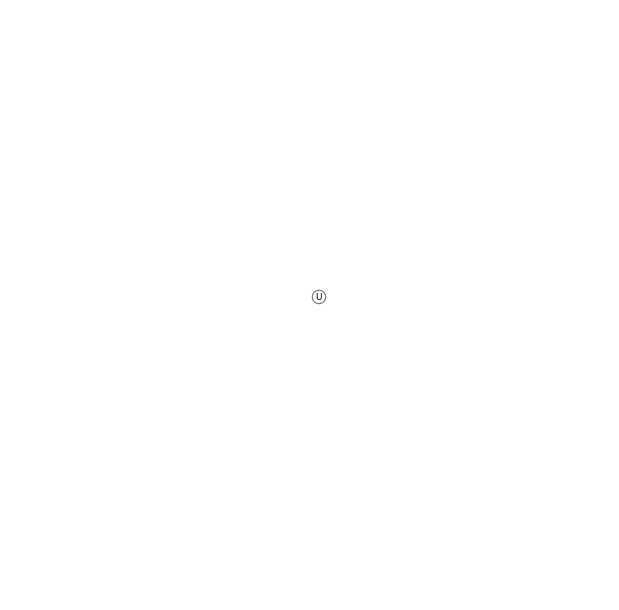

('sequence', 'U')


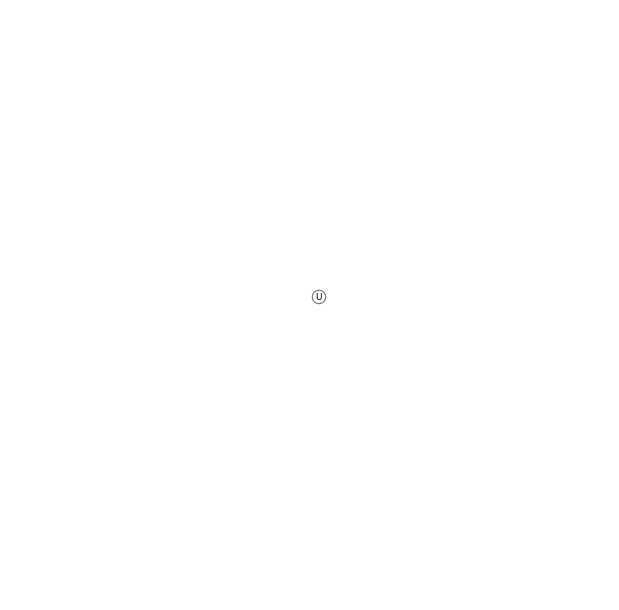

('sequence', 'A')


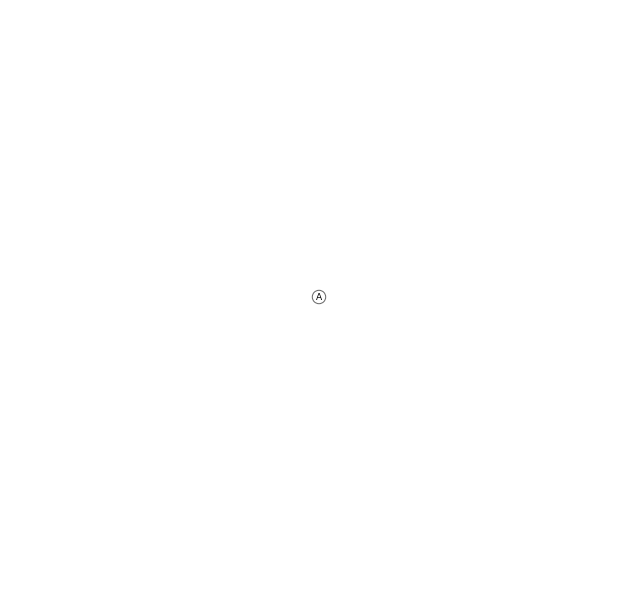

('sequence', 'G')


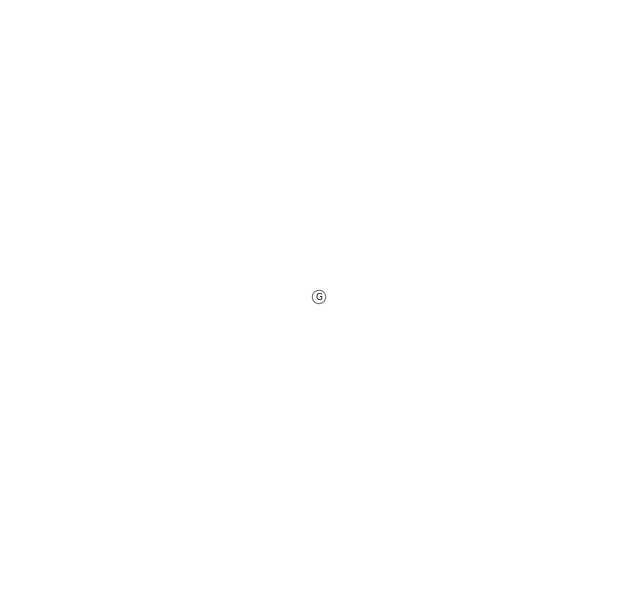

('sequence', 'G')


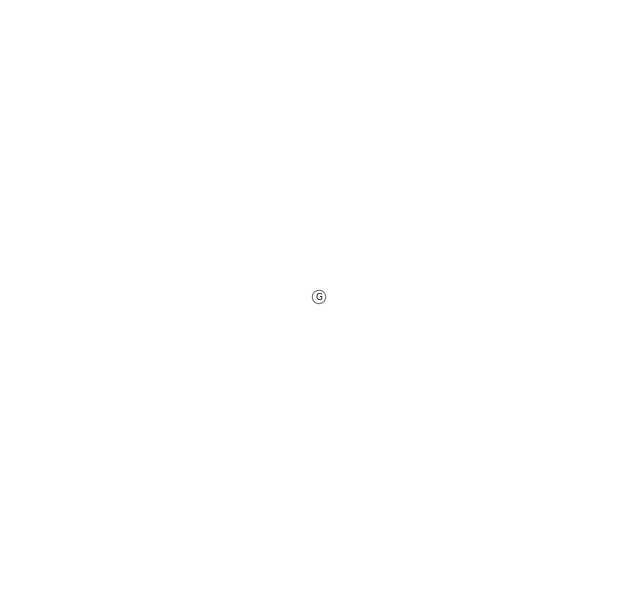

('sequence', 'G')


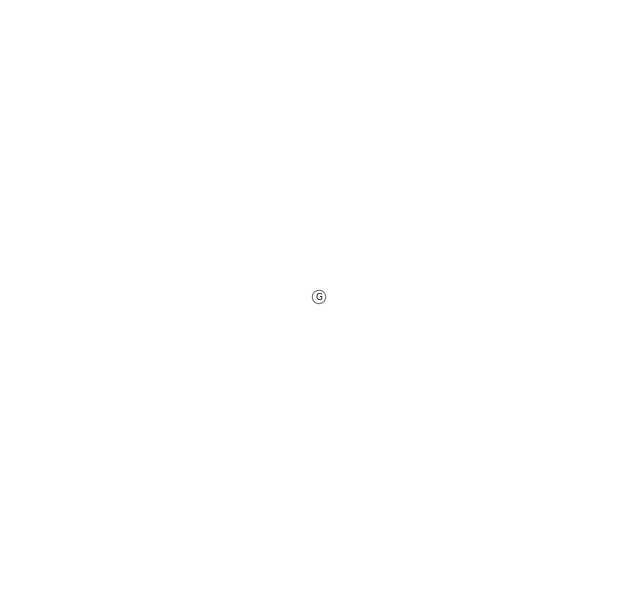

('sequence', 'G')


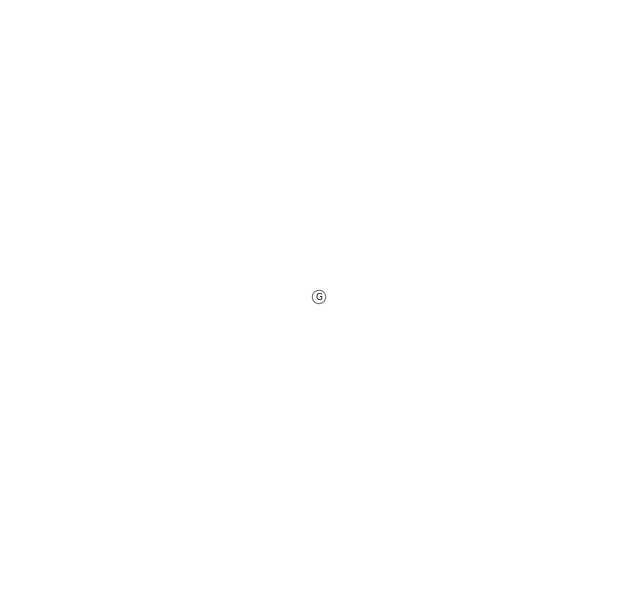

('sequence', 'U')


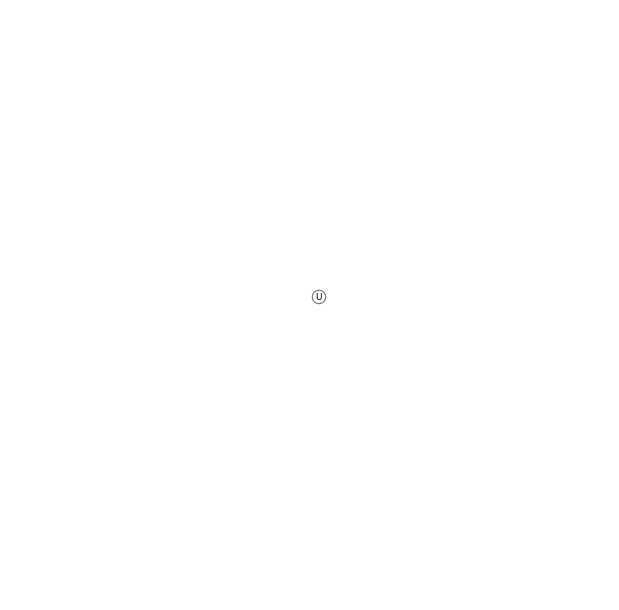

('sequence', 'U')


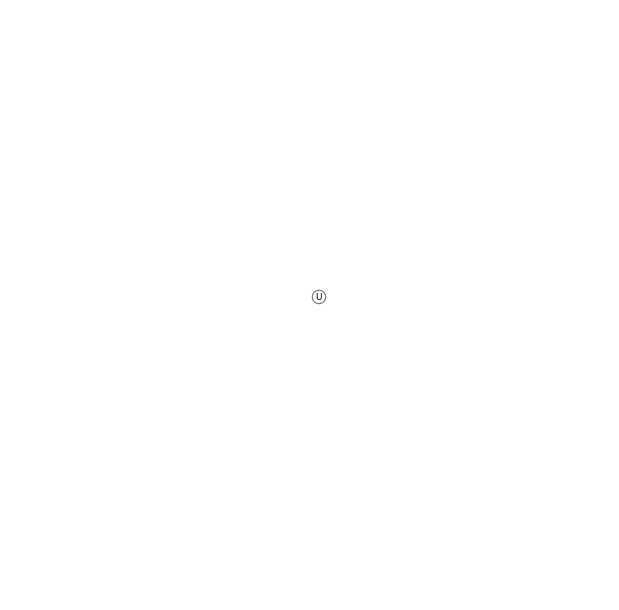

('sequence', 'C')


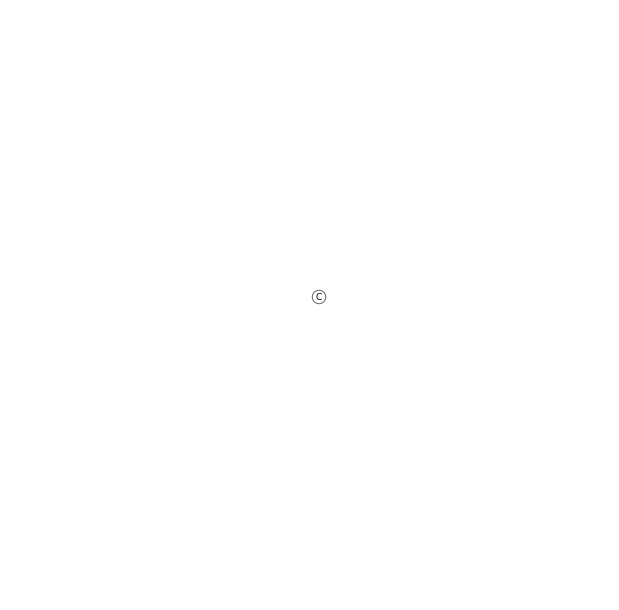

('sequence', 'G')


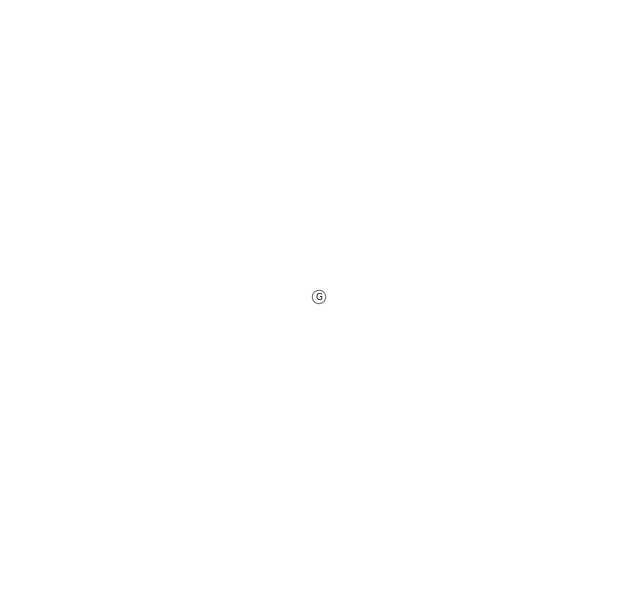

('sequence', 'A')


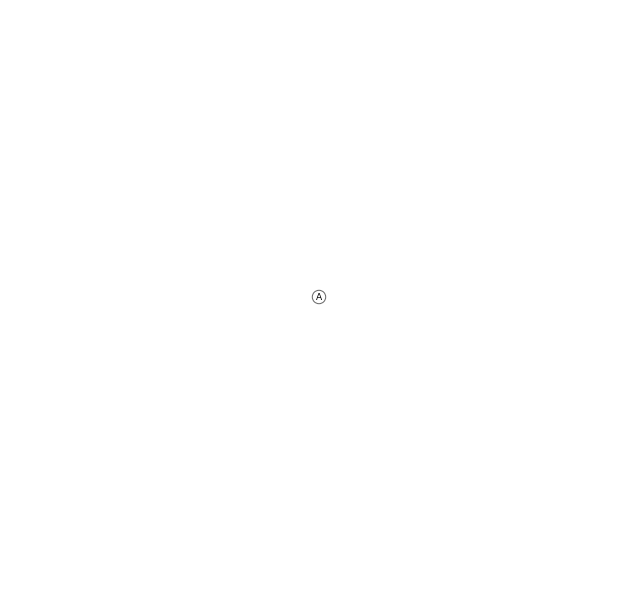

('sequence', 'C')


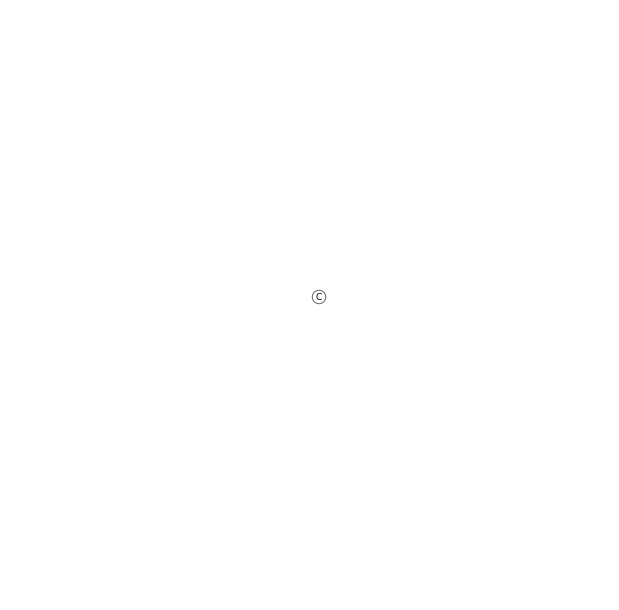

('sequence', 'U')


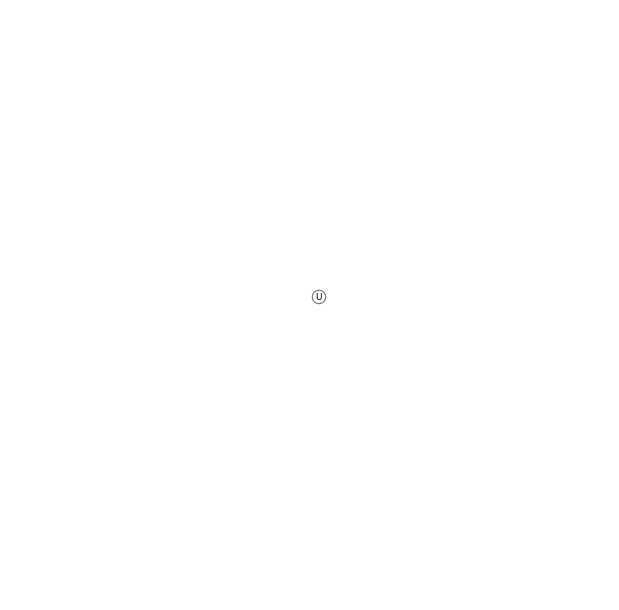

('sequence', 'C')


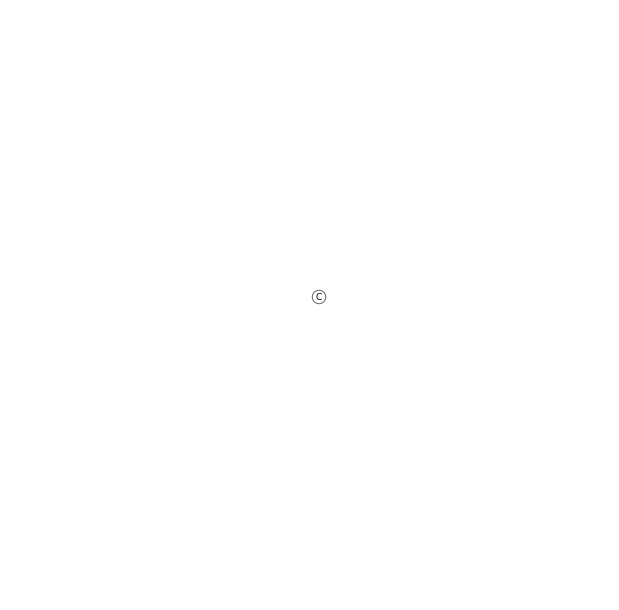

('sequence', 'C')


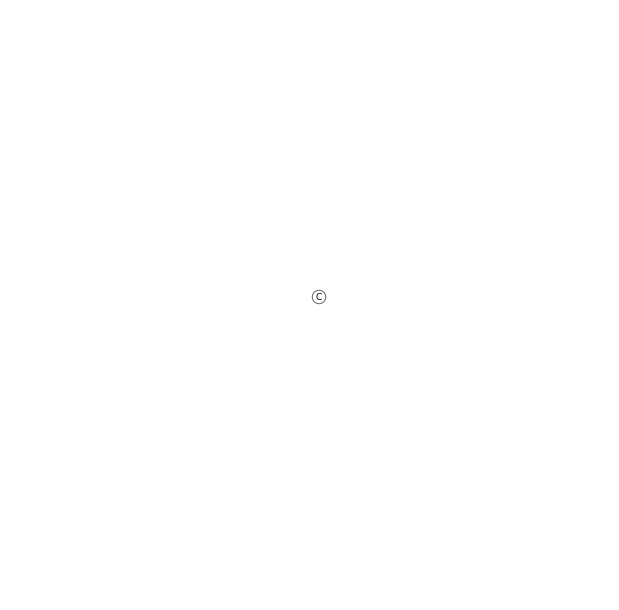

('sequence', 'U')


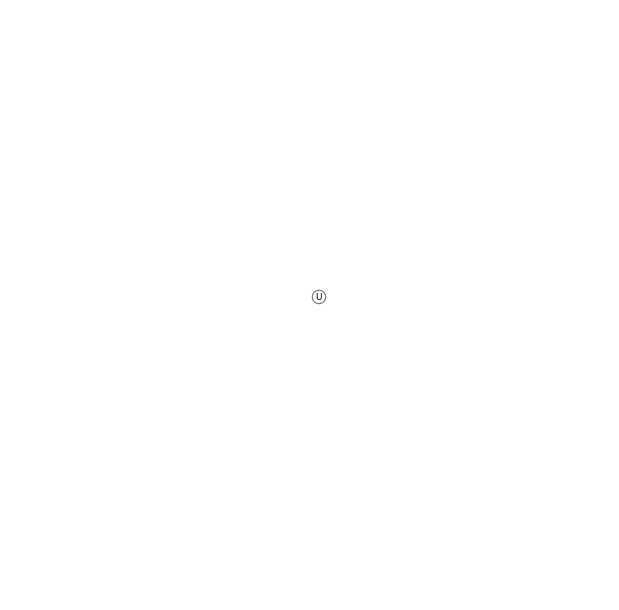

('sequence', 'C')


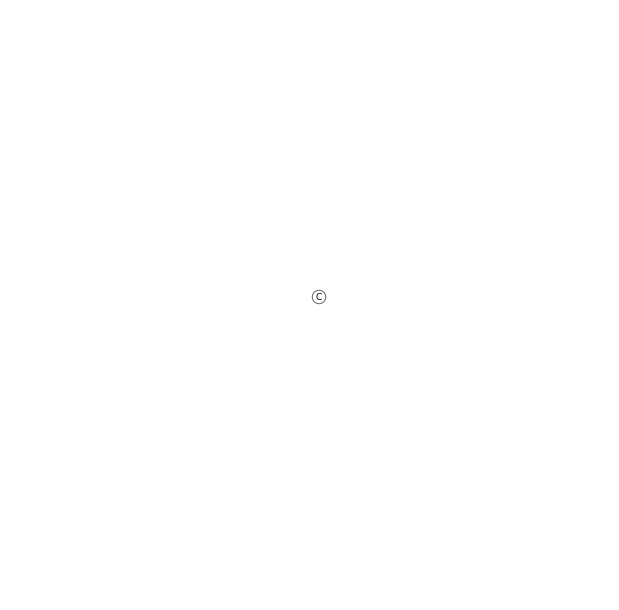

('sequence', 'U')


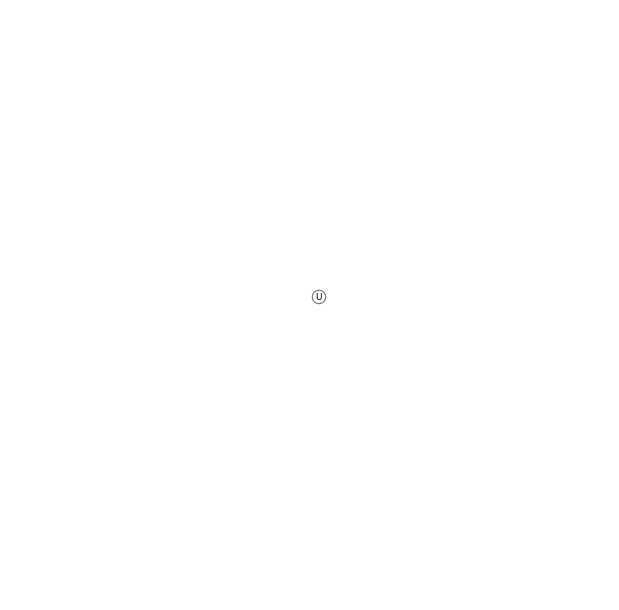

('sequence', 'C')


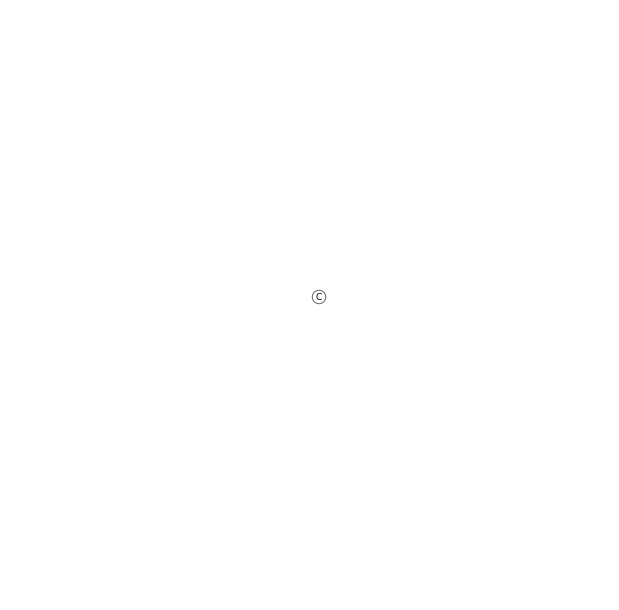

('sequence', 'G')


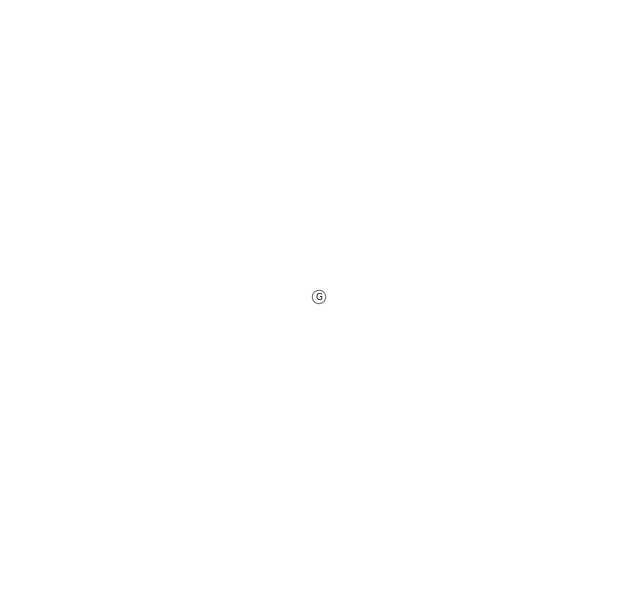

('sequence', 'G')


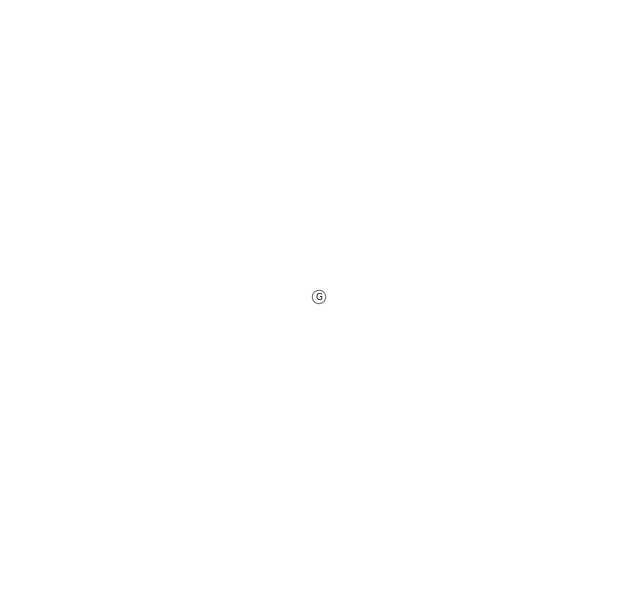

('sequence', 'G')


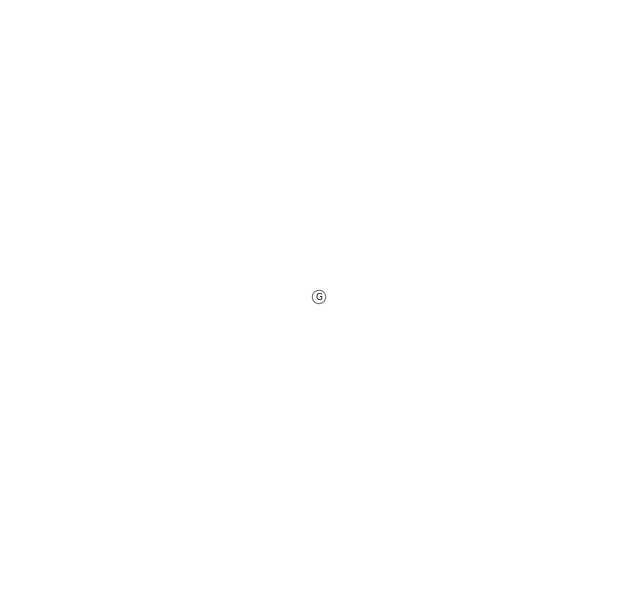

('sequence', 'C')


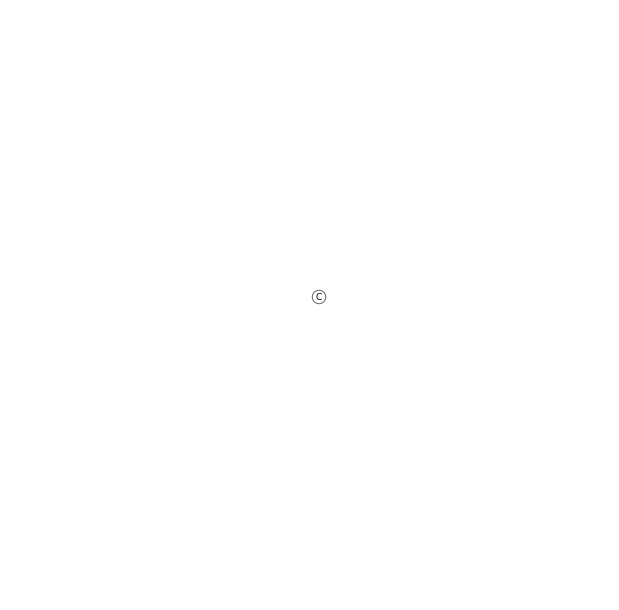

('sequence', 'G')


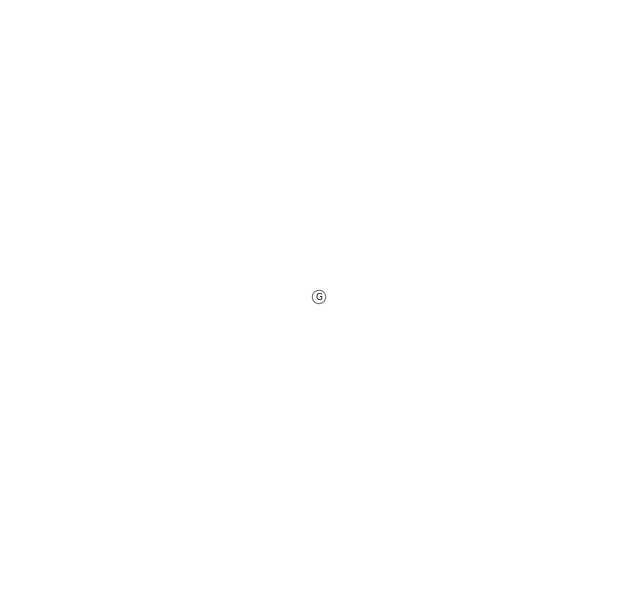

('sequence', 'C')


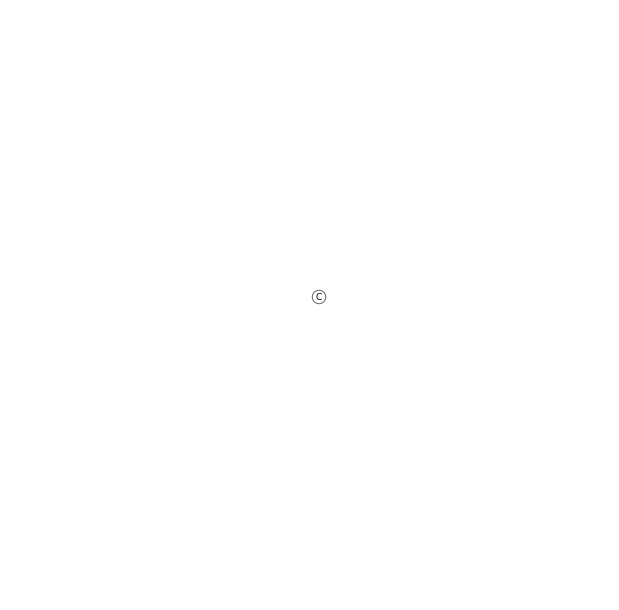

('sequence', 'G')


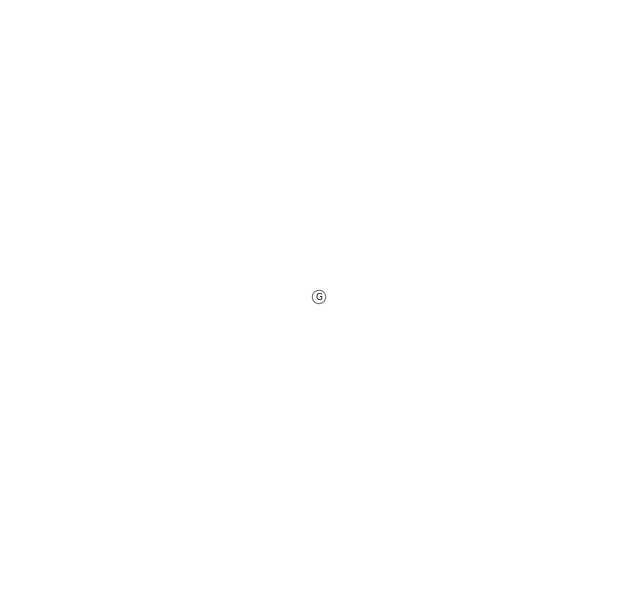

In [10]:
#generating the graph
for seq in seqs:
    G = fgraph._makeFastaGraph(seq)
    display.draw_graph(G, node_size=180, font_size=9, node_border=True, prog='neato')

In [ ]:
s = 'arab europ african \n newline '
print s
if ' ' in s:
    print s
    s_after = s.split(' ')
    print ("s after", s_after)
    print ("s_after1", s_after[0])
    print ("s_after1", s_after[1])
    print ("s_after1", s_after[2])
    if '\n':
        final_s = s_after[0] + s_after[2]
        print ("final_s", final_s)
    

In [ ]:
s = 'arab europ african \n newline '
#for s in line:
print ("s", s)
#    print ("word", word)
if ' ' in s:
    i = 0
    s_after = s.split(' ')
    print ("s after", s_after[i])
    i = +1
    #if '\n':
    final_s = s_after[i-1] + s_after[i+1]
    print ("final_s", final_s)
    s_new = s.strip('final_s')
    print ("s", s_new)
           

In [6]:
#read a line ignore string after the whitspace, tab and not (a,c,g,u)
s = 'acugg eu ac af \t r \n ne'
print s
new_s = []
not_add = []
for letter in s:
    print ("letter:", letter)
    print ("s:",s)
    print '#######'
#    if ' ' in letter or
    if letter == "a" or letter == "c" or letter == "g" or letter == "u":
#    if letter == {'a','c','g','u'}:
        print ('letter:', letter)
        letters = list(letter)
        new_s = new_s + letters
            #new_s = new_s + letter
        print ('new_s:', new_s)
        print '******'
#    else:
    if letter == " " or letter != "a" or letter != "c" or letter != "g" or letter != "u":
        letters = list(letter)
        not_add = not_add + letters
        print ('not_add:', not_add)
        print '-----'
    print ('final new_s:', new_s)
        #if letter == ' ' or letter != 'a' or letter != 'c' or letter != 'g' or letter != 'u':
            #new_s = letter
            
#        i = 0
#        s_after = s.split(' ')
#        print ("s after", s_after)
#        i = +1
    #    if :
#        final_s = s_after[0] + s_after[i+1]
#        print ("final_s", final_s)

acugg eu ac af 	 r 
 ne
('letter:', 'a')
('s:', 'acugg eu ac af \t r \n ne')
#######
('letter:', 'a')
('new_s:', ['a'])
******
('not_add:', ['a'])
-----
('final new_s:', ['a'])
('letter:', 'c')
('s:', 'acugg eu ac af \t r \n ne')
#######
('letter:', 'c')
('new_s:', ['a', 'c'])
******
('not_add:', ['a', 'c'])
-----
('final new_s:', ['a', 'c'])
('letter:', 'u')
('s:', 'acugg eu ac af \t r \n ne')
#######
('letter:', 'u')
('new_s:', ['a', 'c', 'u'])
******
('not_add:', ['a', 'c', 'u'])
-----
('final new_s:', ['a', 'c', 'u'])
('letter:', 'g')
('s:', 'acugg eu ac af \t r \n ne')
#######
('letter:', 'g')
('new_s:', ['a', 'c', 'u', 'g'])
******
('not_add:', ['a', 'c', 'u', 'g'])
-----
('final new_s:', ['a', 'c', 'u', 'g'])
('letter:', 'g')
('s:', 'acugg eu ac af \t r \n ne')
#######
('letter:', 'g')
('new_s:', ['a', 'c', 'u', 'g', 'g'])
******
('not_add:', ['a', 'c', 'u', 'g', 'g'])
-----
('final new_s:', ['a', 'c', 'u', 'g', 'g'])
('letter:', ' ')
('s:', 'acugg eu ac af \t r \n ne')
#######


In [ ]:
s = 'acugg eu acafr'
strin = []
com = []
for letter in s:
    space = 0
    i = 0
    x = iter(letter)
    next_letter = x.next()
    strin.append(letter)
    print letter
    i = +1
    print ("strin", strin)
    if letter == " ":
        print ("space", space)
        com.append(letter)
        print ("com", com)
        if letter != " " and letter[i-1] == " ":
            com.append(letter)
            print ("com2", com)

        
        
        
#        print ("next_letter", next_letter)
#        x.next()
#        print ("next_letter", next_letter)
#        com.append(next_letter)
#        letter.next_letter
#        print ("com", com)
#        print ('space1')
#        space = + 1
#        if next_letter == " " and space == 1:
#            print ("space", space)
            #next_letter
#            x.next()
#            com.append(letter)
#            print ("com2", com)
#            print ('space2')
#    else:
#        strin.append(letter)
#        print letter
print ("final strin", strin)